### Machine Learning for Data Science Project - M2SIAD DS First Semester

#### Authors: NITA Carmen Andreea, THIOUNE Magatte Niang, M2 SIAD DS Group 2

## Food Prices for Nutrition: the Cost and Affordability of a Healthy Diet

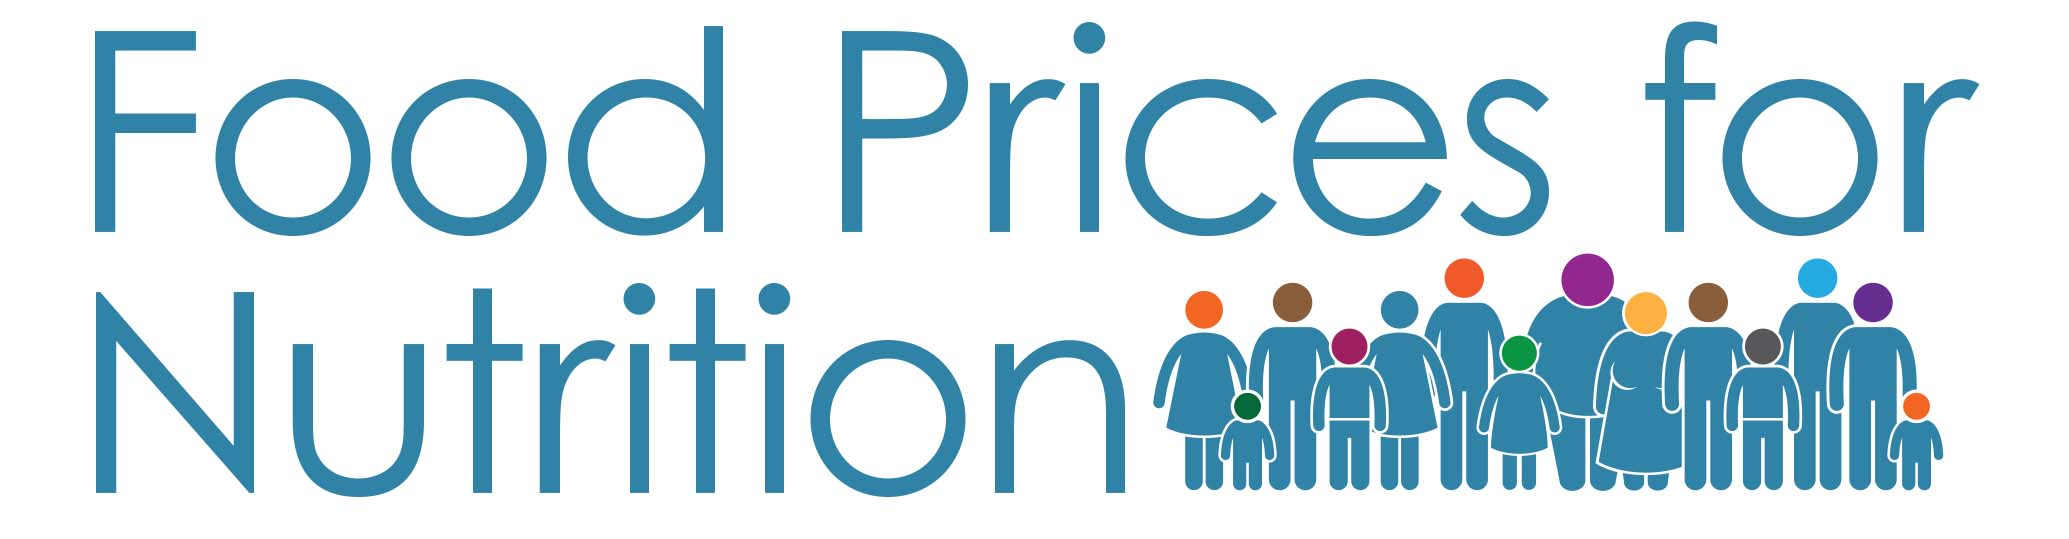

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Data Source </strong>

Food Prices for Nutrition DataHub: global statistics on the Cost and Affordability of Healthy Diets - WorldBank.org : 
https://www.worldbank.org/en/programs/icp/brief/foodpricesfornutrition?cq_ck=1646845586643#D_top

</div>

### Table of Contents

1. [Introduction](#introduction)
1. [Description of the Data Set](#description)
    1. [Importing the Database](#importingdb)
    1. [Exploratory Data Analysis](#eda)
        1. [Identification of Missing Values](#missing)
        1. [Identification of Outliers](#outliers)
    1. [Descriptive Statistics](#statdesc)
        1. [Univariate Statistics](#statdescuniv)
        1. [Bivariate Statistics](#statdescbiv)
1. [Data Preparation](#dataprep)
    1. [Relationship between the Variables](#rel)
    1. [Transforming Continuous Features into Categorical Ones](#transform_num_to_cat)
    1. [Feature Scaling](#featurescaling)
    1. [Min Max Scaler](#minmaxscaler)
    1. [Dummy Variables](#dummies)
        1. [Transformation of the Independent variables into dummies](#dummiesindep) 
        1. [Transformation of the Dependent variables into dummies](#dummiesdep)
    1. [Train Test Split](#traintestsplit)
1. [Construction and Evaluation of Models](#construction_evaluation)
    1. [Model 1 - Logistic regression](#model_logreg)
        1. [Initial Model](#model_logreg_initial)
        1. [Model Evaluation](#model_logreg_eval)
        1. [Model Optimisation](#model_logreg_optim)
        1. [Optimised Model](#model_logreg_final)   
        1. [Evaluation of the Optimised Model](#model_logreg_final_eval)
    1. [Model 2 - Decision Trees](#model_dectree)
        1. [Initial Model](#model_dectree_initial)
        1. [Model Evaluation](#model_dectree_eval)
        1. [Model Optimisation](#model_dectree_optim)
        1. [Optimised Model](#model_dectree_final)
        1. [Evaluation of the Optimised Model](#model_dectree_final_eval)
    1. [Model 3 - Random Forest](#model_rf)
        1. [Initial Model](#model_rf_initial)
        1. [Model Evaluation](#model_rf_eval)
        1. [Model Optimisation](#model_rf_optim)
        1. [Optimised Model](#model_rf_final)
        1. [Evaluation of the Optimised Model](#model_rf_final_eval)
    1. [Model 4 - Support Vector Machine (SVM)](#model_svm)
        1. [Initial Model](#model_svm_initial)
        1. [Model Evaluation](#model_svm_eval)
        1. [Model Optimisation](#model_svm_optim)
        1. [Optimised Model](#model_svm_final)
        1. [Evaluation of the Optimised Model](#model_svm_final_eval)
    1. [Model 5 - XGBoost](#model_xgboost)
        1. [Initial Model](#model_xgboost_initial)
        1. [Model Evaluation](#model_xgboost_eval)
        1. [Model Optimisation](#model_xgboost_optim)
        1. [Optimised Model](#model_xgboost_final)
        1. [Evaluation of the Optimised Model](#model_xgboost_final_eval)
    1. [Model 6 - Neural Networks](#model_nn)
        1. [Initial Model](#model_nn_initial)
        1. [Model Evaluation](#model_nn_eval)
        1. [Model Optimisation](#model_nn_optim)
        1. [Optimised Model](#model_nn_final)
        1. [Evaluation of the Optimised Model](#model_nn_final_eval)

1. [Results of the Final Models. Conslusion](#results_conclusion)
1. [Bibliography](#bibliography)

# Part 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">

Exploring the realm of nutritional economics, we delve into the intricacies of food prices and their impact on the accessibility of a well-balanced diet. 

Our central focus revolves around a key metric, the `Percent of the population who cannot afford a healthy diet` and is designated by the variable name `[CoHD_headcount]`, herein referred to as the target variable. This variable is specifically characterized as the percentage of the population entangled in financial constraints impeding their capacity to procure a nutritionally sound diet. As we examine the statistical landscape, the average of this target variable stands at 37%.

Our main **goal** is to build a predictive model that categorizes individuals into two groups based on their financial constraints. This model is designed to discern and categorize individuals based on their affiliation with two distinctive groups: those who fall at or below the 37% threshold and those who exceed it. 

- label '**1**' signifies individuals encountering financial constraints equal to or less than 37%, the average;
- label '**0**' pertains to percentages surpassing the aforementioned threshold. 

This predictive framework holds substantial potential for informing strategies to enhance accessibility to healthy diets and, subsequently, contribute to the advancement of public health initiatives.

</div>

In [ ]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from matplotlib.legend_handler import HandlerLine2D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix 
# from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Model 2 - Decision Trees
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Model 4 - Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Model 5 - XGBoost
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import mean_squared_error

## Model 6 - Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import GridSearch
from kerastuner import HyperParameters
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

### Model 6 - Neural Networks
from numpy.random import seed
import tensorflow
import sklearn
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# 2 - Description of the dataset <a class="anchor"  id="description"></a>
-----------------

## 2.1 - Importing the data base <a class="anchor"  id="importingdb"></a>

In [2]:
df = pd.read_csv('dataset2017.csv')
df.head()

Classification Name Classification Code Country Name  \
0  Food Prices for Nutrition 1.0             FPN 1.0        WORLD   
1  Food Prices for Nutrition 1.0             FPN 1.0      Albania   
2  Food Prices for Nutrition 1.0             FPN 1.0      Algeria   
3  Food Prices for Nutrition 1.0             FPN 1.0       Angola   
4  Food Prices for Nutrition 1.0             FPN 1.0     Anguilla   

  Country Code  Time Time Code Population [Pop]  \
0          WLD  2017    YR2017       7208180851   
1          ALB  2017    YR2017          2873457   
2          DZA  2017    YR2017         41389174   
3          AGO  2017    YR2017         29816769   
4          AIA  2017    YR2017               ..   

  Millions of people who cannot afford a healthy diet [CoHD_unafford_n]  \
0                                             3049.1                      
1                                                1.1                      
2                                               14.6                      
3                                               27.7                      
4                                                 ..                      

  Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]  \
0                                             2212.2                         
1                                                0.4                         
2                                                  3                         
3                                                 26                         
4                                                 ..                         

  Millions of people who cannot afford sufficient calories [CoCA_unafford_n]  \
0                                              381.2                           
1                                                  0                           
2                                                0.1                           
3                                                 17                           
4                                                 ..                           

   ... Cost of oils and fats [CoHD_of]  \
0  ...                            0.13   
1  ...                           0.089   
2  ...                           0.132   
3  ...                           0.166   
4  ...                           0.134   

  Cost of legumes, nuts and seeds [CoHD_lns]  \
0                                      0.348   
1                                      0.441   
2                                      0.493   
3                                      0.395   
4                                      0.328   

  Cost of animal-source foods [CoHD_asf] Cost of starchy staples [CoHD_ss]  \
0                                  0.873                             0.508   
1                                  1.204                             0.599   
2                                  0.964                             0.496   
3                                  1.011                             0.839   
4                                  0.647                             0.778   

  Cost of vegetables [CoHD_v] Cost of fruits [CoHD_f]  \
0                       0.793                   0.662   
1                       0.707                   0.911   
2                       0.699                   0.979   
3                       1.199                   0.717   
4                       1.019                   0.811   

  Cost of a healthy diet relative to the cost of sufficient energy from starchy staples [CoHD_CoCA]  \
0                                                 ..                                                  
1                                               5.45                                                  
2                                               4.87                                                  
3                                               3.08                                                  
4                    

## 2.2 - Exploratory data analysis <a class="anchor"  id="eda"></a>

In [3]:
# Nombre d'observations et de variables
np.shape(df)

(744, 40)

In [4]:
df.info

<bound method DataFrame.info of                Classification Name Classification Code        Country Name  \
0    Food Prices for Nutrition 1.0             FPN 1.0               WORLD   
1    Food Prices for Nutrition 1.0             FPN 1.0             Albania   
2    Food Prices for Nutrition 1.0             FPN 1.0             Algeria   
3    Food Prices for Nutrition 1.0             FPN 1.0              Angola   
4    Food Prices for Nutrition 1.0             FPN 1.0            Anguilla   
..                             ...                 ...                 ...   
739  Food Prices for Nutrition 2.1             FPN 2.1             Uruguay   
740  Food Prices for Nutrition 2.1             FPN 2.1             Vietnam   
741  Food Prices for Nutrition 2.1             FPN 2.1  West Bank and Gaza   
742  Food Prices for Nutrition 2.1             FPN 2.1              Zambia   
743  Food Prices for Nutrition 2.1             FPN 2.1            Zimbabwe   

    Country Code  Time Time Cod

In [5]:
print(df.dtypes)

Classification Name                                                                                            object
Classification Code                                                                                            object
Country Name                                                                                                   object
Country Code                                                                                                   object
Time                                                                                                            int64
Time Code                                                                                                      object
Population [Pop]                                                                                               object
Millions of people who cannot afford a healthy diet [CoHD_unafford_n]                                          object
Millions of people who cannot afford nutrient adequacy [

In [6]:
df.describe()

Time  Cost of a nutrient adequate diet [CoNA]  \
count   744.0                               744.000000   
mean   2017.0                                 2.453239   
std       0.0                                 0.647819   
min    2017.0                                 0.709000   
25%    2017.0                                 2.028250   
50%    2017.0                                 2.353000   
75%    2017.0                                 2.686000   
max    2017.0                                 5.866000   

       Cost of an energy sufficient diet [CoCA]  
count                                744.000000  
mean                                   0.833306  
std                                    0.355677  
min                                    0.239000  
25%                                    0.608000  
50%                                    0.801000  
75%                                    1.009000  
max                                    2.958000

In [7]:
modalities = np.unique(df['Classification Code'])
print("Modalities:", modalities)

Modalities: ['FPN 1.0' 'FPN 1.1' 'FPN 2.0' 'FPN 2.1']


<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

Our data set contains 744 observations characterized by 40 features. Out of these 40 variables, 1 is an integer (`Time`), 2 are floats (`CoNA`and `CoCA`) and the rest are object types. 

Moreover, after this very first exploration, we decide that 4 variables do not seem to bring any important information, therefore we decide to delete them from our data set: `Time`, `Time Code`, `Classification Name` and `Country Code`.
</div>

In [8]:
print(f"Number of columns before deletion : {df.shape[1]}")

del_cols = ['Classification Name', 'Time', 'Country Code', 'Time Code',]

df.drop(labels=del_cols, axis=1, inplace=True)

print(f"Number of columns before deletion : {df.shape[1]}")

Number of columns before deletion : 40
Number of columns before deletion : 36


In [9]:
df.head()

Classification Code Country Name Population [Pop]  \
0             FPN 1.0        WORLD       7208180851   
1             FPN 1.0      Albania          2873457   
2             FPN 1.0      Algeria         41389174   
3             FPN 1.0       Angola         29816769   
4             FPN 1.0     Anguilla               ..   

  Millions of people who cannot afford a healthy diet [CoHD_unafford_n]  \
0                                             3049.1                      
1                                                1.1                      
2                                               14.6                      
3                                               27.7                      
4                                                 ..                      

  Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]  \
0                                             2212.2                         
1                                                0.4                         
2                                                  3                         
3                                                 26                         
4                                                 ..                         

  Millions of people who cannot afford sufficient calories [CoCA_unafford_n]  \
0                                              381.2                           
1                                                  0                           
2                                                0.1                           
3                                                 17                           
4                                                 ..                           

  Percent of the population who cannot afford a healthy diet [CoHD_headcount]  \
0                                               42.9                            
1                                               37.8                            
2                                               35.2                            
3                                               92.9                            
4                                                 ..                            

  Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]  \
0                                               31.1                               
1                                                 13                               
2                                                7.2                               
3                                               87.1                               
4                                                 ..                               

  Percent of the population who cannot afford sufficient calories [CoCA_headcount]  \
0                                                5.4                                 
1                                                  0                                 
2                                                0.2                                 
3                                               57.2                                 
4                                                 ..                                 

  Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp]  \
0                                                 ..                                
1                                              0.425                                
2                                              0.605                                
3                                              0.972                                
4                                              0.577                                

   ... Cost of oils and fats [CoHD_of]  \
0  ...                            0.13   
1  ...                           0.089   
2  ...                           0.132   
3  ...                           0.166   
4  ...                           0.134  

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

To allow for a better analysis of the variables, we have decided to transform the object type variables into float, as they all expressed either percentages or ratios. The only 2 variables left unchanged (with their initial type, object) are `Country Name` and `Classification Code`.
</div>

In [10]:
print(df.columns)

Index(['Classification Code', 'Country Name', 'Population [Pop]',
       'Millions of people who cannot afford a healthy diet [CoHD_unafford_n]',
       'Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]',
       'Millions of people who cannot afford sufficient calories [CoCA_unafford_n]',
       'Percent of the population who cannot afford a healthy diet [CoHD_headcount]',
       'Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]',
       'Percent of the population who cannot afford sufficient calories [CoCA_headcount]',
       'Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp]',
       'Affordability of a nutrient adequate diet: ratio of cost to food expenditures [CoNA_fexp]',
       'Affordability of an energy sufficient diet: ratio of cost to food expenditures [CoCA_fexp]',
       'Affordability of a healthy diet: ratio of cost to the food poverty line [CoHD_pov]',
       'Affordability of a nutrient 

In [11]:
columns_to_transform = [
       'Population [Pop]',
       'Millions of people who cannot afford a healthy diet [CoHD_unafford_n]',
       'Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]',
       'Millions of people who cannot afford sufficient calories [CoCA_unafford_n]',
       'Percent of the population who cannot afford a healthy diet [CoHD_headcount]',
       'Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]',
       'Percent of the population who cannot afford sufficient calories [CoCA_headcount]',
       'Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp]',
       'Affordability of a nutrient adequate diet: ratio of cost to food expenditures [CoNA_fexp]',
       'Affordability of an energy sufficient diet: ratio of cost to food expenditures [CoCA_fexp]',
       'Affordability of a healthy diet: ratio of cost to the food poverty line [CoHD_pov]',
       'Affordability of a nutrient adequate diet: ratio of cost to the food poverty line [CoNA_pov]',
       'Affordability of an energy sufficient diet: ratio of cost to the food poverty line [CoCA_pov]',
       'Cost of oils and fats relative to the starchy staples in a least-cost healthy diet [CoHD_of_ss]',
       'Cost of legumes, nuts and seeds relative to the starchy staples in a least-cost healthy diet [CoHD_lns_ss]',
       'Cost of animal-sourced foods relative to the starchy staples in a least-cost healthy diet [CoHD_asf_ss]',
       'Cost of vegetables relative to the starchy staples in a least-cost healthy diet [CoHD_v_ss]',
       'Cost share for oils and fats in a least-cost healthy diet [CoHD_of_prop]',
       'Cost of fruits relative to the starchy staples in a least-cost healthy diet [CoHD_f_ss]',
       'Cost share for legumes, nuts and seeds in a least-cost healthy diet [CoHD_lns_prop]',
       'Cost share for animal-sourced foods in a least-cost healthy diet [CoHD_asf_prop]',
       'Cost share for starchy staples in a least-cost healthy diet [CoHD_ss_prop]',
       'Cost share for vegetables in a least-cost healthy diet [CoHD_v_prop]',
       'Cost share for fruits in a least-cost healthy diet [CoHD_f_prop]',
       'Cost of oils and fats [CoHD_of]',
       'Cost of legumes, nuts and seeds [CoHD_lns]',
       'Cost of animal-source foods [CoHD_asf]',
       'Cost of starchy staples [CoHD_ss]', 'Cost of vegetables [CoHD_v]',
       'Cost of fruits [CoHD_f]',
       'Cost of a healthy diet relative to the cost of sufficient energy from starchy staples [CoHD_CoCA]',
       'Cost of a healthy diet [CoHD]',
       'Cost of a nutrient adequate diet [CoNA]',
       'Cost of an energy sufficient diet [CoCA]'
]

df[columns_to_transform] = df[columns_to_transform].apply(pd.to_numeric, errors='coerce')
df[columns_to_transform] = df[columns_to_transform].astype(float)
print(df)

    Classification Code        Country Name  Population [Pop]  \
0               FPN 1.0               WORLD      7.208181e+09   
1               FPN 1.0             Albania      2.873457e+06   
2               FPN 1.0             Algeria      4.138917e+07   
3               FPN 1.0              Angola      2.981677e+07   
4               FPN 1.0            Anguilla               NaN   
..                  ...                 ...               ...   
739             FPN 2.1             Uruguay      3.422200e+06   
740             FPN 2.1             Vietnam      9.403305e+07   
741             FPN 2.1  West Bank and Gaza      4.454805e+06   
742             FPN 2.1              Zambia      1.729805e+07   
743             FPN 2.1            Zimbabwe      1.475110e+07   

     Millions of people who cannot afford a healthy diet [CoHD_unafford_n]  \
0                                               3049.1                       
1                                                  1.1         

In [12]:
df.describe()

Population [Pop]  \
count      7.320000e+02   
mean       1.584458e+08   
std        6.630139e+08   
min        2.956700e+04   
25%        2.381182e+06   
50%        9.854033e+06   
75%        4.012708e+07   
max        7.262507e+09   

       Millions of people who cannot afford a healthy diet [CoHD_unafford_n]  \
count                                         620.000000                       
mean                                           80.211613                       
std                                           344.723374                       
min                                             0.000000                       
25%                                             0.200000                       
50%                                             2.100000                       
75%                                            16.425000                       
max                                          3133.400000                       

       Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]  \
count                                         620.000000                          
mean                                           58.572258                          
std                                           254.009743                          
min                                             0.000000                          
25%                                             0.100000                          
50%                                             1.450000                          
75%                                            11.575000                          
max                                          2293.800000                          

       Millions of people who cannot afford sufficient calories [CoCA_unafford_n]  \
count                                         620.000000                            
mean                                            9.243226                            
std                                            41.184856                            
min                                             0.000000                            
25%                                             0.000000                            
50%                                             0.100000                            
75%                                             2.000000                            
max                                           381.200000                            

       Percent of the population who cannot afford a healthy diet [CoHD_headcount]  \
count                                         620.000000                             
mean                                           37.424355                             
std                                            34.572739                             
min                                             0.000000                             
25%                                             3.000000                             
50%                                            24.800000                             
75%                                            75.000000                             
max                                            97.500000                             

       Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]  \
count                                         620.000000                                
mean                                           27.531774                                
std                                            29.159310                                
min                                             0.000000                                
25%                                             1.400000                                
50%                                            15.500000                                
75%                                            54.600000                                
max                                      

### 2.2.1 - Identification of missing values <a class="anchor"  id="missing"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

The next step in our data exploration is the identification of missing values.
    
Missing values, or missing data, occur when information is not available or not recorded for specific variables or observations.
</div>

In [13]:
df.isnull().sum()

Classification Code                                                                                             0
Country Name                                                                                                    0
Population [Pop]                                                                                               12
Millions of people who cannot afford a healthy diet [CoHD_unafford_n]                                         124
Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]                                      124
Millions of people who cannot afford sufficient calories [CoCA_unafford_n]                                    124
Percent of the population who cannot afford a healthy diet [CoHD_headcount]                                   124
Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]                                124
Percent of the population who cannot afford sufficient calories [CoCA_headcount]        

In [14]:
# Replacement of missing values with the mean value of each variable

import pandas as pd

float_columns = df.select_dtypes(include='float').columns
df[float_columns] = df[float_columns].fillna(df[float_columns].mean())

print(df)

    Classification Code        Country Name  Population [Pop]  \
0               FPN 1.0               WORLD      7.208181e+09   
1               FPN 1.0             Albania      2.873457e+06   
2               FPN 1.0             Algeria      4.138917e+07   
3               FPN 1.0              Angola      2.981677e+07   
4               FPN 1.0            Anguilla      1.584458e+08   
..                  ...                 ...               ...   
739             FPN 2.1             Uruguay      3.422200e+06   
740             FPN 2.1             Vietnam      9.403305e+07   
741             FPN 2.1  West Bank and Gaza      4.454805e+06   
742             FPN 2.1              Zambia      1.729805e+07   
743             FPN 2.1            Zimbabwe      1.475110e+07   

     Millions of people who cannot afford a healthy diet [CoHD_unafford_n]  \
0                                          3049.100000                       
1                                             1.100000         

In [15]:
df.isnull().sum()

Classification Code                                                                                           0
Country Name                                                                                                  0
Population [Pop]                                                                                              0
Millions of people who cannot afford a healthy diet [CoHD_unafford_n]                                         0
Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]                                      0
Millions of people who cannot afford sufficient calories [CoCA_unafford_n]                                    0
Percent of the population who cannot afford a healthy diet [CoHD_headcount]                                   0
Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]                                0
Percent of the population who cannot afford sufficient calories [CoCA_headcount]                        

### 2.2.2 - Identification of outliers <a class="anchor"  id="outliers"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

The next step in our data exploration is the identification of outliers.
    
An outlier, or an extreme value, is a data value that is very different from most of the data. Given the nature of our data set, we assume that none of the variables present any outlier. 
</div>

In [16]:
df.describe()

Population [Pop]  \
count      7.440000e+02   
mean       1.584458e+08   
std        6.576380e+08   
min        2.956700e+04   
25%        2.401840e+06   
50%        1.005770e+07   
75%        4.114406e+07   
max        7.262507e+09   

       Millions of people who cannot afford a healthy diet [CoHD_unafford_n]  \
count                                         744.000000                       
mean                                           80.211613                       
std                                           314.645590                       
min                                             0.000000                       
25%                                             0.400000                       
50%                                             5.300000                       
75%                                            80.211613                       
max                                          3133.400000                       

       Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]  \
count                                         744.000000                          
mean                                           58.572258                          
std                                           231.846900                          
min                                             0.000000                          
25%                                             0.200000                          
50%                                             3.950000                          
75%                                            58.572258                          
max                                          2293.800000                          

       Millions of people who cannot afford sufficient calories [CoCA_unafford_n]  \
count                                         744.000000                            
mean                                            9.243226                            
std                                            37.591397                            
min                                             0.000000                            
25%                                             0.000000                            
50%                                             0.400000                            
75%                                             9.243226                            
max                                           381.200000                            

       Percent of the population who cannot afford a healthy diet [CoHD_headcount]  \
count                                         744.000000                             
mean                                           37.424355                             
std                                            31.556200                             
min                                             0.000000                             
25%                                             4.000000                             
50%                                            37.424355                             
75%                                            65.725000                             
max                                            97.500000                             

       Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]  \
count                                         744.000000                                
mean                                           27.531774                                
std                                            26.615104                                
min                                             0.000000                                
25%                                             1.900000                                
50%                                            26.350000                                
75%                                            45.950000                                
max                                      

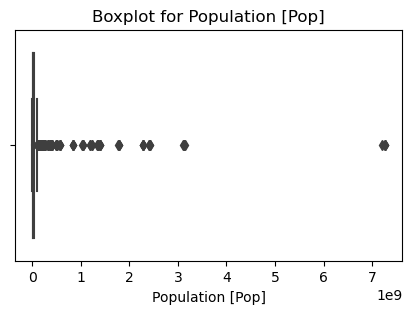

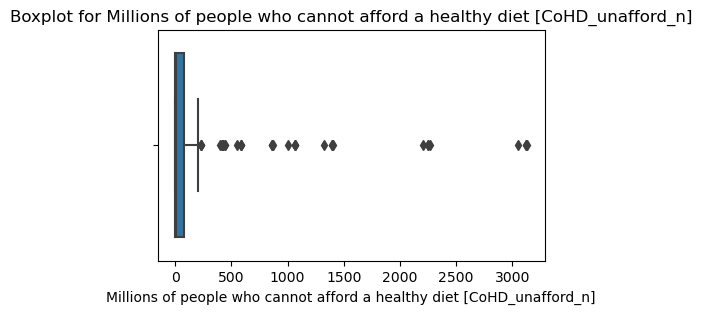

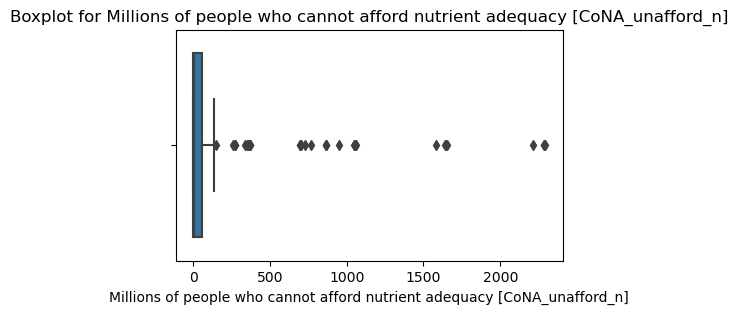

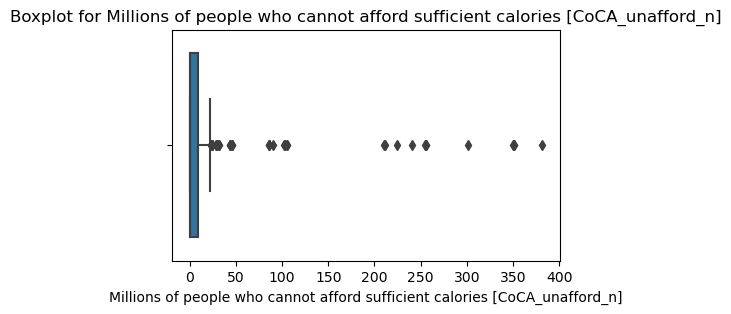

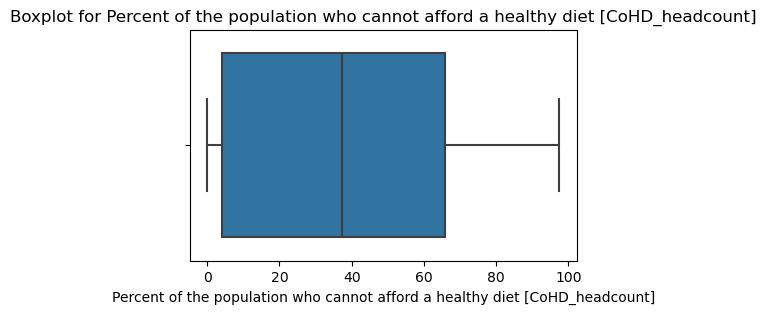

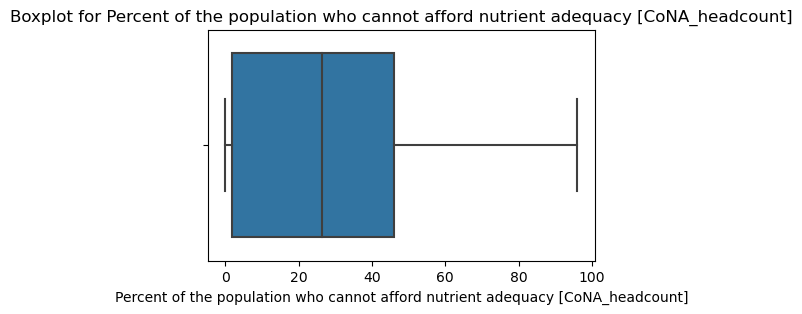

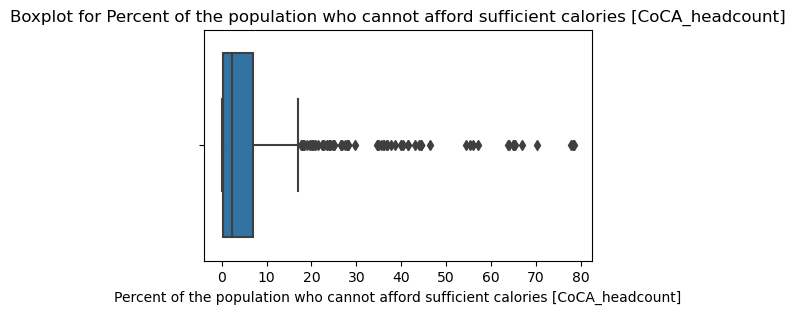

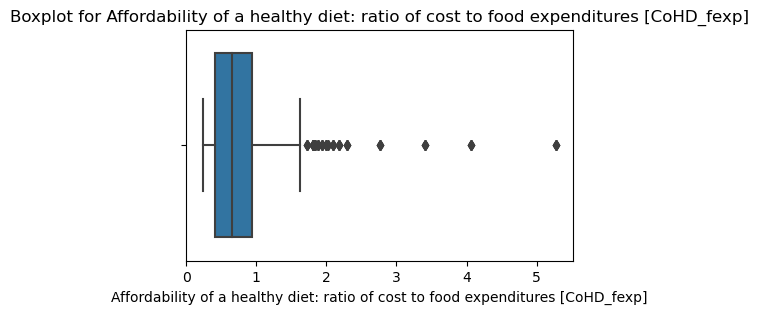

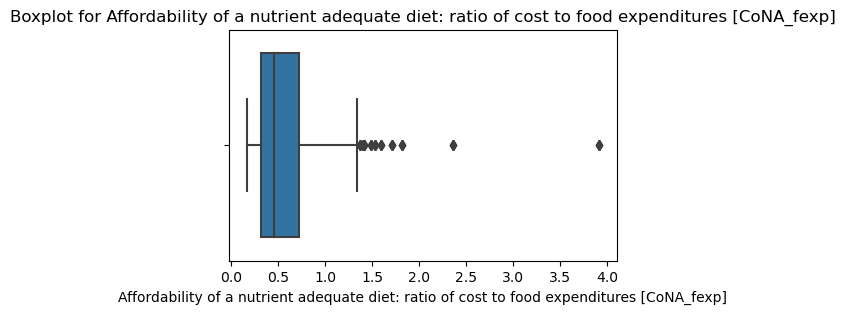

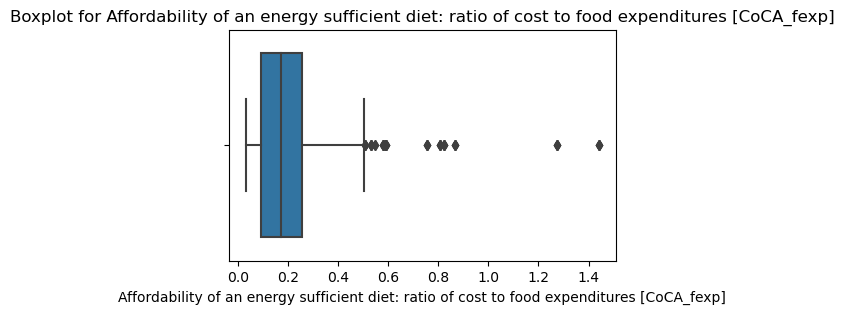

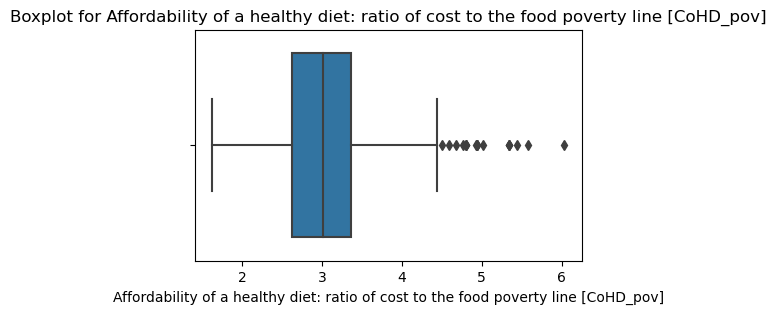

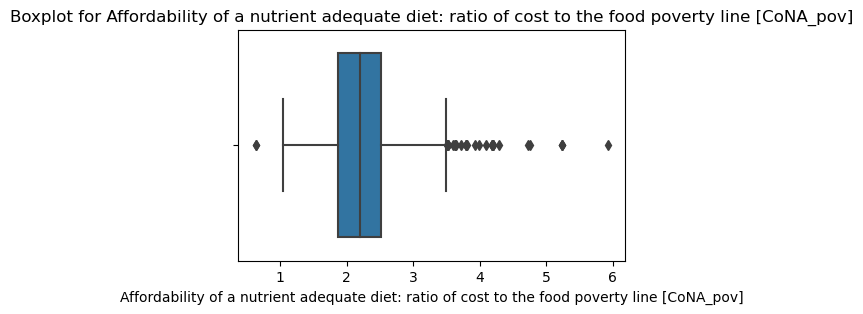

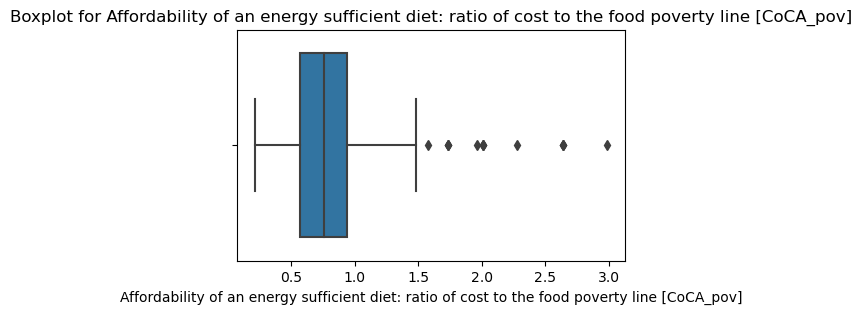

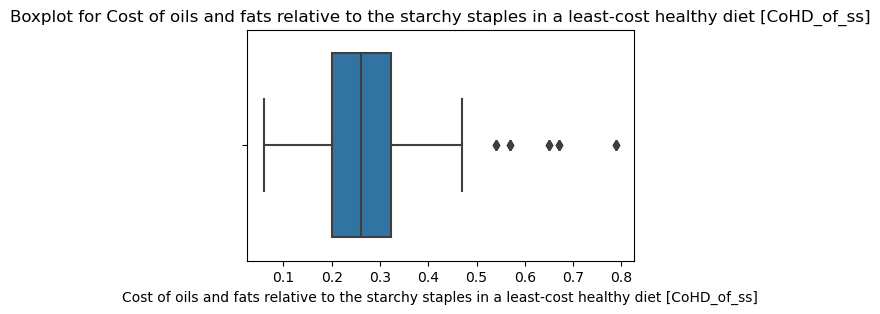

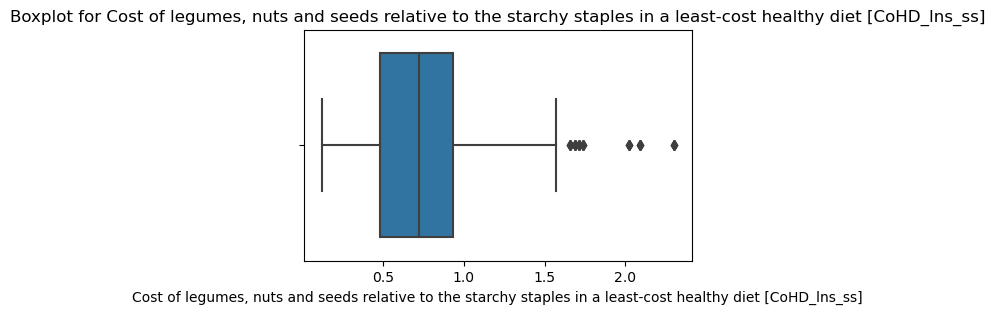

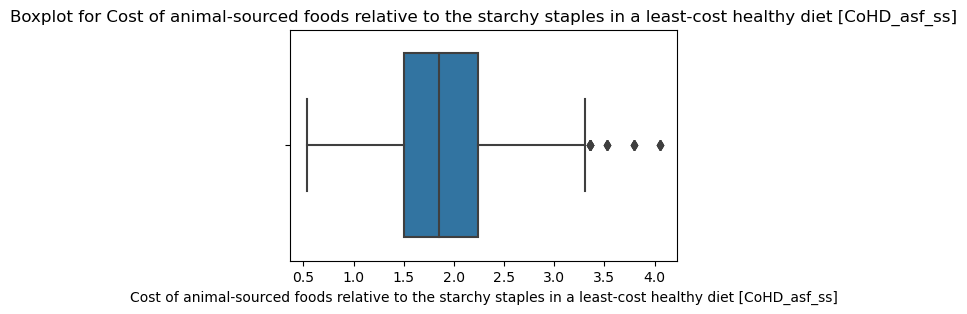

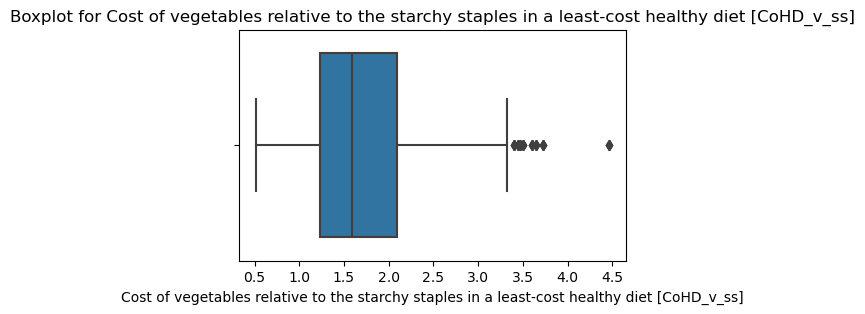

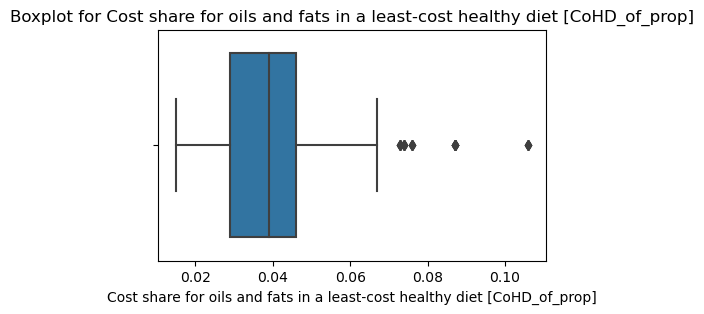

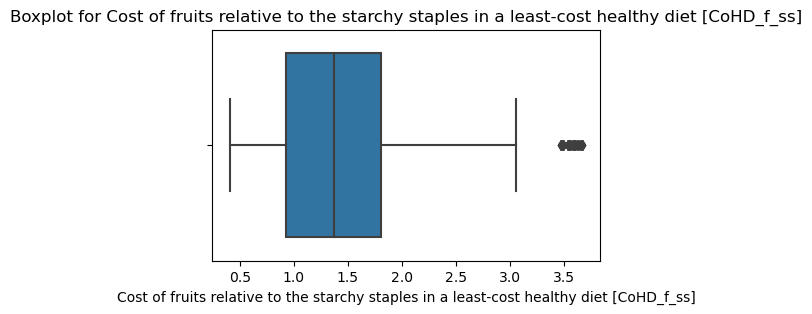

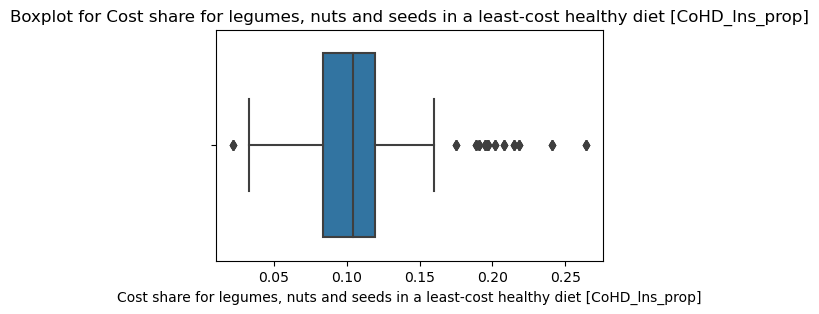

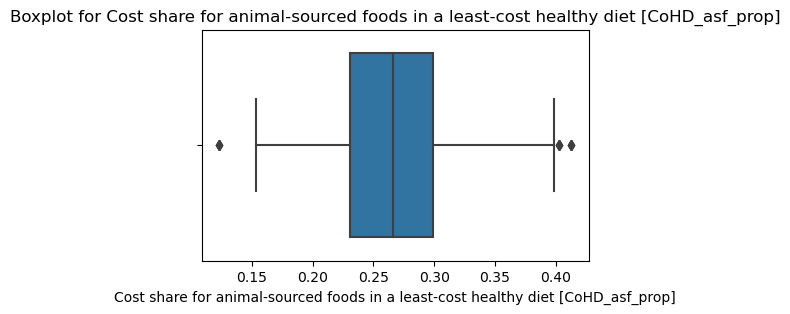

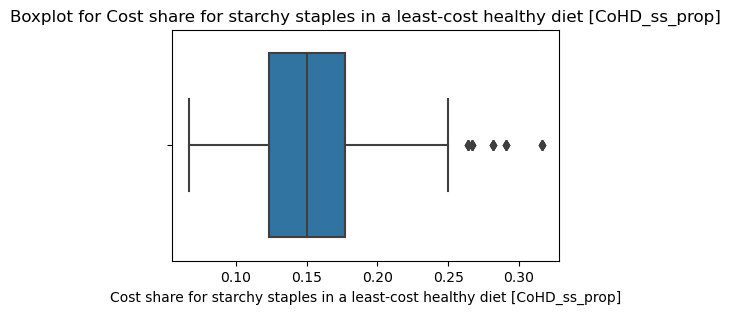

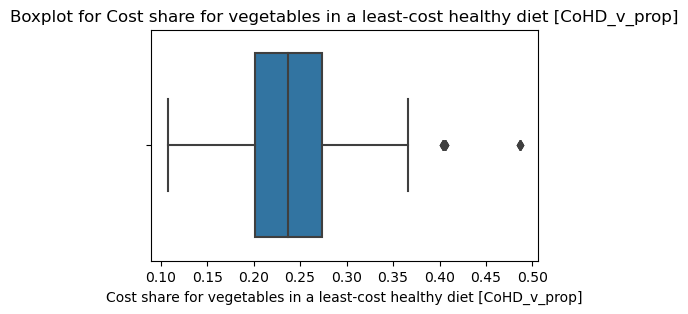

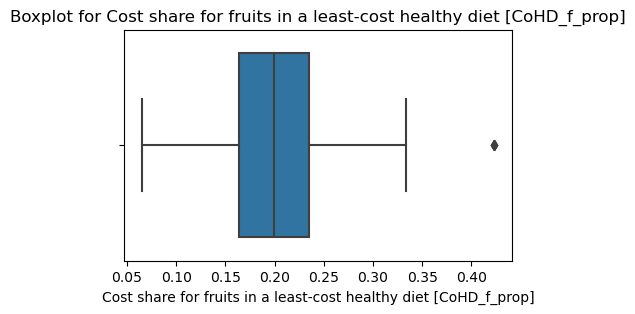

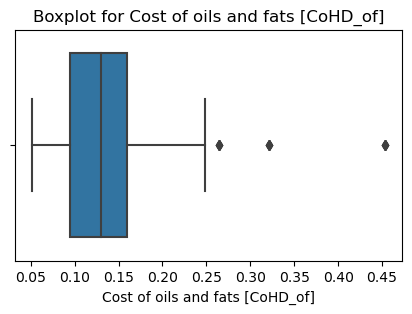

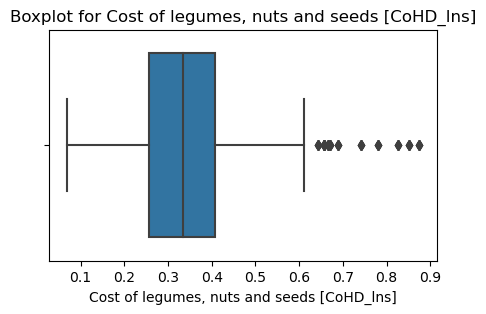

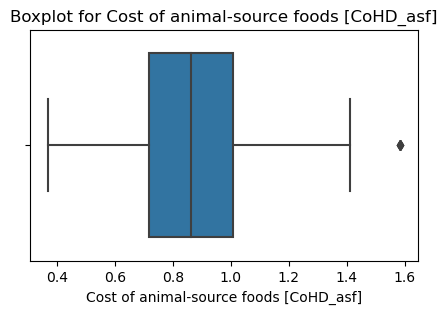

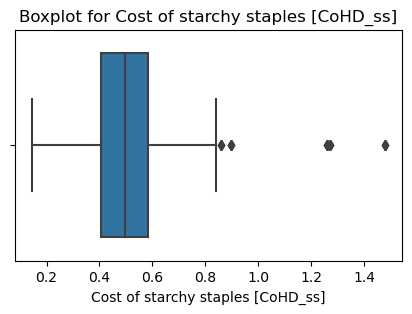

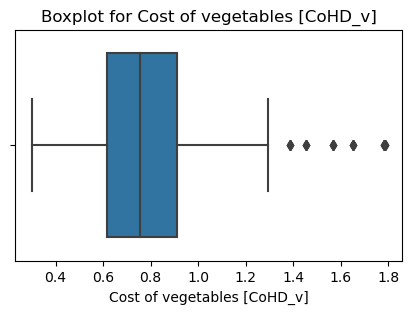

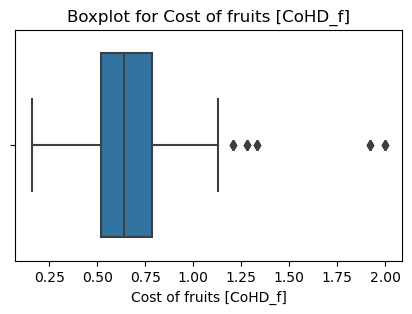

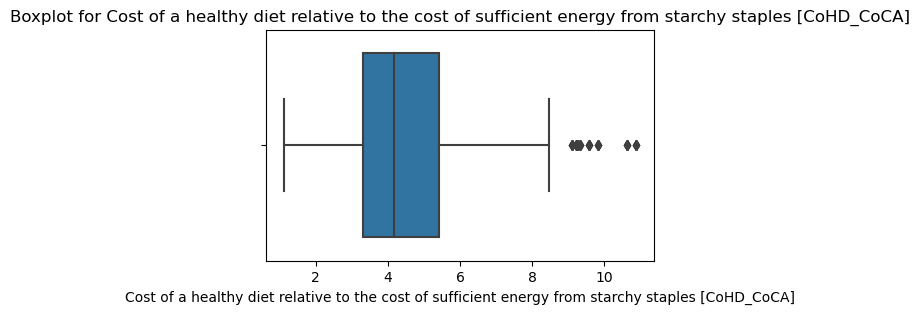

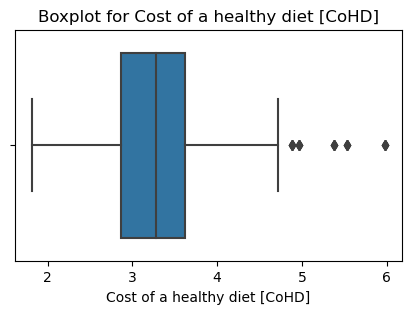

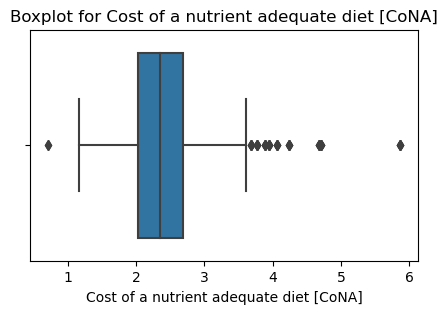

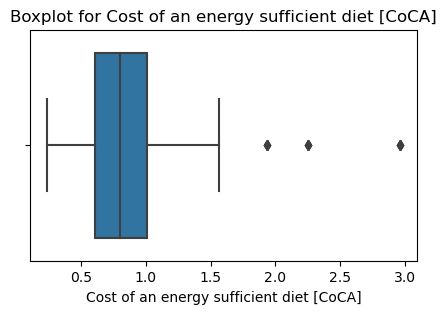

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

float_columns = df.select_dtypes(include='float64').columns

for column in float_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [18]:
# Dictionary of correspondence between old and new column names
correspondance_noms = {
    'Country Name': 'country',
    'Classification Code': 'classif',
    'Time' : 'year', 
    'Population [Pop]' : 'pop',
    'Millions of people who cannot afford a healthy diet [CoHD_unafford_n]' : 'nb_notaff_healthy',
    'Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n]' : 'nb_notaff_nutrient',
    'Millions of people who cannot afford sufficient calories [CoCA_unafford_n]' : 'nb_notaff_calories',
    'Percent of the population who cannot afford a healthy diet [CoHD_headcount]' : 'per_notaff_healthy',
    'Percent of the population who cannot afford nutrient adequacy [CoNA_headcount]' : 'per_notaff_nutrient',
    'Percent of the population who cannot afford sufficient calories [CoCA_headcount]' : 'per_notaff_calories',
    'Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp]' : 'aff_healthy_cost_fexp',
    'Affordability of a nutrient adequate diet: ratio of cost to food expenditures [CoNA_fexp]' : 'aff_nutrient_cost_fexp',
    'Affordability of an energy sufficient diet: ratio of cost to food expenditures [CoCA_fexp]' : 'aff_calories_cost_fexp',
    'Affordability of a healthy diet: ratio of cost to the food poverty line [CoHD_pov]' : 'aff_healthy_cost_pov',
    'Affordability of a nutrient adequate diet: ratio of cost to the food poverty line [CoNA_pov]' : 'aff_nutrient_cost_pov',
    'Affordability of an energy sufficient diet: ratio of cost to the food poverty line [CoCA_pov]' : 'aff_calories_cost_pov',
    'Cost of oils and fats relative to the starchy staples in a least-cost healthy diet [CoHD_of_ss]' : 'cost_of_ss',
    'Cost of legumes, nuts and seeds relative to the starchy staples in a least-cost healthy diet [CoHD_lns_ss]' : 'cost_lns_ss',
    'Cost of animal-sourced foods relative to the starchy staples in a least-cost healthy diet [CoHD_asf_ss]' : 'cost_asf_ss',
    'Cost of vegetables relative to the starchy staples in a least-cost healthy diet [CoHD_v_ss]' : 'cost_v_ss',
    'Cost share for oils and fats in a least-cost healthy diet [CoHD_of_prop]' : 'cost_of_healthy',
    'Cost of fruits relative to the starchy staples in a least-cost healthy diet [CoHD_f_ss]' : 'cost_f_ss',
    'Cost share for legumes, nuts and seeds in a least-cost healthy diet [CoHD_lns_prop]' : 'cost_lns_healthy',
    'Cost share for animal-sourced foods in a least-cost healthy diet [CoHD_asf_prop]' : 'cost_asf_healthy',
    'Cost share for starchy staples in a least-cost healthy diet [CoHD_ss_prop]' : 'cost_ss_healthy',
    'Cost share for vegetables in a least-cost healthy diet [CoHD_v_prop]' : 'cost_v_healthy',
    'Cost share for fruits in a least-cost healthy diet [CoHD_f_prop]' : 'cost_f_healthy',
    'Cost of oils and fats [CoHD_of]' : 'cost_of',
    'Cost of legumes, nuts and seeds [CoHD_lns]' : 'cost_lns',
    'Cost of animal-source foods [CoHD_asf]' : 'cost_asf',
    'Cost of starchy staples [CoHD_ss]' : 'cost_ss', 
    'Cost of vegetables [CoHD_v]' : 'cost_v',
    'Cost of fruits [CoHD_f]' : 'cost_f',
    'Cost of a healthy diet relative to the cost of sufficient energy from starchy staples [CoHD_CoCA]' : 'cost_healthy_ss',
    'Cost of a healthy diet [CoHD]' : 'cost_healthy',
    'Cost of a nutrient adequate diet [CoNA]' : 'cost_nutrient',
    'Cost of an energy sufficient diet [CoCA]' : 'cost_energy'
}

df.rename(columns=correspondance_noms, inplace=True)
print(df)

     classif             country           pop  nb_notaff_healthy  \
0    FPN 1.0               WORLD  7.208181e+09        3049.100000   
1    FPN 1.0             Albania  2.873457e+06           1.100000   
2    FPN 1.0             Algeria  4.138917e+07          14.600000   
3    FPN 1.0              Angola  2.981677e+07          27.700000   
4    FPN 1.0            Anguilla  1.584458e+08          80.211613   
..       ...                 ...           ...                ...   
739  FPN 2.1             Uruguay  3.422200e+06           0.100000   
740  FPN 2.1             Vietnam  9.403305e+07          23.400000   
741  FPN 2.1  West Bank and Gaza  4.454805e+06           0.800000   
742  FPN 2.1              Zambia  1.729805e+07          15.300000   
743  FPN 2.1            Zimbabwe  1.475110e+07          10.000000   

     nb_notaff_nutrient  nb_notaff_calories  per_notaff_healthy  \
0           2212.200000          381.200000           42.900000   
1              0.400000            0.

## 2.5 - Descriptive Statistics <a class="anchor"  id="statdesc"></a>

### 2.5.1 - Univariate Statistics <a class="anchor"  id="statdescuniv"></a>

We will now perform the descriptive statistics for a few relevant variables : 

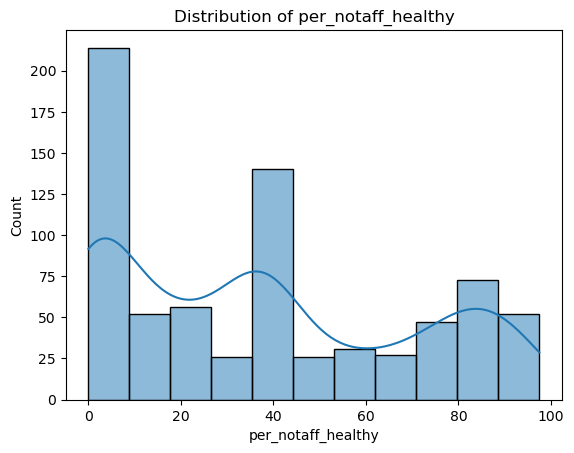

In [19]:
target_variable = 'per_notaff_healthy' 

# Visualisation
sns.histplot(df[target_variable], kde=True) 
plt.title('Distribution of ' + target_variable) 
plt.show() 

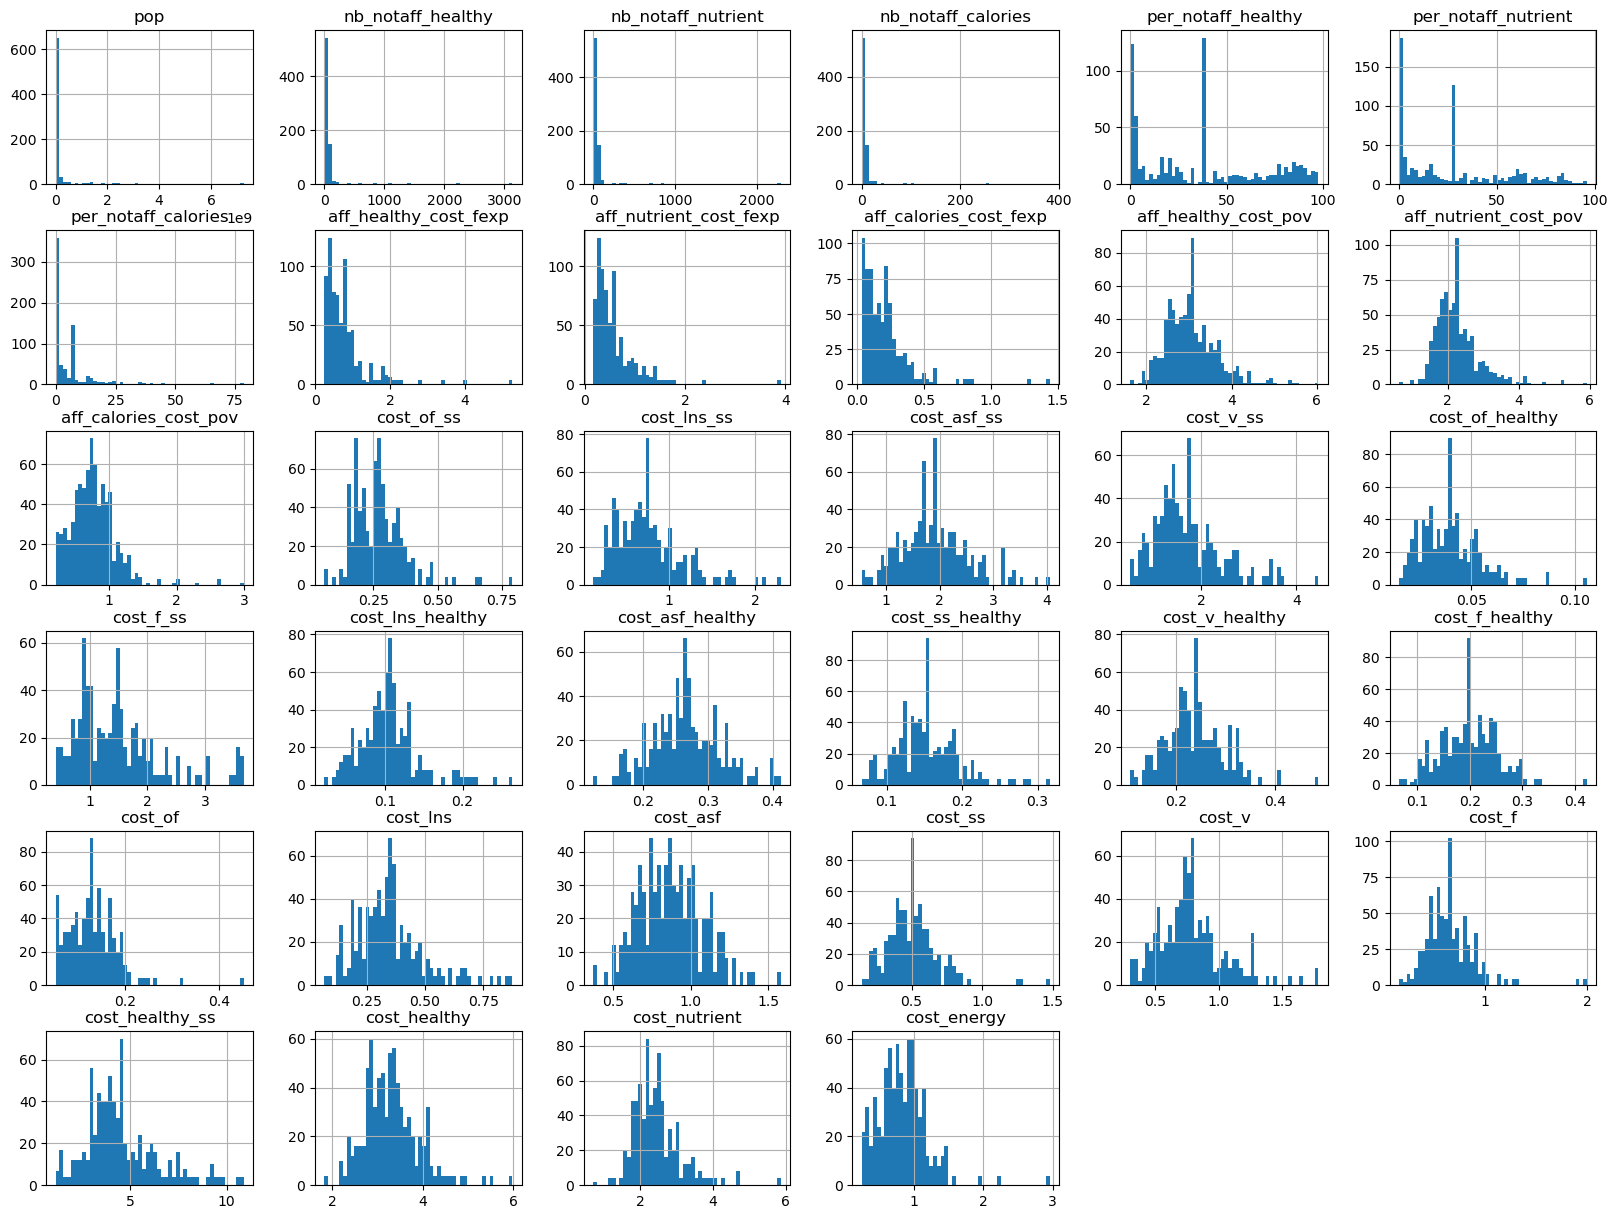

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
relevant_variables = ['per_notaff_healthy',
                      'aff_healthy_cost_fexp', 
                      'cost_of_ss', 
                      'cost_f_healthy', 
                      'cost_asf_healthy'] 

In [22]:
# Univariate statistics for each variable 
descriptives_stat = pd.DataFrame()

for variable in relevant_variables: 
    descriptives_stat[variable] = df[variable].describe()
    
print(descriptives_stat)

       per_notaff_healthy  aff_healthy_cost_fexp  cost_of_ss  cost_f_healthy  \
count          744.000000             744.000000  744.000000      744.000000   
mean            37.424355               0.808629    0.271229        0.199217   
std             31.556200               0.637104    0.101297        0.053770   
min              0.000000               0.247000    0.060000        0.065000   
25%              4.000000               0.416750    0.200000        0.163750   
50%             37.424355               0.650000    0.260000        0.199217   
75%             65.725000               0.933500    0.322500        0.235000   
max             97.500000               5.272000    0.790000        0.423000   

       cost_asf_healthy  
count        744.000000  
mean           0.265811  
std            0.053360  
min            0.123000  
25%            0.231000  
50%            0.265811  
75%            0.299250  
max            0.413000  


<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Interpretation  </strong>
   
- The **mean percentage of the population unable to afford a healthy diet is approximately 37.42%**, with a notable standard deviation of 31.56%, suggesting **substantial variability in the affordability across nations**. Regarding the affordability ratio of a healthy diet to total food expenditure, the mean is approximately 0.81, indicating that, on average, a healthy diet is estimated to be affordable in most countries.

- The variability in the cost components is evident in the statistics. The mean cost share of oils and fats relative to starchy staples (cost_of_ss) is approximately 0.27, with a standard deviation of 0.10. Similarly, the mean cost share of fruits relative to starchy staples (cost_f_healthy) is approximately 0.20, showing some variation in the dietary composition cost across countries. The mean cost share for animal-sourced foods in a healthy diet (cost_asf_healthy) is approximately 0.27, reflecting the proportional expenditure on animal-sourced foods. It is noteworthy that the **standard deviations for these cost components are relatively moderate**, indicating a **degree of consistency in the distribution of these cost shares across countries**.
    
- The minimum and maximum values for each variable provide additional context, highlighting the range of variation observed in the dataset, which may be due to **differences in population size and socioeconomic conditions (economic disruption, wars/conflicts, displacement/migration, international aid, etc.)**. Countries with larger populations may exhibit greater diversity in income levels and living standards, leading to a broader range of affordability percentages. Smaller populations, on the other hand, may experience more homogeneity in these indicators.

</div>

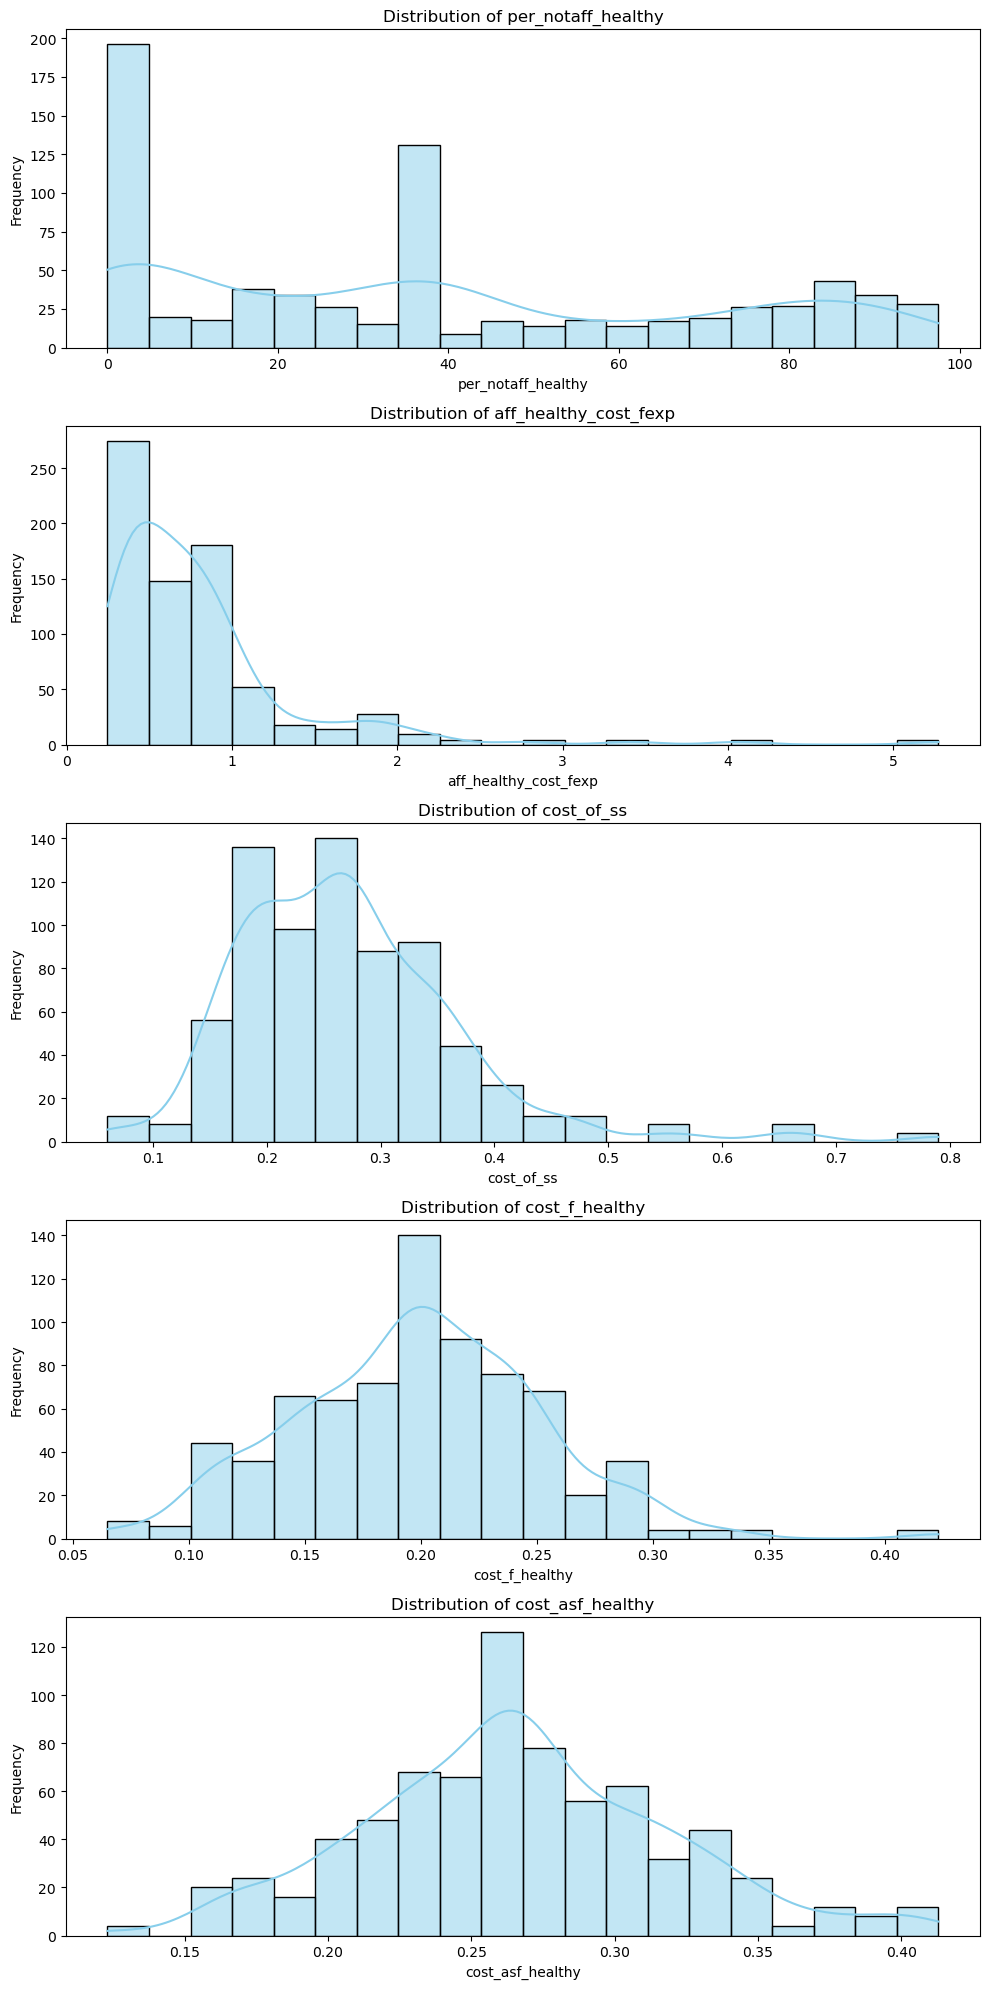

In [23]:
# Visualtisation for each variable
num_cols=5
num_rows=1

plt.figure(figsize=(10, 20)) 
for i, variable in enumerate(relevant_variables, 1): 
    plt.subplot(5,1, i) 
    sns.histplot(df[variable], bins=20, kde=True, color='skyblue', edgecolor='black') 
    plt.title('Distribution of ' + variable) 
    plt.xlabel(variable) 
    plt.ylabel('Frequency') 
    
plt.tight_layout() 
plt.show()

##### Interprétation : 

* This variable measures the relationship between the cost of a healthy diet and food expenditure. More precisely, it quantifies the financial capacity of the population to afford a nutritionally healthy diet by relating the cost of such a diet to total food expenditure. The graph shows us that the values of this variable are almost all greater than 0.5, which indicates that the cost of healthy eating is a higher one compared to total expenses, which can signal financial challenges for the population in terms of accessibility to healthy food

---          
* The variable `cost_of_ss (Cost of oils and fats relative to the starchy staples in a least-cost healthy diet)` measures the cost of oils and fats relative to starchy foods in a least-cost healthy diet. This variable gives an indication of the distribution of costs of oils and fats relative to starchy staple foods in a diet considered healthy and economical.The histogram shows that the values of the variable CoHD_of_ss are close to zero, this suggests that the cost of oils and fats is relatively low compared to starchy foods in a lower-cost healthy diet
     
---      
* The variable `cost_f_ss (Cost of fruits relative to the starchy staples in a least-cost healthy diet)` measures the cost of fruits relative to starchy foods in a least-cost healthy diet. This variable provides an indication of the distribution of costs of fruit versus starchy staples in a diet considered healthy and economical. We find that fruits are more expensive than high-starch foods in a lower-cost healthy diet. Indeed, most of the observed values of this variable are greater than 1.
    
---      
* The variable `cost_asf_healthy (Cost share for animal-sourced foods in a least-cost healthy diet)` measures the share of costs attributed to foods of animal origin compared to total costs in a least-cost healthy diet. This variable gives an indication of the proportion of costs associated with products of animal origin compared to the overall cost of a diet considered healthy and economical. Here, the values of the variable CoHD_asf_prop is close to zero, this suggests that the share of costs attributed to foods of animal origin is relatively low compared to the total costs in a lower-cost healthy diet.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


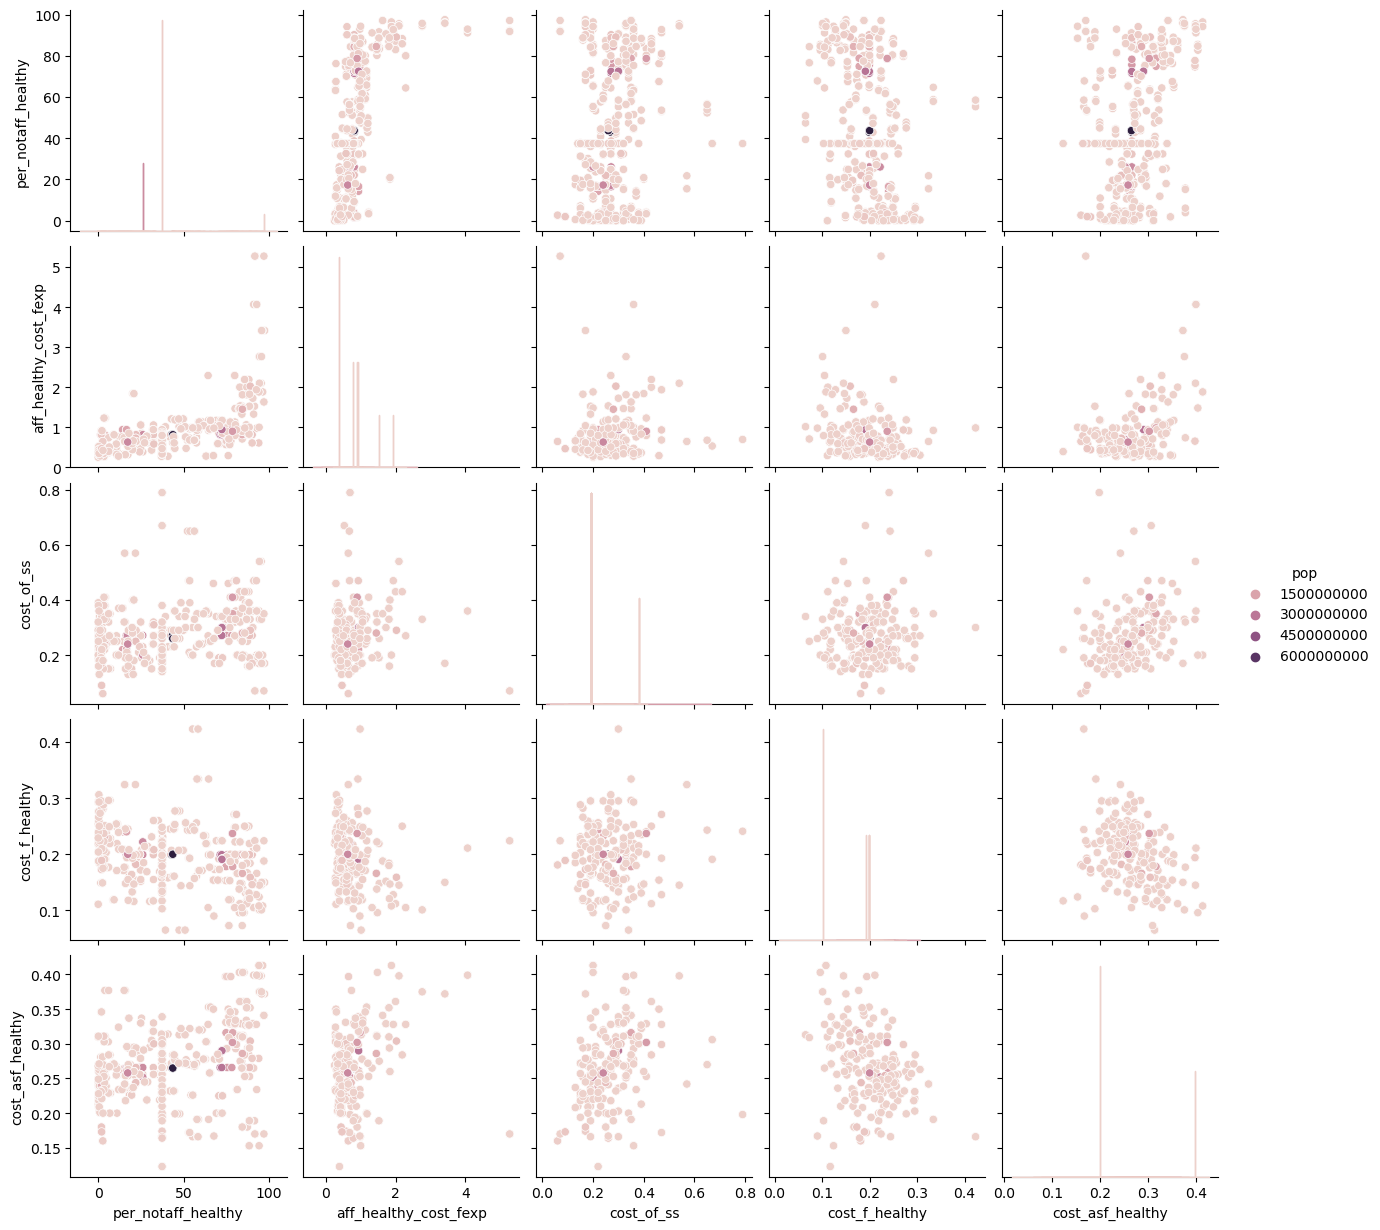

In [24]:
sns.pairplot(data=df, vars=relevant_variables, hue='pop')
plt.show()

### 2.5.2 - Bivariate Statistics <a class="anchor"  id="statdescbiv"></a>

We will now perform a bivariate analysis between the target variable and a few variables that are relevant to study.

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation  </strong>

We want to visualize the percentage of the population that cannot afford a healthy diet by country. But given that we have a large number of countries in the dataset, we will represent on one hand the 3 countries with the highest percentage of people who cannot afford a healthy diet and on the other hand the 3 countries with the lowest percentage.

</div>

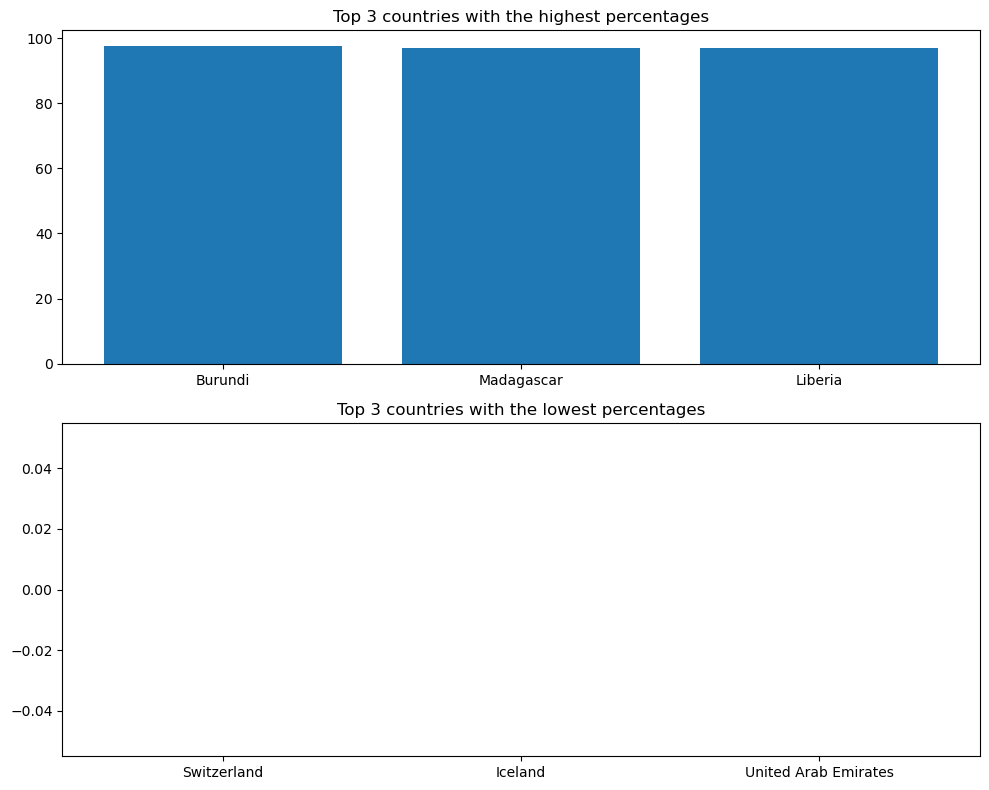

In [26]:
df_sort = df.sort_values(by='per_notaff_healthy', ascending=False) 
df_sort = df_sort.dropna()

# Selection of the 5 countries with the highest percentages
top3_high = df_sort.head(3) 

# Selection of the 5 countries with the lowest percentages 
top3_low = df_sort.tail(3) 


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8)) 

# ax1
ax1.bar(top3_high['country'], top3_high['per_notaff_healthy']) 
ax1.set_title('Top 3 countries with the highest percentages') 


# ax2
ax2.bar(top3_low['country'], top3_low['per_notaff_healthy']) 
ax2.set_title('Top 3 countries with the lowest percentages') 

    
plt.tight_layout() 

plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Interpretation  </strong>

The two graphs above allow us to see that Burundi is the country with the highest percentage of people who cannot afford to have a healthy diet (99%), followed by Madagascar (98%), and Liberia (97%).
As for Switzerland, Iceland and the United Arab Emirates, all people living there manage to have a healthy diet

</div>

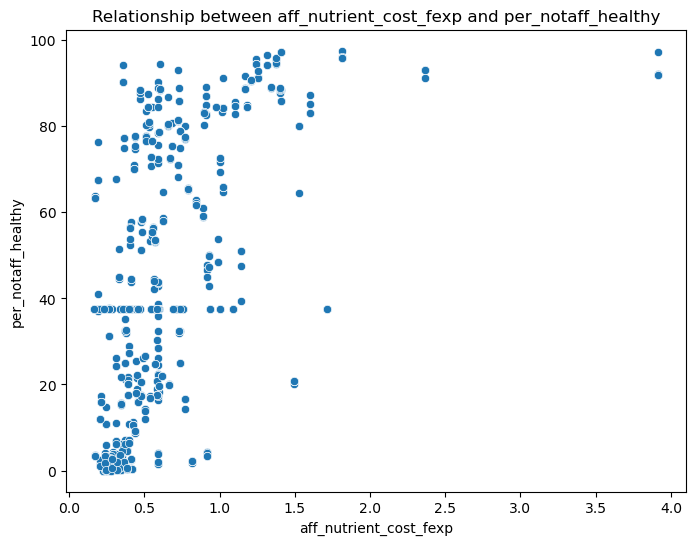

In [27]:
# Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='aff_nutrient_cost_fexp', y=target_variable, data=df) 
plt.title('Relationship between aff_nutrient_cost_fexp and ' + target_variable) 
plt.xlabel('aff_nutrient_cost_fexp')
plt.ylabel('per_notaff_healthy')
plt.show()

**Interpretation** : We can observe that in a relatively high number of countries, the cost of a healthy diet is low compared to total food expenditure. Nevertheless, for a considerable subset of countries, the cost of a healthy diet is 1 to 2.5 times more expensive than total food expenditure. In these instances, an observable correlation is discerned, indicating that the proportion of individuals unable to afford a healthy diet surpasses 80%.

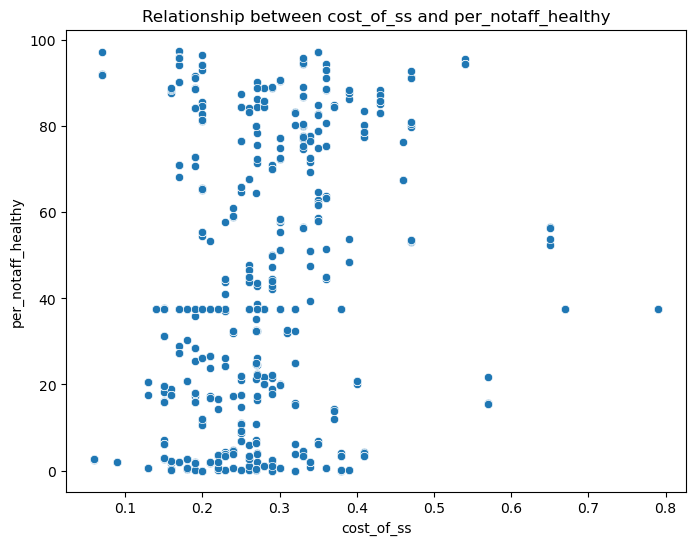

In [28]:
# Cost of oils and fats relative to the starchy staples in a least-cost healthy diet [CoHD_of_ss]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost_of_ss', y=target_variable, data=df) 
plt.title('Relationship between cost_of_ss and ' + target_variable) 
plt.xlabel('cost_of_ss')
plt.ylabel('per_notaff_healthy')
plt.show()

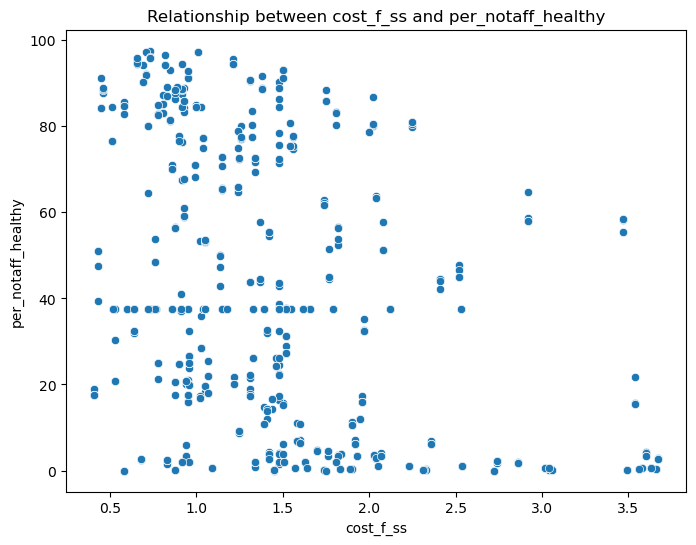

In [29]:
# Cost of fruits relative to the starchy staples in a least-cost healthy diet [CoHD_f_ss]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost_f_ss', y=target_variable, data=df) 
plt.title('Relationship between cost_f_ss and ' + target_variable) 
plt.xlabel('cost_f_ss')
plt.ylabel('per_notaff_healthy')
plt.show()

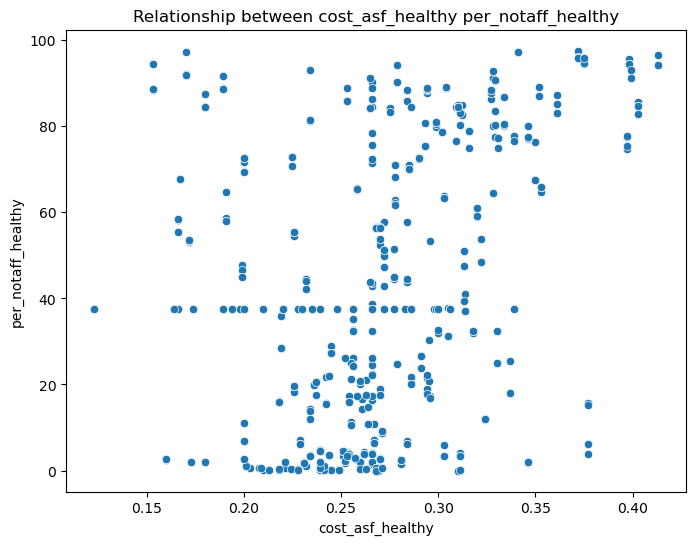

In [30]:
# Cost share for animal-sourced foods in a least-cost healthy diet [CoHD_asf_prop]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost_asf_healthy', y=target_variable, data=df) 
plt.title('Relationship between cost_asf_healthy ' + target_variable) 
plt.xlabel('cost_asf_healthy')
plt.ylabel('per_notaff_healthy')
plt.show()

# Part 3 - Data Preparation <a class="anchor"  id="dataprep"></a>
-----------------

## 3.1 - Relationship between variables <a class="anchor"  id="rel"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

    
In this part, we will check the connection that can have between the explanatory variables, that is to say those other than `per_notaff_healthy`, but also between the explanatory variables and the variable to be explained. This helps identify potential relationships between variables, avoid multicollinearity (high correlation between predictors), and ensure that the assumptions underlying statistical or machine learning models are respected. Such verification also helps select the most relevant variables for the model, thereby improving the quality of predictions and the understanding of relationships between features of the dataset.   
    
</div>

In [182]:
df.describe()

pop  nb_notaff_healthy  nb_notaff_nutrient  \
count  7.440000e+02         744.000000          744.000000   
mean   1.584458e+08          80.211613           58.572258   
std    6.576380e+08         314.645590          231.846900   
min    2.956700e+04           0.000000            0.000000   
25%    2.401840e+06           0.400000            0.200000   
50%    1.005770e+07           5.300000            3.950000   
75%    4.114406e+07          80.211613           58.572258   
max    7.262507e+09        3133.400000         2293.800000   

       nb_notaff_calories  per_notaff_healthy  per_notaff_nutrient  \
count          744.000000          744.000000           744.000000   
mean             9.243226           37.424355            27.531774   
std             37.591397           31.556200            26.615104   
min              0.000000            0.000000             0.000000   
25%              0.000000            4.000000             1.900000   
50%              0.400000           37.424355            26.350000   
75%              9.243226           65.725000            45.950000   
max            381.200000           97.500000            96.000000   

       per_notaff_calories  aff_healthy_cost_fexp  aff_nutrient_cost_fexp  \
count           744.000000             744.000000              744.000000   
mean              6.933065               0.808629                0.591792   
std              12.287847               0.637104                0.439582   
min               0.000000               0.247000                0.167000   
25%               0.200000               0.416750                0.313750   
50%               2.200000               0.650000                0.461000   
75%               6.933065               0.933500                0.726750   
max              78.500000               5.272000                3.913000   

       aff_calories_cost_fexp  ...     cost_of    cost_lns    cost_asf  \
count              744.000000  ...  744.000000  744.000000  744.000000   
mean                 0.212583  ...    0.130354    0.346642    0.872105   
std                  0.193355  ...    0.051585    0.144053    0.207621   
min                  0.032000  ...    0.052000    0.069000    0.368000   
25%                  0.089500  ...    0.094750    0.257000    0.717500   
50%                  0.170000  ...    0.129500    0.333500    0.864000   
75%                  0.256250  ...    0.160000    0.407000    1.006000   
max                  1.440000  ...    0.453000    0.875000    1.583000   

         cost_ss      cost_v      cost_f  cost_healthy_ss  cost_healthy  \
count  744.00000  744.000000  744.000000       744.000000    744.000000   
mean     0.50771    0.791588    0.660972         4.530318      3.311839   
std      0.18330    0.265897    0.239354         1.886365      0.629742   
min      0.14700    0.303000    0.162000         1.124543      1.822000   
25%      0.40575    0.615250    0.518000         3.320000      2.871250   
50%      0.49700    0.757000    0.640000         4.160000      3.273000   
75%      0.58500    0.910750    0.786000         5.425000      3.619000   
max      1.47700    1.785000    1.997000        10.880000      5.975000   

       cost_nutrient  cost_energy  
count     744.000000   744.000000  
mean        2.453239     0.833306  
std         0.647819     0.355677  
min         0.709000     0.239000  
25%         2.028250     0.608000  
50%         2.353000     0.801000  
75%         2.686000     1.009000  
max         5.866000     2.958000  

[8 rows x 34 columns]

In [183]:
df.dtypes

classif                    object
country                    object
pop                       float64
nb_notaff_healthy         float64
nb_notaff_nutrient        float64
nb_notaff_calories        float64
per_notaff_healthy        float64
per_notaff_nutrient       float64
per_notaff_calories       float64
aff_healthy_cost_fexp     float64
aff_nutrient_cost_fexp    float64
aff_calories_cost_fexp    float64
aff_healthy_cost_pov      float64
aff_nutrient_cost_pov     float64
aff_calories_cost_pov     float64
cost_of_ss                float64
cost_lns_ss               float64
cost_asf_ss               float64
cost_v_ss                 float64
cost_of_healthy           float64
cost_f_ss                 float64
cost_lns_healthy          float64
cost_asf_healthy          float64
cost_ss_healthy           float64
cost_v_healthy            float64
cost_f_healthy            float64
cost_of                   float64
cost_lns                  float64
cost_asf                  float64
cost_ss       

In [184]:
# Separation of numerical and categorical variables
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

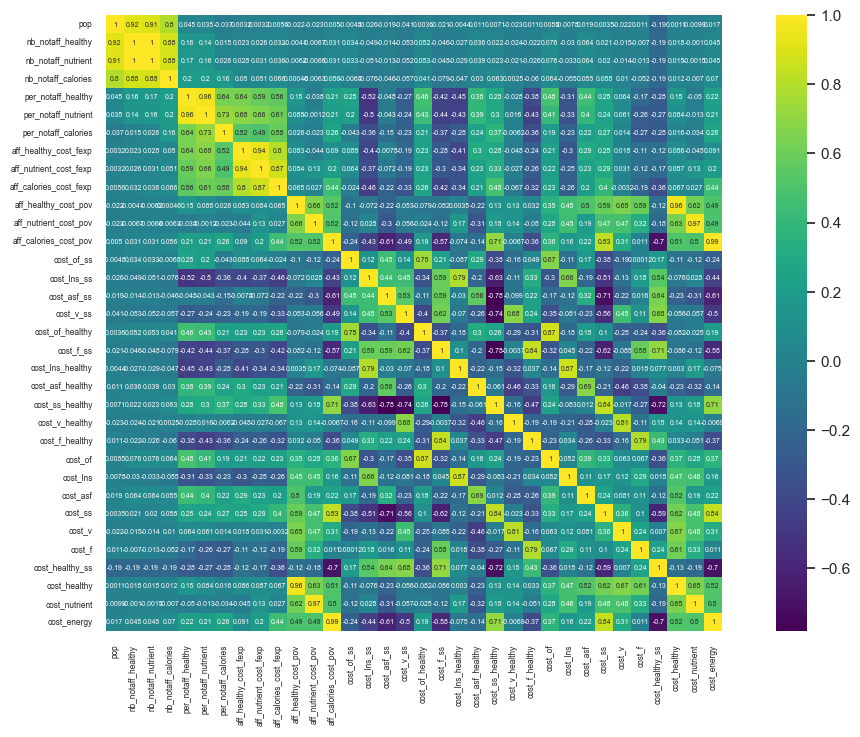

In [185]:
fig = plt.figure(figsize=(14, 8))

cmap = 'viridis'

heatmap = sns.heatmap(df[list(num_col.index)].corr(), annot=True, square=True, cmap=cmap, 
                      annot_kws={"size":5})

annot_font_size = 6  
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=annot_font_size)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=annot_font_size)

plt.show()

In [186]:
print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['nb_notaff_nutrient', 'nb_notaff_healthy', 
            'nb_notaff_calories','aff_healthy_cost_pov',
            'aff_nutrient_cost_pov','aff_calories_cost_pov','cost_of_ss', 'cost_lns_ss', 
            'cost_asf_ss','cost_v_ss',
            'cost_f_ss','cost_healthy_ss', 
            'cost_of', 
            'cost_lns','cost_asf',
            'cost_ss','cost_v','cost_f','aff_healthy_cost_fexp',
            'aff_nutrient_cost_fexp', 
            'aff_calories_cost_fexp',
            'per_notaff_nutrient',
            'cost_energy']
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 36
Number of columns after deleting: 13


In [187]:
# Séparation variables numériques et qualitative
cat_col2 = df.dtypes[df.dtypes == 'object']
num_col2 = df.dtypes[df.dtypes != 'object']

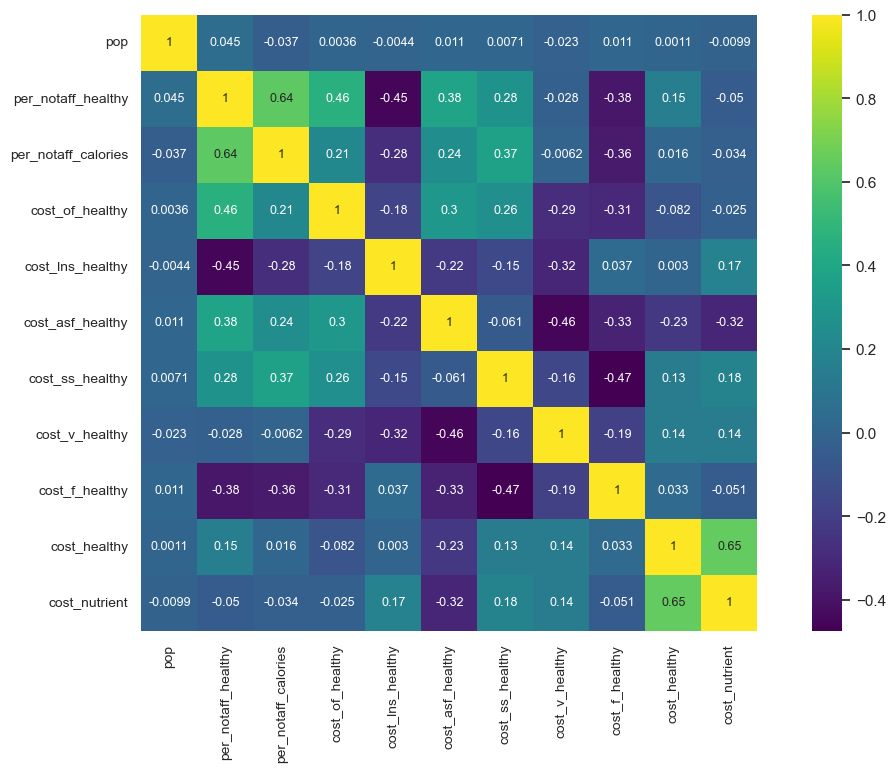

In [188]:
fig = plt.figure(figsize=(14, 8))

cmap = 'viridis'

heatmap = sns.heatmap(df[list(num_col2.index)].corr(), annot=True, square=True, cmap=cmap, 
                      annot_kws={"size":9})

annot_font_size = 10 
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=annot_font_size)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=annot_font_size)

plt.show()

In [189]:
df.to_csv('dfclean.csv', index = False)

In [190]:
df = pd.read_csv('dfclean.csv')
df.head()

classif   country           pop  per_notaff_healthy  per_notaff_calories  \
0  FPN 1.0     WORLD  7.208181e+09           42.900000             5.400000   
1  FPN 1.0   Albania  2.873457e+06           37.800000             0.000000   
2  FPN 1.0   Algeria  4.138917e+07           35.200000             0.200000   
3  FPN 1.0    Angola  2.981677e+07           92.900000            57.200000   
4  FPN 1.0  Anguilla  1.584458e+08           37.424355             6.933065   

   cost_of_healthy  cost_lns_healthy  cost_asf_healthy  cost_ss_healthy  \
0          0.03962          0.104686          0.265811         0.152137   
1          0.02300          0.112000          0.305000         0.152000   
2          0.03500          0.131000          0.256000         0.132000   
3          0.03800          0.091000          0.234000         0.194000   
4          0.03600          0.088000          0.174000         0.209000   

   cost_v_healthy  cost_f_healthy  cost_healthy  cost_nutrient  
0        0.237366        0.199217         3.314          2.457  
1        0.179000        0.231000         3.952          2.471  
2        0.186000        0.260000         3.763          2.323  
3        0.277000        0.166000         4.327          3.231  
4        0.274000        0.218000         3.717          2.433

In [191]:
df.describe()

pop  per_notaff_healthy  per_notaff_calories  cost_of_healthy  \
count  7.440000e+02          744.000000           744.000000       744.000000   
mean   1.584458e+08           37.424355             6.933065         0.039620   
std    6.576380e+08           31.556200            12.287847         0.014279   
min    2.956700e+04            0.000000             0.000000         0.015000   
25%    2.401840e+06            4.000000             0.200000         0.029000   
50%    1.005770e+07           37.424355             2.200000         0.039000   
75%    4.114406e+07           65.725000             6.933065         0.046000   
max    7.262507e+09           97.500000            78.500000         0.106000   

       cost_lns_healthy  cost_asf_healthy  cost_ss_healthy  cost_v_healthy  \
count        744.000000        744.000000       744.000000      744.000000   
mean           0.104686          0.265811         0.152137        0.237366   
std            0.038443          0.053360         0.041622        0.058733   
min            0.022000          0.123000         0.067000        0.108000   
25%            0.083750          0.231000         0.123000        0.202000   
50%            0.104000          0.265811         0.150000        0.237000   
75%            0.119000          0.299250         0.177000        0.274000   
max            0.264000          0.413000         0.316000        0.487000   

       cost_f_healthy  cost_healthy  cost_nutrient  
count      744.000000    744.000000     744.000000  
mean         0.199217      3.311839       2.453239  
std          0.053770      0.629742       0.647819  
min          0.065000      1.822000       0.709000  
25%          0.163750      2.871250       2.028250  
50%          0.199217      3.273000       2.353000  
75%          0.235000      3.619000       2.686000  
max          0.423000      5.975000       5.866000

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>
    
Since a significant portion of our variables are continuous, and considering the upcoming phase of our study requires their conversion into categorical variables, a thoughtful transformation process becomes necessary. Therefore, it is crucial to identify a suitable approach to apply this transformation to our variables. 
    
To begin, we will explore the computation of both the **median** and, subsequently, the **mean** for each categorical variable.
        
</div>

In [192]:
# Calculation of medians 
median_pop = df['pop'].median()
print("Median Population:", median_pop)

median_per_notaff_healthy = df['per_notaff_healthy'].median()
print("Median % of the population who cannot afford a healthy diet:", median_per_notaff_healthy)

median_per_notaff_calories = df['per_notaff_calories'].median()
print("Median % of the population who cannot afford sufficient calories:", median_per_notaff_calories)

median_cost_of_healthy = df['cost_of_healthy'].median() 
print("Median cost share for oils and fats in a least-cost healthy diet:", median_cost_of_healthy)

median_cost_lns_healthy = df['cost_lns_healthy'].median() 
print("Median cost share for legumes, nuts and seeds in a least-cost healthy diet:", median_cost_lns_healthy)

median_cost_asf_healthy = df['cost_asf_healthy'].median() 
print("Median cost share for animal-sourced foods in a least-cost healthy diet:", median_cost_asf_healthy)

median_cost_ss_healthy = df['cost_ss_healthy'].median() 
print("Median cost share for starchy staples in a least-cost healthy diet:", median_cost_ss_healthy)

median_cost_v_healthy = df['cost_v_healthy'].median() 
print("Median cost share for vegetables in a least-cost healthy diet:", median_cost_v_healthy)

median_cost_f_healthy = df['cost_f_healthy'].median() 
print("Median cost share for fruits in a least-cost healthy diet:", median_cost_f_healthy)

median_cost_healthy = df['cost_healthy'].median() 
print("Median cost of a healthy diet:", median_cost_healthy)

median_cost_nutrient = df['cost_nutrient'].median()
print("Median cost of a nutrient adequate diet:", median_cost_nutrient)

Median Population: 10057698.0
Median % of the population who cannot afford a healthy diet: 37.42435483870968
Median % of the population who cannot afford sufficient calories: 2.2
Median cost share for oils and fats in a least-cost healthy diet: 0.039
Median cost share for legumes, nuts and seeds in a least-cost healthy diet: 0.104
Median cost share for animal-sourced foods in a least-cost healthy diet: 0.2658114285714285
Median cost share for starchy staples in a least-cost healthy diet: 0.15
Median cost share for vegetables in a least-cost healthy diet: 0.237
Median cost share for fruits in a least-cost healthy diet: 0.1992171428571428
Median cost of a healthy diet: 3.273
Median cost of a nutrient adequate diet: 2.353


In [193]:
# Calculation of means 
mean_pop = df['pop'].mean()
print("Mean Population:", mean_pop)

mean_per_notaff_healthy = df['per_notaff_healthy'].mean()
print("Mean % of the population who cannot afford a healthy diet:", mean_per_notaff_healthy)

mean_per_notaff_calories = df['per_notaff_calories'].mean()
print("Mean % of the population who cannot afford sufficient calories:", mean_per_notaff_calories)

mean_cost_of_healthy = df['cost_of_healthy'].mean()
print("Mean cost share for oils and fats in a least-cost healthy diet:", mean_cost_of_healthy)

mean_cost_lns_healthy = df['cost_lns_healthy'].mean()
print("Mean cost share for legumes, nuts and seeds in a least-cost healthy diet:", mean_cost_lns_healthy)

mean_cost_asf_healthy = df['cost_asf_healthy'].mean()
print("Mean cost share for animal-sourced foods in a least-cost healthy diet:", mean_cost_asf_healthy)

mean_cost_ss_healthy = df['cost_ss_healthy'].mean() 
print("Mean cost share for starchy staples in a least-cost healthy diet:", mean_cost_ss_healthy)

mean_cost_v_healthy = df['cost_v_healthy'].mean() 
print("Mean cost share for vegetables in a least-cost healthy diet:", mean_cost_v_healthy)

mean_cost_f_healthy = df['cost_f_healthy'].mean() 
print("Mean cost share for fruits in a least-cost healthy diet:", mean_cost_f_healthy)

mean_cost_healthy = df['cost_healthy'].mean() 
print("Mean cost of a healthy diet:", mean_cost_healthy)

mean_cost_nutrient = df['cost_nutrient'].mean()
print("Mean cost of a nutrient adequate diet:", mean_cost_nutrient)

Mean Population: 158445773.61202186
Mean % of the population who cannot afford a healthy diet: 37.42435483870968
Mean % of the population who cannot afford sufficient calories: 6.933064516129034
Mean cost share for oils and fats in a least-cost healthy diet: 0.03962
Mean cost share for legumes, nuts and seeds in a least-cost healthy diet: 0.10468571428571427
Mean cost share for animal-sourced foods in a least-cost healthy diet: 0.26581142857142853
Mean cost share for starchy staples in a least-cost healthy diet: 0.15213714285714286
Mean cost share for vegetables in a least-cost healthy diet: 0.2373657142857143
Mean cost share for fruits in a least-cost healthy diet: 0.19921714285714287
Mean cost of a healthy diet: 3.3118389088397793
Mean cost of a nutrient adequate diet: 2.453239247311828


| Continuous Feature | Median | Mean |
| ------------------ | ------ | ---- |
| pop | 10057698.0 | 158445773.61 |
| per_notaff_healthy | 37.42 | 37.42 |
| per_notaff_calories | 2.2 | 6.93 |
| cost_of_healthy | 0.0390 | 0.0396 |
| cost_lns_healthy | 0.1040 | 0.1046 |
| cost_asf_healthy | 0.2658 | 0.2658 |
| cost_ss_healthy | 0.1500 | 0.1521 |
| cost_v_healthy | 0.2370 | 0.2373 |
| cost_f_healthy | 0.1992 | 0.1992 |
| cost_healthy | 3.27 | 3.31 |
| cost_nutrient | 2.35 | 2.45 |

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

- The table above resumes the values for the median and the mean for each continuous variable in our data set. 
    
- In the following stage of our project, the continuous variables will be transformed into categorical counterparts. This discretization will be accomplished utilizing the **mean** of each variable as the delineating threshold. This decision was made deliberately, as opting for the median would consistently result in two well-balanced classes (50%, 50%) for each variable. However, we wanted to avoid such uniformity and introduce more variability in the categories.
    
- For the 'population' variable, a different approach will be employed. In this case, we will utilise the median as the delineating threshold. This choice is made considering the nature of population data, where the **median** serves as a more representative measure in the presence of potential outliers or skewed distributions. 

</div>

## 3.2 - Transforming the continuous features into categorical ones <a class="anchor"  id="transform_num_to_cat"></a>

In [194]:
# Creating a new categorical feature based on the mean
df_cat = pd.DataFrame()

df_cat['country'] = df['country']
df_cat['classif'] = df['classif']
df_cat['pop_cat'] = pd.cut(df['pop'], bins=[float('-inf'), median_pop, float('inf')], labels=['Less than or equal to 10057698', 'More than 10057698'])
df_cat['per_notaff_healthy'] = pd.cut(df['per_notaff_healthy'], bins=[float('-inf'), mean_per_notaff_healthy, float('inf')], labels=['Less than or equal to 37.42%', 'More than 37.42%'])
df_cat['per_notaff_calories'] = pd.cut(df['per_notaff_calories'], bins=[float('-inf'), mean_per_notaff_calories, float('inf')], labels=['Less than or equal to 6.93%', 'More than 6.93%'])
df_cat['cost_of_healthy'] = pd.cut(df['cost_of_healthy'], bins=[float('-inf'), mean_cost_of_healthy, float('inf')], labels=['Less than or equal to 0.0396', 'More than 0.0396'])
df_cat['cost_lns_healthy'] = pd.cut(df['cost_lns_healthy'], bins=[float('-inf'), mean_cost_lns_healthy, float('inf')], labels=['Less than or equal to 0.1046', 'More than 0.1046'])
df_cat['cost_asf_healthy'] = pd.cut(df['cost_asf_healthy'], bins=[float('-inf'), mean_cost_asf_healthy, float('inf')], labels=['Less than or equal to 0.2658', 'More than 0.2658'])
df_cat['cost_ss_healthy'] = pd.cut(df['cost_ss_healthy'], bins=[float('-inf'), mean_cost_ss_healthy, float('inf')], labels=['Less than or equal to 0.1521', 'More than 0.1521'])
df_cat['cost_v_healthy'] = pd.cut(df['cost_v_healthy'], bins=[float('-inf'), mean_cost_v_healthy, float('inf')], labels=['Less than or equal to 0.2373', 'More than 0.2373'])
df_cat['cost_f_healthy'] = pd.cut(df['cost_f_healthy'], bins=[float('-inf'), mean_cost_f_healthy, float('inf')], labels=['Less than or equal to 0.1992', 'More than 0.1992'])
df_cat['cost_healthy'] = pd.cut(df['cost_healthy'], bins=[float('-inf'), mean_cost_healthy, float('inf')], labels=['Less than or equal to 3.31', 'More than 3.31'])
df_cat['cost_nutrient'] = pd.cut(df['cost_nutrient'], bins=[float('-inf'), mean_cost_nutrient, float('inf')], labels=['Less than or equal to 2.45', 'More than 2.45'])

df_cat.head(10)

country  classif                         pop_cat  \
0                WORLD  FPN 1.0              More than 10057698   
1              Albania  FPN 1.0  Less than or equal to 10057698   
2              Algeria  FPN 1.0              More than 10057698   
3               Angola  FPN 1.0              More than 10057698   
4             Anguilla  FPN 1.0              More than 10057698   
5  Antigua and Barbuda  FPN 1.0  Less than or equal to 10057698   
6            Argentina  FPN 1.0              More than 10057698   
7              Armenia  FPN 1.0  Less than or equal to 10057698   
8                Aruba  FPN 1.0  Less than or equal to 10057698   
9            Australia  FPN 1.0              More than 10057698   

             per_notaff_healthy          per_notaff_calories  \
0              More than 37.42%  Less than or equal to 6.93%   
1              More than 37.42%  Less than or equal to 6.93%   
2  Less than or equal to 37.42%  Less than or equal to 6.93%   
3              More than 37.42%              More than 6.93%   
4  Less than or equal to 37.42%  Less than or equal to 6.93%   
5  Less than or equal to 37.42%  Less than or equal to 6.93%   
6  Less than or equal to 37.42%  Less than or equal to 6.93%   
7              More than 37.42%  Less than or equal to 6.93%   
8  Less than or equal to 37.42%  Less than or equal to 6.93%   
9  Less than or equal to 37.42%  Less than or equal to 6.93%   

                cost_of_healthy              cost_lns_healthy  \
0  Less than or equal to 0.0396  Less than or equal to 0.1046   
1  Less than or equal to 0.0396              More than 0.1046   
2  Less than or equal to 0.0396              More than 0.1046   
3  Less than or equal to 0.0396  Less than or equal to 0.1046   
4  Less than or equal to 0.0396  Less than or equal to 0.1046   
5  Less than or equal to 0.0396  Less than or equal to 0.1046   
6  Less than or equal to 0.0396              More than 0.1046   
7              More than 0.0396              More than 0.1046   
8  Less than or equal to 0.0396              More than 0.1046   
9  Less than or equal to 0.0396              More than 0.1046   

               cost_asf_healthy               cost_ss_healthy  \
0  Less than or equal to 0.2658  Less than or equal to 0.1521   
1              More than 0.2658  Less than or equal to 0.1521   
2  Less than or equal to 0.2658  Less than or equal to 0.1521   
3  Less than or equal to 0.2658              More than 0.1521   
4  Less than or equal to 0.2658              More than 0.1521   
5  Less than or equal to 0.2658  Less than or equal to 0.1521   
6  Less than or equal to 0.2658  Less than or equal to 0.1521   
7              More than 0.2658              More than 0.1521   
8  Less than or equal to 0.2658              More than 0.1521   
9  Less than or equal to 0.2658  Less than or equal to 0.1521   

                 cost_v_healthy                cost_f_healthy  \
0  Less than or equal to 0.2373  Less than or equal to 0.1992   
1  Less than or equal to 0.2373              More than 0.1992   
2  Less than or equal to 0.2373              More than 0.1992   
3              More than 0.2373  Less than or equal to 0.1992   
4              More than 0.2373              More than 0.1992   
5              More than 0.2373              More than 0.1992   
6  Less than or equal to 0.2373              More than 0.1992   
7  Less than or equal to 0.2373  Less than or equal to 0.1992   
8              More than 0.2373  Less than or equal to 0.1992   
9              More than 0.2373              More than 0.1992   

                 cost_healthy               cost_nutrient  
0              More than 3.31              More than 2.45  
1              More than 3.31              More than 2.45  
2              More than 3.31  Less than or equal to 2.45  
3              More than 3.31              More than 2.45  
4              More than 3.31  Less than or equal to 2.45  
5              More than 3.31              More than 2.45  
6   

In [195]:
df_cat.describe()

country  classif                         pop_cat  \
count      744      744                             744   
unique     186        4                               2   
top      WORLD  FPN 1.0  Less than or equal to 10057698   
freq         4      186                             373   

                  per_notaff_healthy          per_notaff_calories  \
count                            744                          744   
unique                             2                            2   
top     Less than or equal to 37.42%  Less than or equal to 6.93%   
freq                             476                          589   

                     cost_of_healthy              cost_lns_healthy  \
count                            744                           744   
unique                             2                             2   
top     Less than or equal to 0.0396  Less than or equal to 0.1046   
freq                             418                           434   

                    cost_asf_healthy               cost_ss_healthy  \
count                            744                           744   
unique                             2                             2   
top     Less than or equal to 0.2658  Less than or equal to 0.1521   
freq                             408                           434   

                      cost_v_healthy                cost_f_healthy  \
count                            744                           744   
unique                             2                             2   
top     Less than or equal to 0.2373  Less than or equal to 0.1992   
freq                             424                           394   

                      cost_healthy               cost_nutrient  
count                          744                         744  
unique                           2                           2  
top     Less than or equal to 3.31  Less than or equal to 2.45  
freq                           384                         418

In [196]:
df_cat.to_csv('df_cat.csv', index = False)

In [197]:
df = pd.read_csv('df_cat.csv')
df.head()

country  classif                         pop_cat  \
0     WORLD  FPN 1.0              More than 10057698   
1   Albania  FPN 1.0  Less than or equal to 10057698   
2   Algeria  FPN 1.0              More than 10057698   
3    Angola  FPN 1.0              More than 10057698   
4  Anguilla  FPN 1.0              More than 10057698   

             per_notaff_healthy          per_notaff_calories  \
0              More than 37.42%  Less than or equal to 6.93%   
1              More than 37.42%  Less than or equal to 6.93%   
2  Less than or equal to 37.42%  Less than or equal to 6.93%   
3              More than 37.42%              More than 6.93%   
4  Less than or equal to 37.42%  Less than or equal to 6.93%   

                cost_of_healthy              cost_lns_healthy  \
0  Less than or equal to 0.0396  Less than or equal to 0.1046   
1  Less than or equal to 0.0396              More than 0.1046   
2  Less than or equal to 0.0396              More than 0.1046   
3  Less than or equal to 0.0396  Less than or equal to 0.1046   
4  Less than or equal to 0.0396  Less than or equal to 0.1046   

               cost_asf_healthy               cost_ss_healthy  \
0  Less than or equal to 0.2658  Less than or equal to 0.1521   
1              More than 0.2658  Less than or equal to 0.1521   
2  Less than or equal to 0.2658  Less than or equal to 0.1521   
3  Less than or equal to 0.2658              More than 0.1521   
4  Less than or equal to 0.2658              More than 0.1521   

                 cost_v_healthy                cost_f_healthy    cost_healthy  \
0  Less than or equal to 0.2373  Less than or equal to 0.1992  More than 3.31   
1  Less than or equal to 0.2373              More than 0.1992  More than 3.31   
2  Less than or equal to 0.2373              More than 0.1992  More than 3.31   
3              More than 0.2373  Less than or equal to 0.1992  More than 3.31   
4              More than 0.2373              More than 0.1992  More than 3.31   

                cost_nutrient  
0              More than 2.45  
1              More than 2.45  
2  Less than or equal to 2.45  
3              More than 2.45  
4  Less than or equal to 2.45

In [198]:
df.describe()

country  classif                         pop_cat  \
count      744      744                             744   
unique     186        4                               2   
top      WORLD  FPN 1.0  Less than or equal to 10057698   
freq         4      186                             373   

                  per_notaff_healthy          per_notaff_calories  \
count                            744                          744   
unique                             2                            2   
top     Less than or equal to 37.42%  Less than or equal to 6.93%   
freq                             476                          589   

                     cost_of_healthy              cost_lns_healthy  \
count                            744                           744   
unique                             2                             2   
top     Less than or equal to 0.0396  Less than or equal to 0.1046   
freq                             418                           434   

                    cost_asf_healthy               cost_ss_healthy  \
count                            744                           744   
unique                             2                             2   
top     Less than or equal to 0.2658  Less than or equal to 0.1521   
freq                             408                           434   

                      cost_v_healthy                cost_f_healthy  \
count                            744                           744   
unique                             2                             2   
top     Less than or equal to 0.2373  Less than or equal to 0.1992   
freq                             424                           394   

                      cost_healthy               cost_nutrient  
count                          744                         744  
unique                           2                           2  
top     Less than or equal to 3.31  Less than or equal to 2.45  
freq                           384                         418

## 3.3 - Dummy variables <a class="anchor"  id="dummies"></a>

In [4]:
# Target variable
target = df['per_notaff_healthy']
df.drop(columns = ['per_notaff_healthy'], inplace=True)

# Independent variables
predictors = pd.get_dummies(df)
predictors.astype(int).head()

country_Albania  country_Algeria  country_Angola  country_Anguilla  \
0                0                0               0                 0   
1                1                0               0                 0   
2                0                1               0                 0   
3                0                0               1                 0   
4                0                0               0                 1   

   country_Antigua and Barbuda  country_Argentina  country_Armenia  \
0                            0                  0                0   
1                            0                  0                0   
2                            0                  0                0   
3                            0                  0                0   
4                            0                  0                0   

   country_Aruba  country_Australia  country_Austria  ...  \
0              0                  0                0  ...   
1              0                  0                0  ...   
2              0                  0                0  ...   
3              0                  0                0  ...   
4              0                  0                0  ...   

   cost_ss_healthy_Less than or equal to 0.1521  \
0                                             1   
1                                             1   
2                                             1   
3                                             0   
4                                             0   

   cost_ss_healthy_More than 0.1521  \
0                                 0   
1                                 0   
2                                 0   
3                                 1   
4                                 1   

   cost_v_healthy_Less than or equal to 0.2373  \
0                                            1   
1                                            1   
2                                            1   
3                                            0   
4                                            0   

   cost_v_healthy_More than 0.2373  \
0                                0   
1                                0   
2                                0   
3                                1   
4                                1   

   cost_f_healthy_Less than or equal to 0.1992  \
0                                            1   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

   cost_f_healthy_More than 0.1992  cost_healthy_Less than or equal to 3.31  \
0                                0                                        0   
1                                1                                        0   
2                                1                                        0   
3                                0                                        0   
4                                1                                        0   

   cost_healthy_More than 3.31  cost_nutrient_Less than or equal to 2.45  \
0                            1                                         0   
1                            1                                         0   
2                            1                                         1   
3                            1                                         0   
4                            1                                         1   

   cost_nutrient_More than 2.45  
0                             1  
1                             1  
2                             0  
3                             1  
4                             0  

[5 rows x 210 columns]

In [5]:
predictors.shape

(744, 210)

In [6]:
predictors.to_csv('predictors.csv', index = False)

## 3.4 - Train Test Split <a class="anchor"  id="traintestsplit"></a>

In [7]:
# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.4, random_state=15)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (446, 210)
X_test shape is  (298, 210)
y_train shape is  (446,)
y_test shape is  (298,)


<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

- The train-test split phase is a crucial step in the modeling process, especially considering the **relatively modest size of our dataset**, comprising 744 observations. This phase involves dividing our data into subsets, namely the training set and the test set, with the aim of training the model on one subset and evaluating its performance on another.

- In our implementation, we have utilized the `train_test_split` function with a **test size of 0.4**, which corresponds to 40% of the data being allocated to the test set. Additionally, we have set random seeds (`random_state`) to ensure reproducibility in subsequent analyses. 
   
</div>

In [8]:
# Training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (267, 210)
X_val shape is  (179, 210)
y_train shape is  (267,)
y_val shape is  (179,)


<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

- Furthermore, to establish **a validation set**, we perform a secondary split, isolating a portion of the training set for validation purposes. These subsets will be instrumental in fine-tuning our models, aiding in the evaluation of their performance and generalizability. The utilization of validation sets is particularly valuable when working with limited data, as it allows for better control over model training and prevents overfitting.    
    
</div>

## 3.5 - MinMaxScaler <a class="anchor"  id="minmaxscaler"></a>

In [9]:
# centrer et réduire
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

X_train_preprocess = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_preprocess, columns = X_train.columns)
del X_train_preprocess

X_val_preprocess = scaler.transform(X_val)
X_val = pd.DataFrame(X_val_preprocess, columns = X_val.columns)
del X_val_preprocess

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

- The feature scaling phase, is a pivotal step in preparing our data for modeling. In this process, we **ensure that all features are standardized to a common range**, to prevent certain variables from dominating the model due to their larger magnitudes.

- Here, we have employed the `MinMaxScaler` from scikit-learn, configuring it to scale features within the range of 0 to 1. The scaler is fitted exclusively on the training set (`X_train`) **to avoid data leakage from the validation set**. The trained scaler is then applied to both the training and validation sets.
    
</div>

# Part 4 - Construction and Evaluation of Models <a class="anchor"  id="construction_evaluation"></a>

---
## 4.1 Model 1 - Logistic Regression <a class="anchor"  id="model_logreg"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

- **Logistic Regression** is a statistical method used for binary classification. It's a type of regression analysis that is well-suited for predicting the probability of an event occurring. Logistic regression is analogous to multiple linear regression, except the outcome is binary. 
    
- We decided to employ this model first, becaue it is known for its **interpretability** and **simplicity**. The model's coefficients provide direct insights into the impact of each feature, aiding in the understanding of odds ratios and facilitating clear interpretation.

</div>

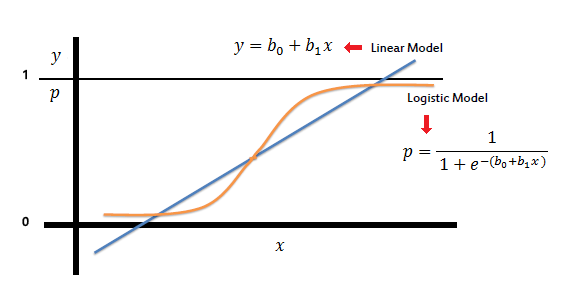

### 4.1.1 Initial Model <a class="anchor"  id="model_logreg_initial"></a>

In [126]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

model_logreg = LogisticRegression(C=0.1, 
                            penalty='l2', 
                            verbose=0, 
                            solver='liblinear', 
                            max_iter=5)

model_logreg.fit(X_train, y_train_encoded)

# Predictions
y_pred_train = model_logreg.predict(X_train)
y_pred_test = model_logreg.predict(X_test)

### 4.1.2 Model Evaluation <a class="anchor"  id="model_logreg_eval"></a>

Logistic Regression Model Evaluation:

Accuracy rate on the training set: 0.9008403361344538
Accuracy rate on the test set:
 0.9161073825503355

The area under the ROC curve is: 0.9440841194968553
The error on the test set is:
 0.08389261744966443

Accuracy is: 0.9161073825503355
Sensitivity (TPR) is: 0.7924528301886793

Classification report

               precision    recall  f1-score   support

           0       0.90      0.98      0.94       192
           1       0.97      0.79      0.87       106

    accuracy                           0.92       298
   macro avg       0.93      0.89      0.90       298
weighted avg       0.92      0.92      0.91       298


Confusion matrix

 [[189   3]
 [ 22  84]]


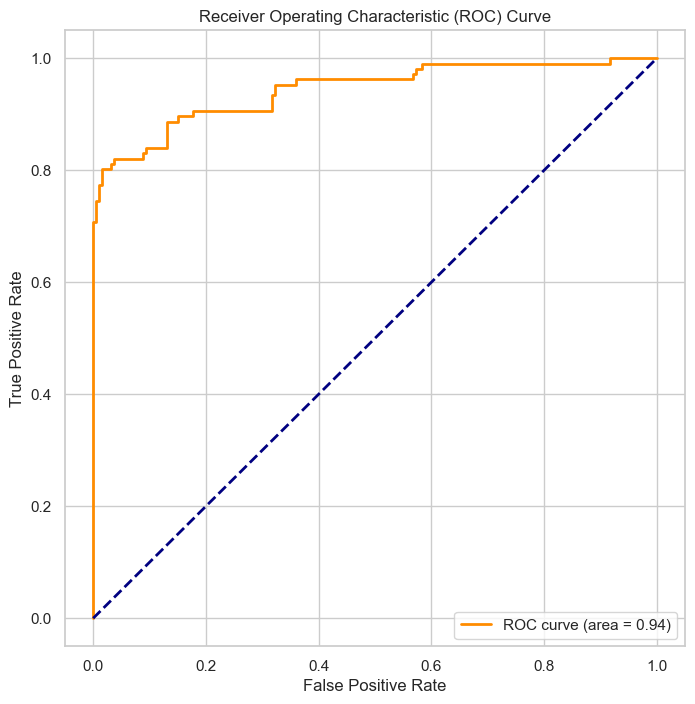

In [127]:
print("Logistic Regression Model Evaluation:\n")
print("Accuracy rate on the training set:", metrics.accuracy_score(y_train_encoded, y_pred_train))
print("Accuracy rate on the test set:\n", metrics.accuracy_score(y_test_encoded, y_pred_test))

# Metrics
lda_acc = accuracy_score(y_test_encoded, y_pred_test)
cm_lda = confusion_matrix(y_test_encoded, y_pred_test)
tpr_lda = cm_lda[1][1] / (cm_lda[1][0] + cm_lda[1][1])
TestError = np.mean(y_test_encoded != y_pred_test)

# ROC Curve and AUC
y_prob = model_logreg.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8, 8))

plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='darkorange', 
         lw=2, 
         label='ROC curve (area = {:.2f})'.format(roc_auc))

print("\nThe area under the ROC curve is:", roc_auc)
print("The error on the test set is:\n", TestError)
print('\nAccuracy is:', lda_acc)
print('Sensitivity (TPR) is:', tpr_lda)
print('\nClassification report\n\n', classification_report(y_test_encoded, y_pred_test))
print('\nConfusion matrix\n\n', metrics.confusion_matrix(y_test_encoded, y_pred_test))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>
    
- The logistic regression model demonstrates promising performance on both the training and test sets. However, to achieve even better results, we are going to proceed to an optimisation of this initial model. The results of the optimised model will be analysed in detail.

</div>

### 4.1.3 Model Optimisation <a class="anchor"  id="model_logreg_optim"></a>

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(LogisticRegression(), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=3), 
                           scoring='accuracy')

grid_search.fit(X_train, y_train_encoded)

best_params = grid_search.best_params_
best_params

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

### 4.1.4 Optimised Model <a class="anchor"  id="model_logreg_final"></a>

In [131]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

model_logreg2 = LogisticRegression(C=10, 
                            penalty='l2', 
                            verbose=5, 
                            solver='lbfgs', 
                            max_iter=100)
model_logreg2.fit(X_train, y_train_encoded)

# Predictions
y_pred_train = model_logreg2.predict(X_train)
y_pred_test = model_logreg2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


### 4.1.4 Evaluation of the Optimised Model <a class="anchor"  id="model_logreg_final_eval"></a>

Optimised Logistic Regression Model Evaluation:

Accuracy rate on the training set: 0.9932773109243698
Accuracy rate on the test set:
 0.9932885906040269

The AUC is: 1.0
The error on the test set is:
 0.006711409395973154

Accuracy = 0.9932885906040269
Sensitivity (TPR) = 0.9245283018867925

Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       192
           1       1.00      0.98      0.99       106

    accuracy                           0.99       298
   macro avg       0.99      0.99      0.99       298
weighted avg       0.99      0.99      0.99       298


Confusion matrix:

 [[192   0]
 [  2 104]]


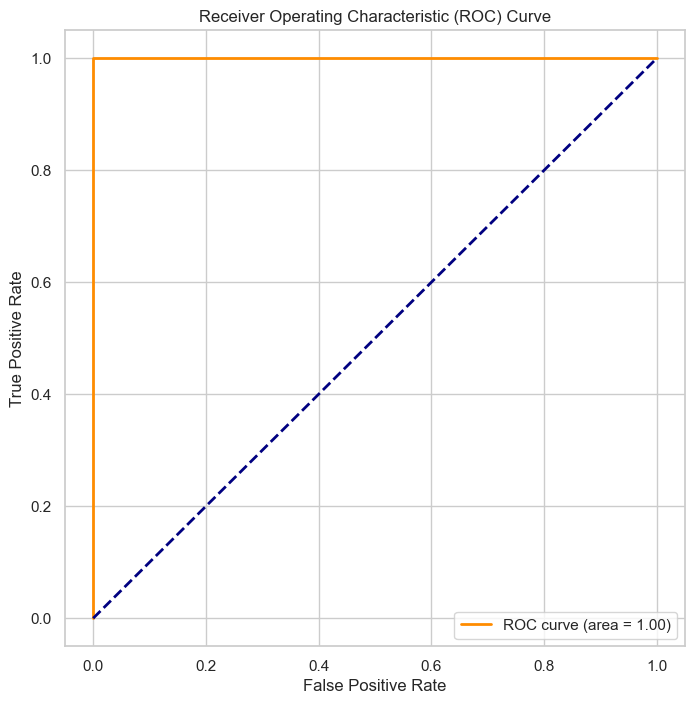

In [132]:
print("Optimised Logistic Regression Model Evaluation:\n")
print("Accuracy rate on the training set:", metrics.accuracy_score(y_train_encoded, y_pred_train))
print("Accuracy rate on the test set:\n", metrics.accuracy_score(y_test_encoded, y_pred_test))

# Metrics
optimised_logreg_acc  = accuracy_score(y_test_encoded, y_pred_test)
optimised_logreg_cm = confusion_matrix(y_test_encoded, y_pred_test)
optimised_logreg_recall = optimised_logreg_cm[1][1] / (optimised_logreg_cm[1][0] + optimised_logreg_cm[1][1])
TestError = np.mean(y_test_encoded != y_pred_test)

print("\nThe AUC is:", roc_auc)
print("The error on the test set is:\n", TestError)
print('\nAccuracy =', optimised_logreg_acc)
print('Sensitivity (TPR) =', optimised_logreg_tpr)
print('\nClassification report:\n\n', classification_report(y_test_encoded, y_pred_test))
print('\nConfusion matrix:\n\n', metrics.confusion_matrix(y_test_encoded, y_pred_test))

# ROC Curve and AUC
y_prob = model_logreg2.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='darkorange', 
         lw=2, 
         label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [133]:
model_logreg2_coeffs = pd.DataFrame(np.concatenate([model_logreg2.intercept_.reshape(-1,1),
                             model_logreg2.coef_],axis=1),
                              index = ["Coefficient"],
                              columns = ["Intercept"]+list(X_train.columns)).T
lr_def2_coeffs_sorted = model_logreg2_coeffs.sort_values(by="Coefficient", ascending=False)

model_logreg2_coeffs.head(30)

Coefficient
Intercept                          0.854925
country_Albania                    1.488345
country_Algeria                   -0.340967
country_Angola                     0.129087
country_Anguilla                  -0.851832
country_Antigua and Barbuda       -1.232430
country_Argentina                 -0.502015
country_Armenia                    1.751001
country_Aruba                     -0.113628
country_Australia                 -0.161972
country_Austria                   -0.154566
country_Azerbaijan                -0.800222
country_Bahamas, The              -0.771635
country_Bahrain                   -0.981420
country_Bangladesh                 2.435854
country_Barbados                  -1.114709
country_Belarus                   -0.072100
country_Belgium                   -0.282446
country_Belize                     0.100078
country_Benin                      0.044811
country_Bermuda                   -0.507128
country_Bhutan                     3.144796
country_Bolivia                   -4.262147
country_Bonaire                   -1.155417
country_Bosnia and Herzegovina    -0.305812
country_Botswana                   4.756429
country_Brazil                    -0.224000
country_British Virgin Islands    -1.238214
country_Brunei Darussalam         -1.311671
country_Bulgaria                  -0.376321

In [134]:
lr_def2_coeffs_sorted.head(30)

Coefficient
country_Guyana                          6.100476
country_WORLD                           5.467703
country_Tajikistan                      4.945516
country_Kyrgyz Republic                 4.804847
country_Botswana                        4.756429
country_Indonesia                       4.508082
country_Cabo Verde                      4.349958
country_Mongolia                        4.348021
country_Senegal                         4.258609
country_Egypt, Arab Rep.                4.135586
country_Zimbabwe                        3.814598
country_South Asia                      3.448173
country_Myanmar                         3.350139
per_notaff_calories_More than 6.93%     3.326263
country_Jamaica                         3.237392
country_Bhutan                          3.144796
country_Djibouti                        3.137345
country_Bangladesh                      2.435854
country_Mali                            2.435854
country_India                           2.188353
country_Lao PDR                         2.168420
country_Mauritania                      2.155055
country_Burkina Faso                    2.130609
country_Philippines                     2.110279
country_Fiji                            2.103685
country_Sri Lanka                       2.033906
country_Malawi                          1.836686
country_Pakistan                        1.821205
country_Armenia                         1.751001
country_Lower middle income             1.572847

In [135]:
lr_def2_coeffs_sorted.tail(30)

Coefficient
country_Togo                                       -1.244420
country_Sint Maarten (Dutch part)                  -1.275576
country_Comoros                                    -1.276345
country_West Bank and Gaza                         -1.287807
country_North America                              -1.290949
country_Brunei Darussalam                          -1.311671
country_Latin America & Caribbean                  -1.359850
country_El Salvador                                -1.418446
country_Korea, Rep.                                -1.468001
country_Israel                                     -1.519191
country_Panama                                     -1.521795
country_Montserrat                                 -1.596527
country_Dominican Republic                         -1.618795
country_Switzerland                                -1.625667
country_Italy                                      -1.728394
country_Iraq                                       -1.790022
country_Cambodia                                   -1.963791
country_Jordan                                     -2.162929
country_Trinidad and Tobago                        -2.163695
country_Colombia                                   -2.193491
country_Nicaragua                                  -2.200763
country_Hong Kong SAR, China                       -2.327314
country_Vietnam                                    -2.404453
country_United Arab Emirates                       -2.408125
country_Russian Federation                         -2.519483
country_TÃ¼rkiye                                   -2.701884
country_Saudi Arabia                               -2.867361
country_Kuwait                                     -2.886992
per_notaff_calories_Less than or equal to 6.93%    -3.324808
country_Bolivia                                    -4.262147

In [136]:
coefficients = np.concatenate([model_logreg2.intercept_.reshape(-1, 1), model_logreg2.coef_], axis=1)
feature_names = ["Intercept"] + list(X_train.columns)

table = pd.DataFrame(coefficients, index=["Coefficient"], columns=feature_names).T

table['Odds Ratio'] = np.exp(model_logreg2_coeffs['Coefficient'])
table['Exponential Function'] = "exp(" + model_logreg2_coeffs.index + " * " + str(round(model_logreg2_coeffs['Coefficient'][0], 4)) + ")"

intercept_prob = np.exp(model_logreg2_coeffs['Coefficient'][0]) / (1 + np.exp(model_logreg2_coeffs['Coefficient'][0]))
table.at['Intercept', 'Transformed Probability'] = intercept_prob

table['Transformed Probability'] = 1 / (1 + np.exp(-(model_logreg2_coeffs['Coefficient'])))

table.head(20)

Coefficient  Odds Ratio  \
Intercept                       0.854925    2.351198   
country_Albania                 1.488345    4.429756   
country_Algeria                -0.340967    0.711082   
country_Angola                  0.129087    1.137789   
country_Anguilla               -0.851832    0.426633   
country_Antigua and Barbuda    -1.232430    0.291583   
country_Argentina              -0.502015    0.605310   
country_Armenia                 1.751001    5.760365   
country_Aruba                  -0.113628    0.892590   
country_Australia              -0.161972    0.850465   
country_Austria                -0.154566    0.856787   
country_Azerbaijan             -0.800222    0.449229   
country_Bahamas, The           -0.771635    0.462257   
country_Bahrain                -0.981420    0.374778   
country_Bangladesh              2.435854   11.425570   
country_Barbados               -1.114709    0.328011   
country_Belarus                -0.072100    0.930438   
country_Belgium                -0.282446    0.753937   
country_Belize                  0.100078    1.105257   
country_Benin                   0.044811    1.045830   

                                                  Exponential Function  \
Intercept                                      exp(Intercept * 0.8549)   
country_Albania                          exp(country_Albania * 0.8549)   
country_Algeria                          exp(country_Algeria * 0.8549)   
country_Angola                            exp(country_Angola * 0.8549)   
country_Anguilla                        exp(country_Anguilla * 0.8549)   
country_Antigua and Barbuda  exp(country_Antigua and Barbuda * 0.8549)   
country_Argentina                      exp(country_Argentina * 0.8549)   
country_Armenia                          exp(country_Armenia * 0.8549)   
country_Aruba                              exp(country_Aruba * 0.8549)   
country_Australia                      exp(country_Australia * 0.8549)   
country_Austria                          exp(country_Austria * 0.8549)   
country_Azerbaijan                    exp(country_Azerbaijan * 0.8549)   
country_Bahamas, The                exp(country_Bahamas, The * 0.8549)   
country_Bahrain                          exp(country_Bahrain * 0.8549)   
country_Bangladesh                    exp(country_Bangladesh * 0.8549)   
country_Barbados                        exp(country_Barbados * 0.8549)   
country_Belarus                          exp(country_Belarus * 0.8549)   
country_Belgium                          exp(country_Belgium * 0.8549)   
country_Belize                            exp(country_Belize * 0.8549)   
country_Benin                              exp(country_Benin * 0.8549)   

                             Transformed Probability  
Intercept                                   0.701599  
country_Albania                             0.815830  
country_Algeria                             0.415575  
country_Angola                              0.532227  
country_Anguilla                            0.299049  
country_Antigua and Barbuda                 0.225756  
country_Argentina                           0.377067  
country_Armenia                             0.852079  
country_Aruba                               0.471624  
country_Australia                           0.459595  
country_Austria                             0.461435  
country_Azerbaijan                          0.309978  
country_Bahamas, The                        0.316126  
country_Bahrain                             0.272610  
country_Bangladesh                          0.919521  
country_Barbados                            0.246994  
country_Belarus                             0.481983  
country_Belgium                             0.429854  
country_Belize                              0.524999  
country_Benin                               0.511201

In [137]:
table.tail(20)

Coefficient  Odds Ratio  \
pop_cat_Less than or equal to 10057698             -0.207547    0.812575   
pop_cat_More than 10057698                          0.209001    1.232447   
per_notaff_calories_Less than or equal to 6.93%    -3.324808    0.035979   
per_notaff_calories_More than 6.93%                 3.326263   27.834137   
cost_of_healthy_Less than or equal to 0.0396       -0.559254    0.571635   
cost_of_healthy_More than 0.0396                    0.560709    1.751914   
cost_lns_healthy_Less than or equal to 0.1046       1.070683    2.917371   
cost_lns_healthy_More than 0.1046                  -1.069228    0.343273   
cost_asf_healthy_Less than or equal to 0.2658      -0.742855    0.475754   
cost_asf_healthy_More than 0.2658                   0.744309    2.104987   
cost_ss_healthy_Less than or equal to 0.1521        0.435144    1.545186   
cost_ss_healthy_More than 0.1521                   -0.433689    0.648114   
cost_v_healthy_Less than or equal to 0.2373         0.039356    1.040141   
cost_v_healthy_More than 0.2373                    -0.037901    0.962808   
cost_f_healthy_Less than or equal to 0.1992         0.128137    1.136708   
cost_f_healthy_More than 0.1992                    -0.126682    0.881014   
cost_healthy_Less than or equal to 3.31            -0.247751    0.780554   
cost_healthy_More than 3.31                         0.249206    1.283006   
cost_nutrient_Less than or equal to 2.45           -0.154452    0.856884   
cost_nutrient_More than 2.45                        0.155907    1.168718   

                                                                              Exponential Function  \
pop_cat_Less than or equal to 10057698           exp(pop_cat_Less than or equal to 10057698 * 0...   
pop_cat_More than 10057698                                exp(pop_cat_More than 10057698 * 0.8549)   
per_notaff_calories_Less than or equal to 6.93%  exp(per_notaff_calories_Less than or equal to ...   
per_notaff_calories_More than 6.93%              exp(per_notaff_calories_More than 6.93% * 0.8549)   
cost_of_healthy_Less than or equal to 0.0396     exp(cost_of_healthy_Less than or equal to 0.03...   
cost_of_healthy_More than 0.0396                    exp(cost_of_healthy_More than 0.0396 * 0.8549)   
cost_lns_healthy_Less than or equal to 0.1046    exp(cost_lns_healthy_Less than or equal to 0.1...   
cost_lns_healthy_More than 0.1046                  exp(cost_lns_healthy_More than 0.1046 * 0.8549)   
cost_asf_healthy_Less than or equal to 0.2658    exp(cost_asf_healthy_Less than or equal to 0.2...   
cost_asf_healthy_More than 0.2658                  exp(cost_asf_healthy_More than 0.2658 * 0.8549)   
cost_ss_healthy_Less than or equal to 0.1521     exp(cost_ss_healthy_Less than or equal to 0.15...   
cost_ss_healthy_More than 0.1521                    exp(cost_ss_healthy_More than 0.1521 * 0.8549)   
cost_v_healthy_Less than or equal to 0.2373      exp(cost_v_healthy_Less than or equal to 0.237...   
cost_v_healthy_More than 0.2373                      exp(cost_v_healthy_More than 0.2373 * 0.8549)   
cost_f_healthy_Less than or equal to 0.1992      exp(cost_f_healthy_Less than or equal to 0.199...   
cost_f_healthy_More than 0.1992                      exp(cost_f_healthy_More than 0.1992 * 0.8549)   
cost_healthy_Less than or equal to 3.31          exp(cost_healthy_Less than or equal to 3.31 * ...   
cost_healthy_More than 3.31                              exp(cost_healthy_More than 3.31 * 0.8549)   
cost_nutrient_Less than or equal to 2.45         exp(cost_nutrient_Less than or equal to 2.45 *...   
cost_nutrient_More than 2.45                            exp(cost_nutrient_More than 2.45 * 0.8549)   

                                                 Transformed Probability  
pop_cat_Less than or equal to 10057698                          0.448299  
pop_cat_More than 10057698                                      0.552061  
per_notaff_calories_Less than or equal to 6.93%                 0.034730  
per_notaf

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>
 
- The optimised model exhibits exceptional performance on both the training and test sets. The **accuracy rate** on the training set is notably high at 99.33%, demonstrating the model's ability to accurately classify instances within the training dataset. This high accuracy extends to the test set, where the model achieves a similar accuracy rate of 99.33%, indicating a theoretically robust generalization to new, unseen data.

- The **Area Under the Curve (AUC)** is a perfect 1.0, emphasizing the model's flawless discrimination between positive and negative classes. The low error rate on the test set (0.67%) further attests to the model's exceptional performance in minimizing misclassifications.

- The **precision** and **recall** metrics indicate outstanding performance, with precision values of 99% and 100% for classes 0 ('Less than or equal to 37.42%' and 1 ('More than 37.42%', respectively. Recall values, or sensitivity (TPR), are 100% for class 0 and 92.45% for class 1, demonstrating the model's ability to accurately capture a high percentage of actual positive instances.

- The **classification report** provides a comprehensive overview of the model's performance, showcasing high F1-scores of 99% for both classes. The macro average and weighted average metrics further highlight the balanced performance across both classes.

- The **confusion matrix** reinforces the model's excellent performance, revealing that the model correctly predicts all instances of class 0 and accurately identifies 104 instances of class 1, with only 2 false positive predictions. Overall, the optimised logistic regression model demonstrates exceptional predictive accuracy and robustness in handling imbalanced classes.
    
- However, although the outcomes of this optimised model appear exceptional, there is a concern that they **might be suggestive of overfitting**, which is an undesirable scenario. Consequently, we will proceed to implement alternative models and evaluate them, to ensure robust and generalizable performance.
    
</div>

## 4.2 Model 2 - Decision Trees <a class="anchor"  id="model_dectree"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>
        
A decision tree is a decision support tool representing a set of choices in the graphic form of a tree. The different possible decisions are located at the ends of the branches (the “leaves” of the tree), and are reached based on decisions made at each stage. The decision tree is a tool used in various fields such as security, data mining, medicine, etc. In our case, we will use it as a prediction model (supervised learning).
    
</div>

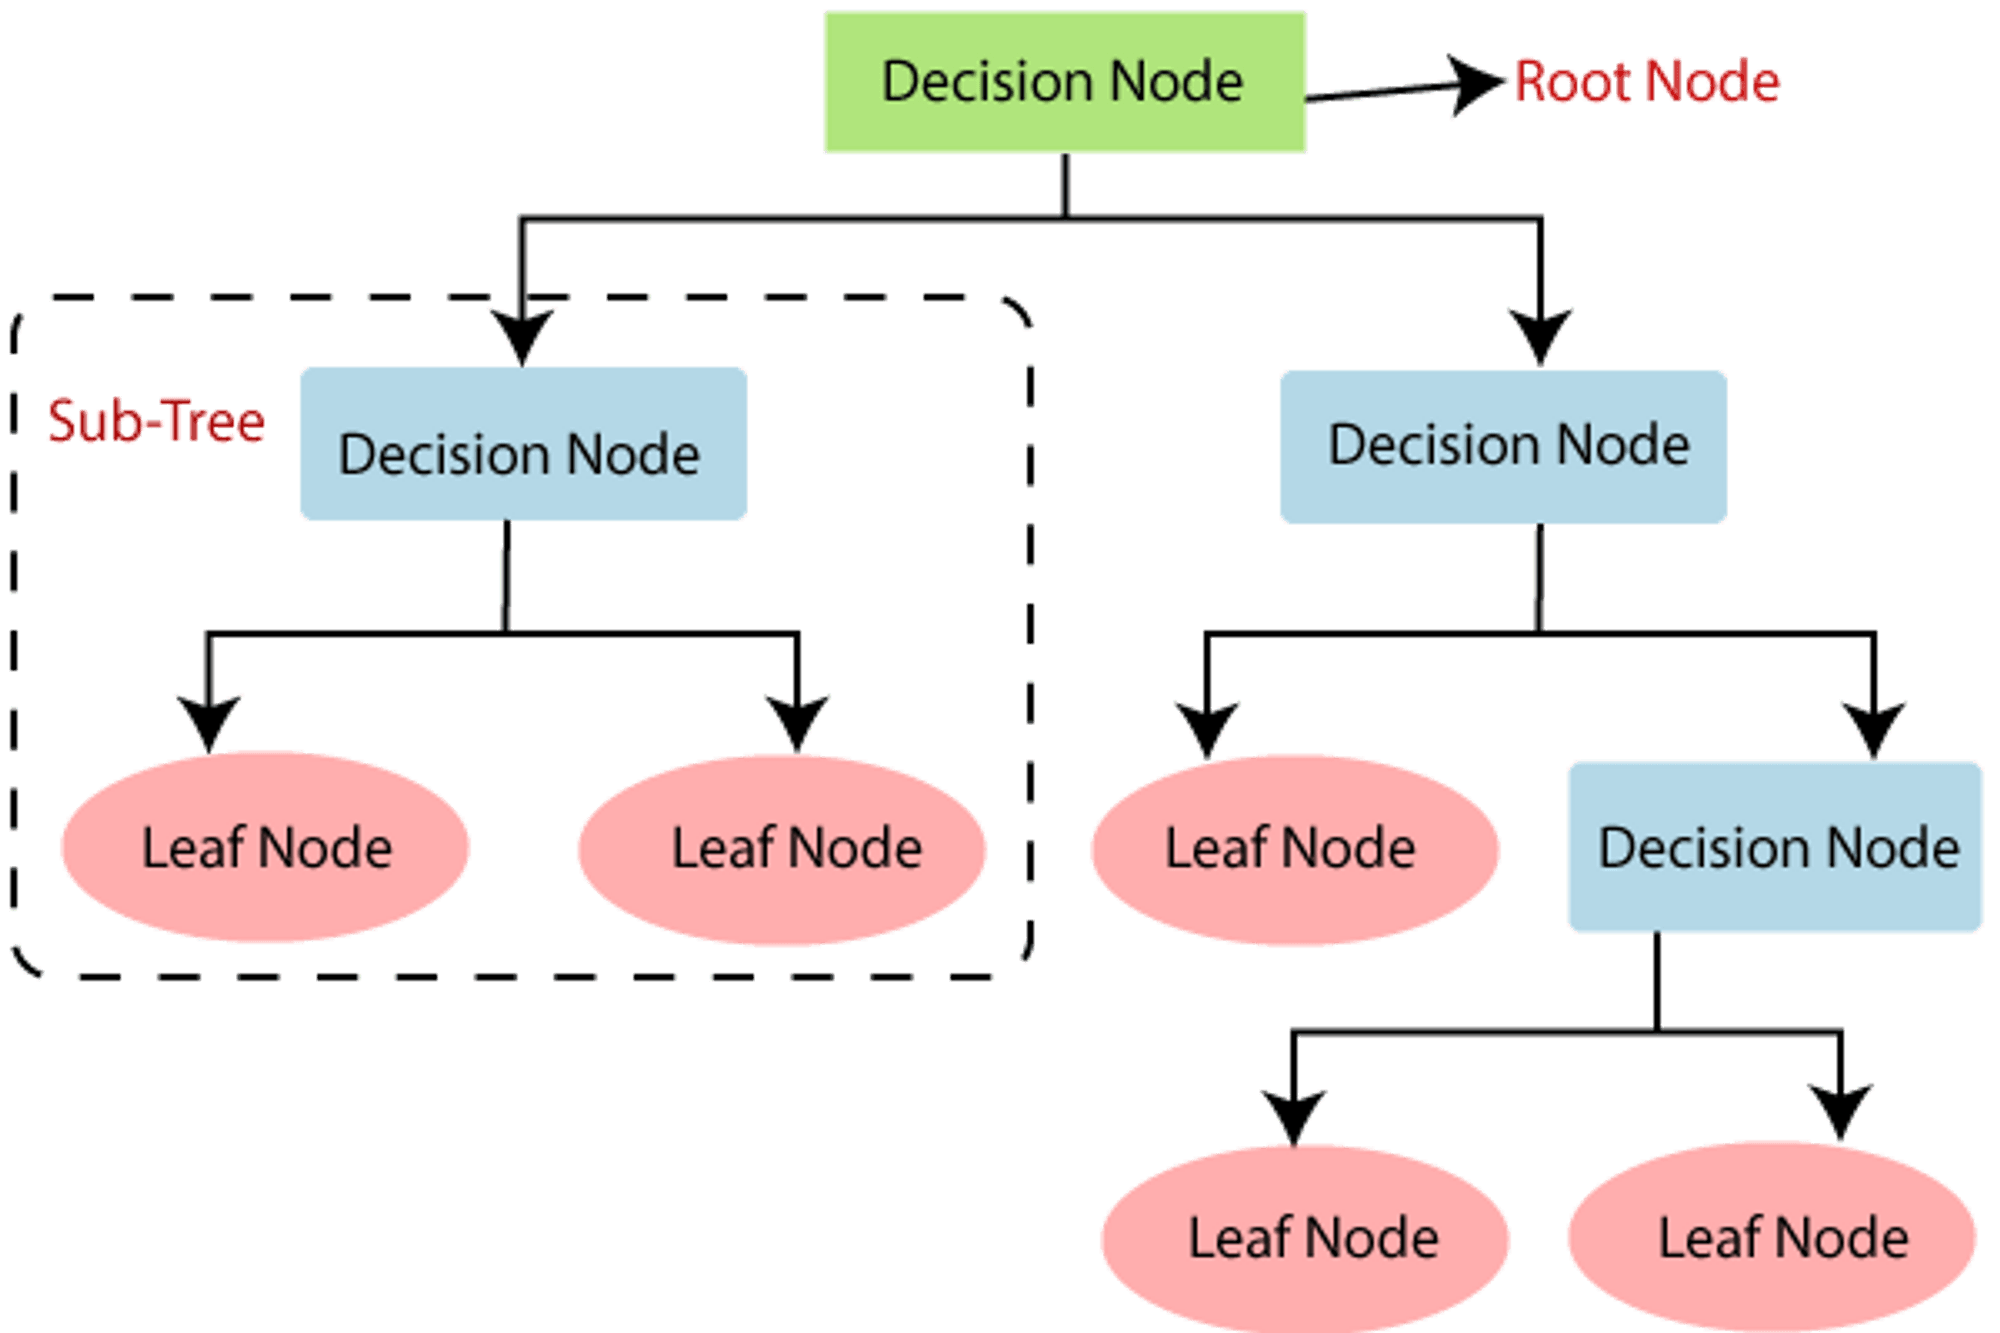

### 4.2.1 Initial Model <a class="anchor"  id="model_dectree_initial"></a>

In [56]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

model_dtree = DecisionTreeClassifier(max_depth=3, 
                               min_samples_split=5, 
                               min_samples_leaf=2) # => AUC : 0.8816

model_dtree.fit(X_train, y_train)

y_pred = model_dtree.predict(X_test)

### 4.2.2 Model Evaluation <a class="anchor"  id="model_dectree_eval"></a>

Decision Trees Model Evaluation:

Classification Report:

                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.17      0.08      0.11       192
            More than 37.42%       0.15      0.30      0.20       106

                    accuracy                           0.16       298
                   macro avg       0.16      0.19      0.15       298
                weighted avg       0.16      0.16      0.14       298

Confusion Matrix:

[[ 15 177]
 [ 74  32]]

Accuracy: 0.1577
Precision: 0.1531
Recall: 0.3019
F1 Score: 0.2032


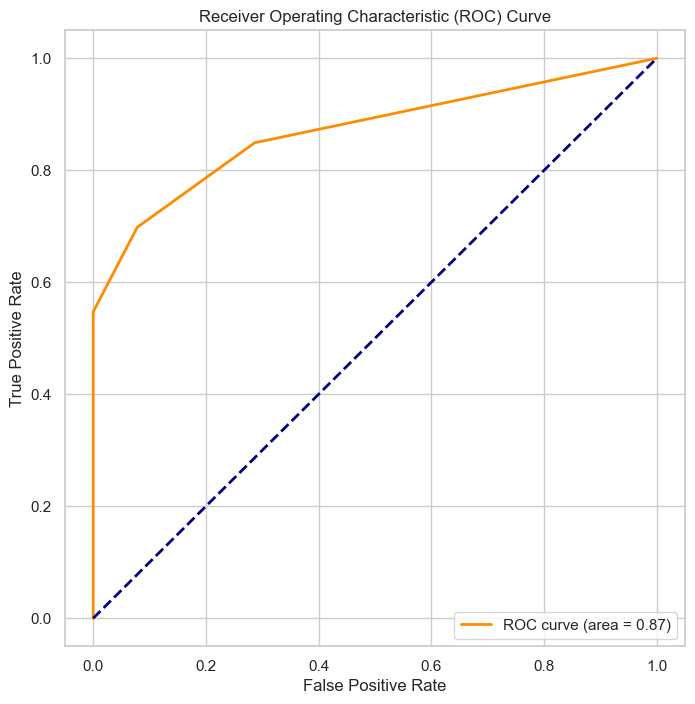

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


y_prob = model_dtree.predict_proba(X_test)[:, 1]
y_pred_labels = np.where(y_prob > 0.5, 'Less than or equal to 37.42%', 'More than 37.42%')

print("Decision Trees Model Evaluation:\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_labels))

accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, pos_label='More than 37.42%', average='binary')
recall = recall_score(y_test, y_pred_labels, pos_label='More than 37.42%', average='binary')
f1 = f1_score(y_test, y_pred_labels, pos_label='More than 37.42%', average='binary')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve and AUC
y_prob = model_dtree.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='darkorange', 
         lw=2, 
         label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 4.2.3 Model Optimisation <a class="anchor"  id="model_dectree_optim"></a>

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.tree import plot_tree

param_grid = {
    'max_depth': range(1, 21),
    'max_leaf_nodes': range(10, 200, 10),
    'min_samples_split': range(5, 10)
}

model_dtree2 = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(model_dtree2, 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=5, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

best_dtree = grid_search.best_estimator_
best_dtree.fit(X_train, y_train)

y_pred = best_dtree.predict(X_test)

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits
Best hyperparameters:  {'max_depth': 11, 'max_leaf_nodes': 30, 'min_samples_split': 5}


<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>
    
- The GridSearchCV algorithm was employed to **optimize the hyperparameters** for the decision tree model. The optimal hyperparameters identified for the decision tree model are {'max_depth': 11, 'max_leaf_nodes': 30, 'min_samples_split': 5}. These parameters represent the configuration that yielded the highest performance based on the specified scoring metric during the cross-validation process, and will be used in our optimised model. Next, we will be tuning the 3 hyperparameters and we will visualise the results of the training and validation accuracies.

</div>

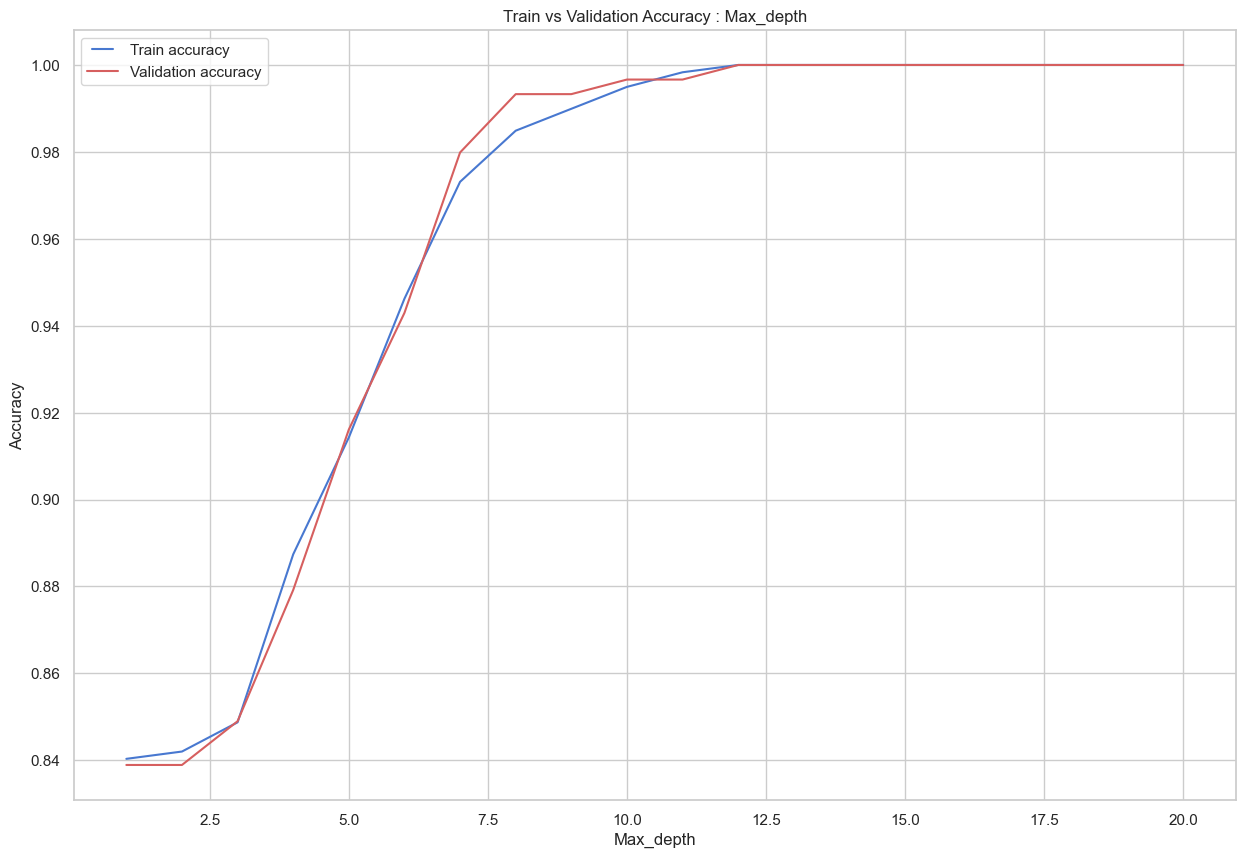

In [343]:
# Hyperparameter tuning for max_depth
train_acc1 = []
val_acc1 = []

for max_d in range(1,21):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    train_acc1.append(model.score(X_train, y_train))
    val_acc1.append(model.score(X_test,y_test))

line1, = plt.plot([*range(1,21)], train_acc1, 'b', label='Train accuracy')
line2, = plt.plot([*range(1,21)], val_acc1, 'r', label='Validation accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_depth')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.show()

train_acc1.clear()
val_acc1.clear()

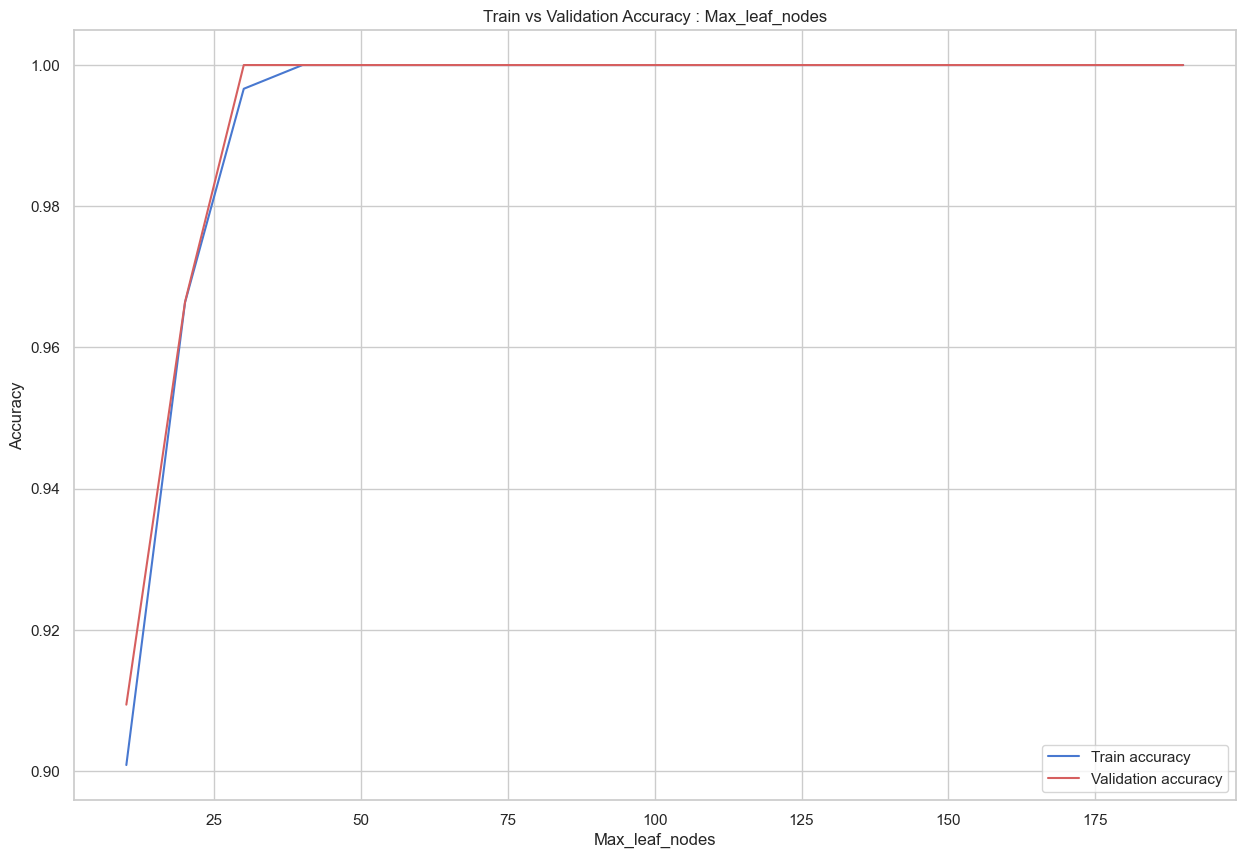

In [344]:
# Hyperparameter tuning for max_leaf_nodes
train_acc2 = []
val_acc2 = []

for max_ln in range(10,200,10):
    model2 = DecisionTreeClassifier(max_leaf_nodes=max_ln, random_state=42)
    model2.fit(X_train, y_train)
    train_acc2.append(model2.score(X_train, y_train))
    val_acc2.append(model2.score(X_test,y_test))


line3, = plt.plot([*range(10,200,10)], train_acc2, 'b', label='Train accuracy')
line4, = plt.plot([*range(10,200,10)], val_acc2, 'r', label='Validation accuracy')

plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_leaf_nodes')
plt.ylabel('Accuracy')
plt.xlabel('Max_leaf_nodes')
plt.show()

train_acc2.clear()
val_acc2.clear()

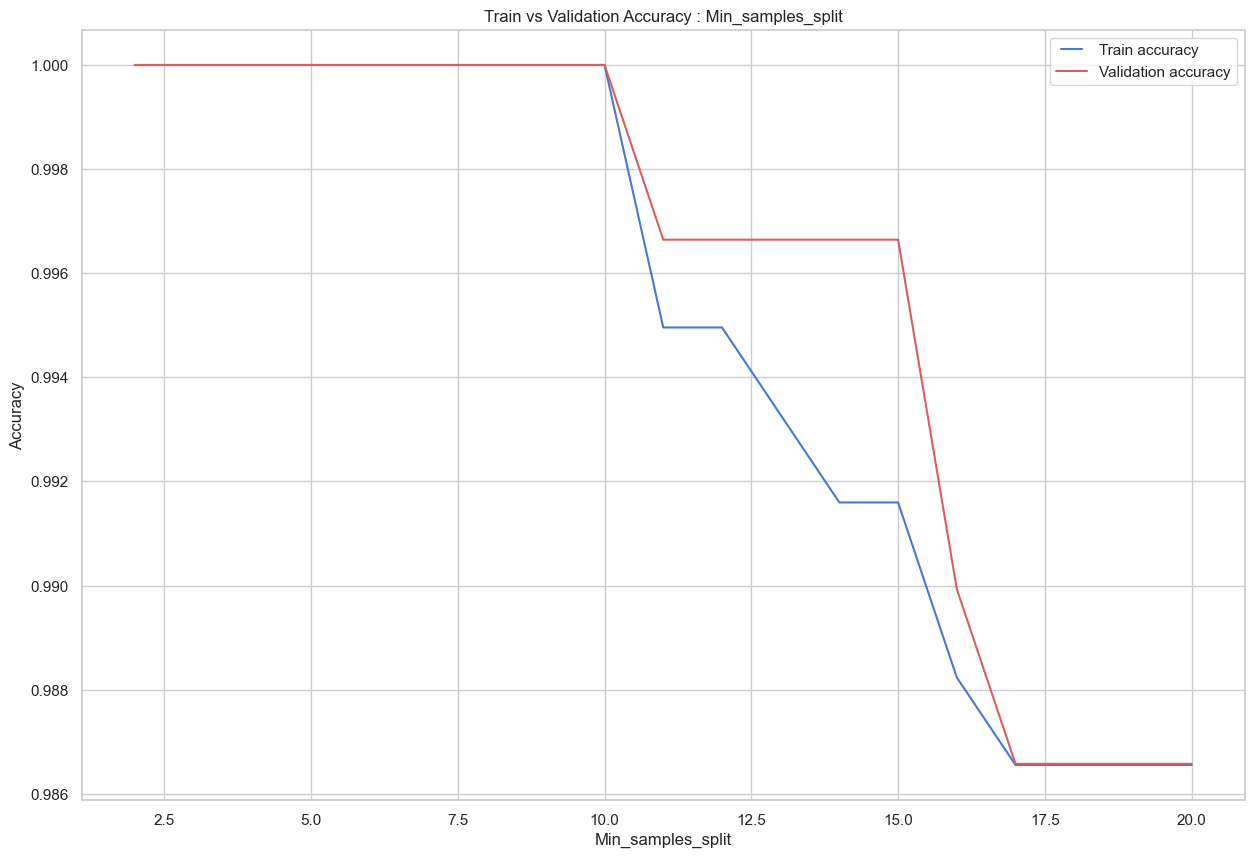

In [345]:
# Hyperparameter tuning for min_samples_split
min_samples_split_values = [*range(2, 21)]  # Adjust the range as needed

train_acc_split = []
val_acc_split = []

for min_split in min_samples_split_values:
    model_split = DecisionTreeClassifier(min_samples_split=min_split, random_state=42)
    model_split.fit(X_train, y_train)
    train_acc_split.append(model_split.score(X_train, y_train))
    val_acc_split.append(model_split.score(X_test, y_test))

# Plot the results
line5, = plt.plot(min_samples_split_values, train_acc_split, 'b', label='Train accuracy')
line6, = plt.plot(min_samples_split_values, val_acc_split, 'r', label='Validation accuracy')

plt.legend(handler_map={line5: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Min_samples_split')
plt.ylabel('Accuracy')
plt.xlabel('Min_samples_split')
plt.show()

# Clear lists for reuse
train_acc_split.clear()
val_acc_split.clear()

### 4.2.4 Optimised Model <a class="anchor"  id="model_dectree_final"></a>

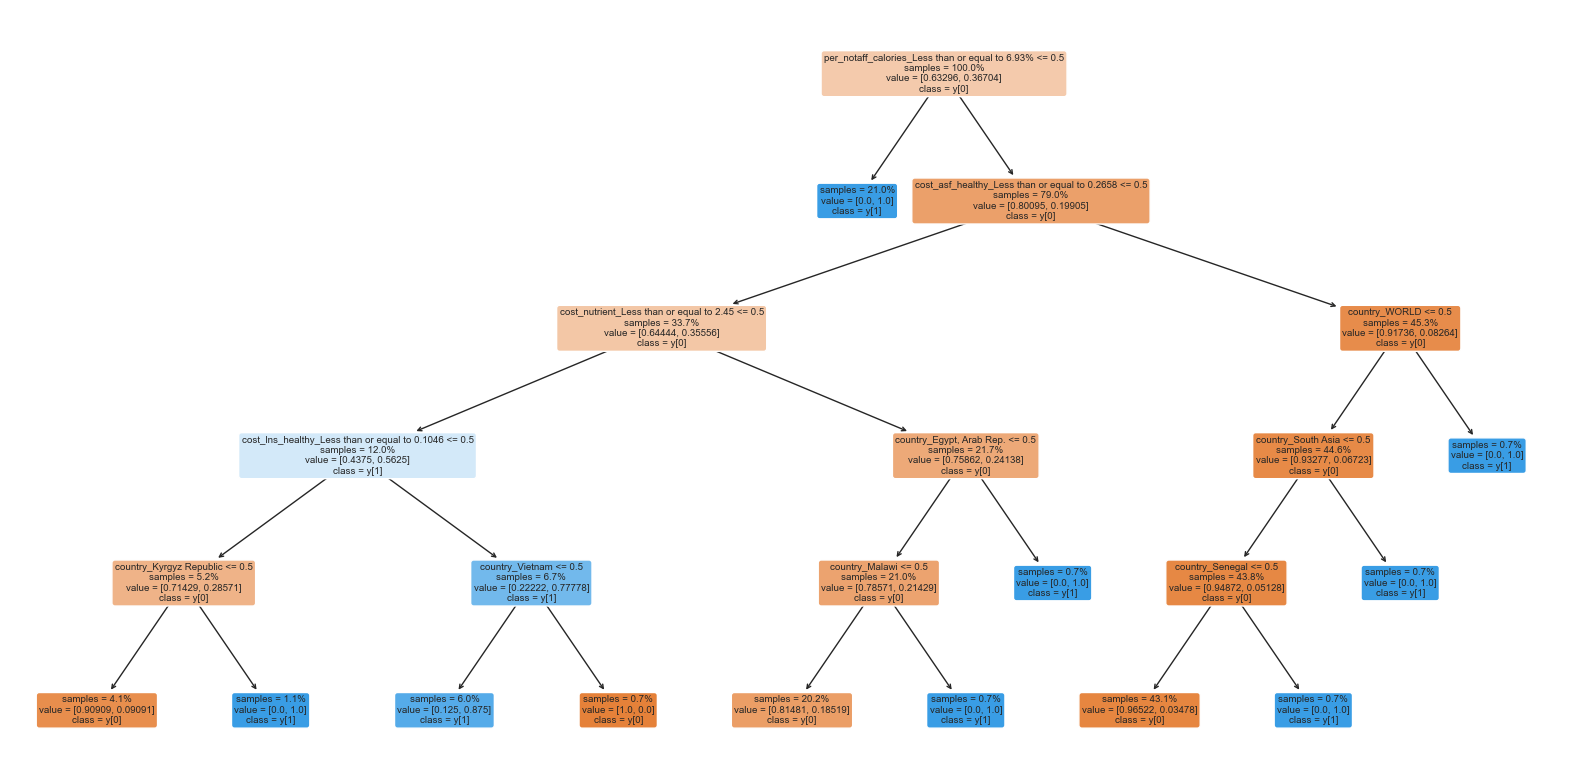

In [70]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Hyperparameters suggested above : 'max_depth': 11, 'max_leaf_nodes': 30, 'min_samples_split': 5
best_hyperparameters = {'max_depth': 5, 
                        'max_leaf_nodes': 30, 
                        'min_samples_split' : 5} 

optimised_dtree = DecisionTreeClassifier(
    max_depth=best_hyperparameters['max_depth'],
    max_leaf_nodes=best_hyperparameters['max_leaf_nodes'],
    min_samples_split=5,
    min_samples_leaf=2
)

optimised_dtree.fit(X_train, y_train)

y_pred_optimised = optimised_dtree.predict(X_test)

plt.figure(figsize=(16, 8))
plot_tree(optimised_dtree, 
          feature_names=X_train.columns, 
          class_names=True, 
          filled=True,
          rounded=True, 
          fontsize=7, 
          impurity=False, 
          precision=5, 
          proportion=True)
plt.rcParams['lines.markersize'] = 8
plt.tight_layout()
plt.savefig("decision_tree.png")
plt.show()

### 4.2.4 Evaluation of the Optimised Model <a class="anchor"  id="model_dectree_final_eval"></a>


Optimized Decision Trees Model Evaluation:

Classification Report:
                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.87      0.96      0.91       192
            More than 37.42%       0.91      0.74      0.81       106

                    accuracy                           0.88       298
                   macro avg       0.89      0.85      0.86       298
                weighted avg       0.88      0.88      0.88       298


Confusion Matrix:

[[184   8]
 [ 28  78]]

Accuracy: 0.8792
Precision: 0.9070
Recall: 0.7358
F1 Score: 0.8125


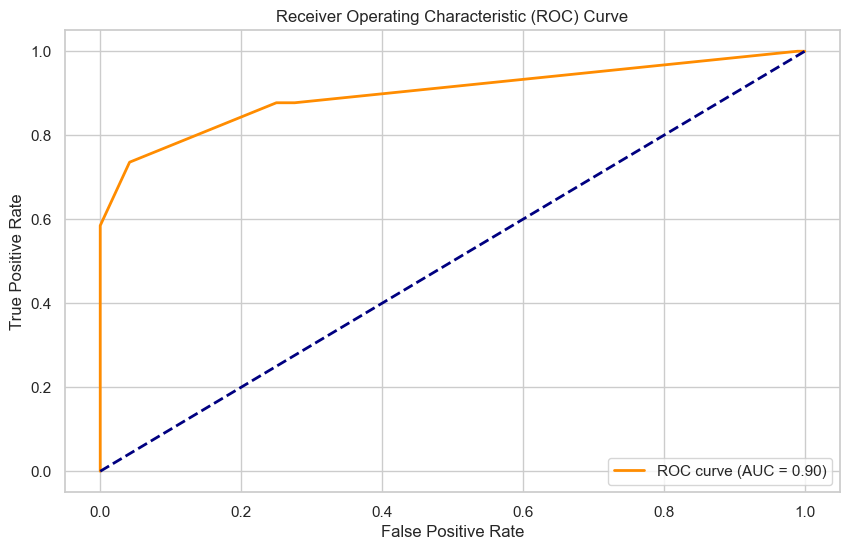

AUC: 0.8986


In [199]:
y_pred_optimized = optimised_dtree.predict(X_test)

y_prob_optimized = optimised_dtree.predict_proba(X_test)[:, 1]

pos_label_optimized = label_encoder.transform(['More than 37.42%'])[0]

false_positive_rate_optimized, true_positive_rate_optimized, thresholds_optimized = roc_curve(y_test_encoded, 
                                                                                              y_prob_optimized, 
                                                                                              pos_label=pos_label_optimized)
roc_auc_optimized = auc(false_positive_rate_optimized, true_positive_rate_optimized)


print("\nOptimized Decision Trees Model Evaluation:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_optimized))

optimised_dtree_acc  = accuracy_score(y_test, y_pred_optimized)
# optimised_dtree_cm  = confusion_matrix(y_test_encoded, y_pred_test)
optimised_dtree_precision = precision_score(y_test, y_pred_optimized, pos_label='More than 37.42%', average='binary')
optimised_dtree_recall = recall_score(y_test, y_pred_optimized, pos_label='More than 37.42%', average='binary')
optimised_dtree_f1 = f1_score(y_test, y_pred_optimized, pos_label='More than 37.42%', average='binary')
# optimised_dtree_tpr = optimised_dtree_cm[1][1] / (optimised_dtree_cm[1][0] + optimised_dtree_cm[1][1])

print(f"\nAccuracy: {optimised_dtree_acc :.4f}")
print(f"Precision: {optimised_dtree_precision:.4f}")
print(f"Recall: {optimised_dtree_recall:.4f}")
print(f"F1 Score: {optimised_dtree_f1:.4f}")
# print(f"Sensitivity (TPR): {optimised_dtree_tpr:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate_optimized, true_positive_rate_optimized, color='darkorange', lw=2, 
         label='ROC curve (AUC = {:.2f})'.format(roc_auc_optimized))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc_optimized:.4f}")

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

- The optimized decision tree model exhibited satisfactory performance, as indicated by the evaluation metrics. In terms of **precision**, the model achieved 87% for the class "Less than or equal to 37.42%" and 91% for "More than 37.42%". The **recall** values were 96% and 74% for these respective classes, emphasizing the model's ability to correctly identify instances of each class (4 out of 4 countries with a percentage of healthy diet unaffordability Less than or equal to 37.42% will be correctly identified, and 3 out of 4 countries with a percentage higher than 37.42 were correctly identified. The overall **accuracy** of the model was 88%.

- The **confusion matrix**revealed that the model correctly classified 184 instances of "Less than or equal to 37.42%" and 78 instances of "More than 37.42%", with 8 and 28 misclassifications, respectively.

- The **area under the ROC curve (AUC)** further supported the model's discriminative ability, yielding a value of 0.8986. This suggests that the model has a good balance between true positive rate and false positive rate, indicating effective discrimination between the two classes.  

- This model presents a distinct trade-off compared to the previously optimised logistic regression model. While the logistic regression model had a higher precision (90.7% for decision tree vs. 100% for logistic regression) and overall accuracy (87.92% for decision tree vs. 99.33% for logistic regression), the decision tree model is more sensitive to identifying individuals with "More than 37.42%" in the unaffordability of a healthy diet expenditures, potentially capturing more positive cases. Given that our goal is to avoid false negatives and capture as many instances of the positive class as possible, the decision tree might be the preferred choice. Nevertheless, given that it is less precise overall, it has a higher likelihood of misclassifying instances. We are therefore going to implement and evaluate more models.    
    
</div>

## 4.3 Model 3 - Random Forest <a class="anchor"  id="model_rf"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>
        
The random forest is an essential algorithm in machine learning. Random forest means “random forest”. It is an algorithm based on the assembly of decision trees. It is quite intuitive to understand, quick to train and it produces generalizable results. The only downside is that the random forest is a black box which gives results that are difficult to read, that is to say, not very explanatory.
    
</div>

Illustrative diagram :

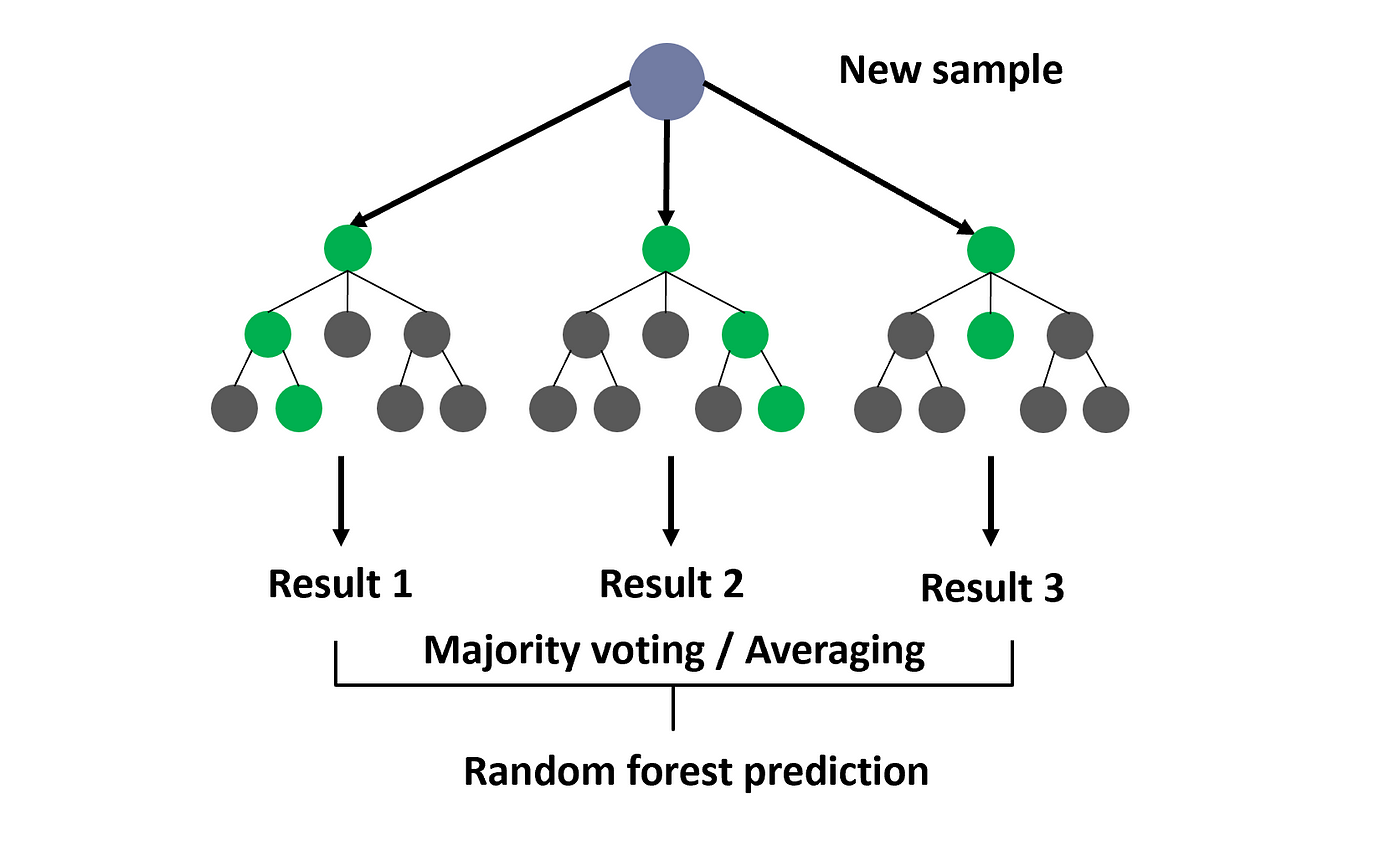

### 4.3.1 Initial Model <a class="anchor"  id="model_rf_initial"></a>

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_rf = RandomForestClassifier(
    n_estimators=3,             # Number of trees in the forest
    max_depth=None,             # Maximum depth of the tree
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=1,         # Minimum number of samples required to be at a leaf node
    max_features='auto',        # Number of features to consider when looking for the best split
    bootstrap=True,             # Whether bootstrap samples are used when building trees
    random_state=0,             # Seed for random number generation
    n_jobs=-1                   # Number of jobs to run in parallel (set to -1 to use all available processors)
)

model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_val = model_rf.predict(X_val)

### 4.3.2 Model Evaluation <a class="anchor"  id="model_rf_eval"></a>

Random Forest Model Evaluation:
Classification Report:
                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.87      0.94      0.90       115
            More than 37.42%       0.87      0.75      0.81        64

                    accuracy                           0.87       179
                   macro avg       0.87      0.84      0.86       179
                weighted avg       0.87      0.87      0.87       179

Confusion Matrix:
[[108   7]
 [ 16  48]]
Accuracy: 0.8715
Precision: 0.8727
Recall: 0.7500
F1 Score: 0.8067


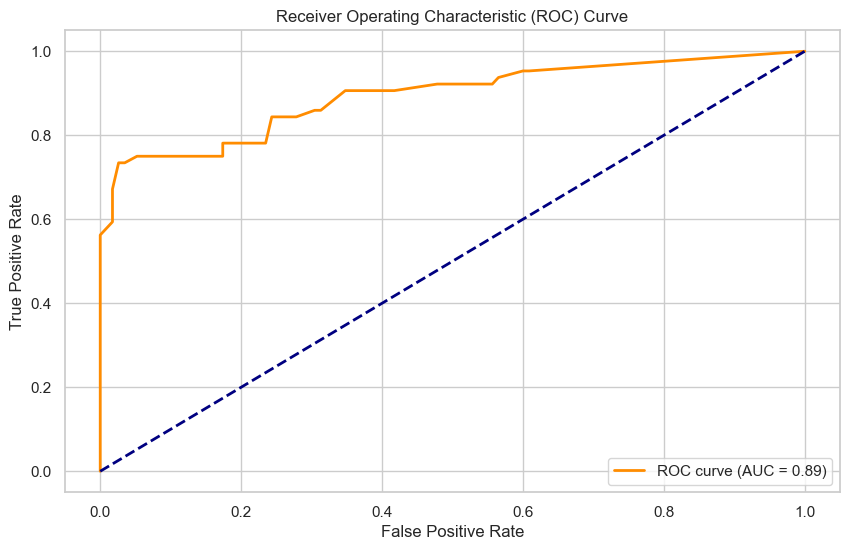

AUC: 0.8933


In [80]:
from sklearn.preprocessing import LabelEncoder

print("Random Forest Model Evaluation:")
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

# Additional metrics for binary classification
accuracy_forest = accuracy_score(y_val, y_pred_val)
precision_forest = precision_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')
recall_forest = recall_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')
f1_forest = f1_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')

print(f"Accuracy: {accuracy_forest:.4f}")
print(f"Precision: {precision_forest:.4f}")
print(f"Recall: {recall_forest:.4f}")
print(f"F1 Score: {f1_forest:.4f}")

# ROC Curve and AUC for binary classification
y_prob_forest = model_rf.predict_proba(X_val)[:, 1]

# Specify pos_label based on your positive class
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

positive_class = 'More than 37.42%'
pos_label_forest = label_encoder.transform([positive_class])[0]
# Assuming you have a LabelEncoder instance named label_encoder
y_val_encoded = label_encoder.transform(y_val)

false_positive_rate_forest, true_positive_rate_forest, thresholds_forest = roc_curve(y_val_encoded, 
                                                                                     y_prob_forest, 
                                                                                     pos_label=pos_label_forest)
roc_auc_forest = auc(false_positive_rate_forest, true_positive_rate_forest)

plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate_forest, true_positive_rate_forest, color='darkorange', lw=2, 
         label='ROC curve (AUC = {:.2f})'.format(roc_auc_forest))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc_forest:.4f}")

### 4.3.3 Model Optimisation <a class="anchor"  id="model_rf_optim"></a>

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

model_rf2 = RandomForestClassifier(random_state=1, n_jobs=-1)

grid_search = GridSearchCV(model_rf2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_forest = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Forest:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Forest: RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       n_estimators=50, n_jobs=-1, random_state=1)


### 4.3.4 Optimised Model <a class="anchor"  id="model_rf_final"></a>

In [83]:
# Optimised Random Forest model with suggested parameters
optimised_rf = RandomForestClassifier(
    n_estimators=50,            
    max_depth=20,             
    min_samples_split=2,        
    min_samples_leaf=1,         
    max_features='auto',        
    bootstrap=False,            
    random_state=1,             
    n_jobs=-1                  
)

optimised_rf.fit(X_train, y_train)

y_pred_train_optimised = optimised_rf.predict(X_train)
y_pred_val_optimised = optimised_rf.predict(X_val)

### 4.3.4 Evaluation of the Optimised Model <a class="anchor"  id="model_rf_final_eval"></a>

Optimized Random Forest Model Evaluation:

Classification Report:

                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.96      0.96      0.96       115
            More than 37.42%       0.92      0.94      0.93        64

                    accuracy                           0.95       179
                   macro avg       0.94      0.95      0.95       179
                weighted avg       0.95      0.95      0.95       179

Confusion Matrix:

[[110   5]
 [  4  60]]

Accuracy: 0.9497
Precision: 0.9231
Recall: 0.9375
F1 Score: 0.9302
Sensitivity (TPR): 0.9245


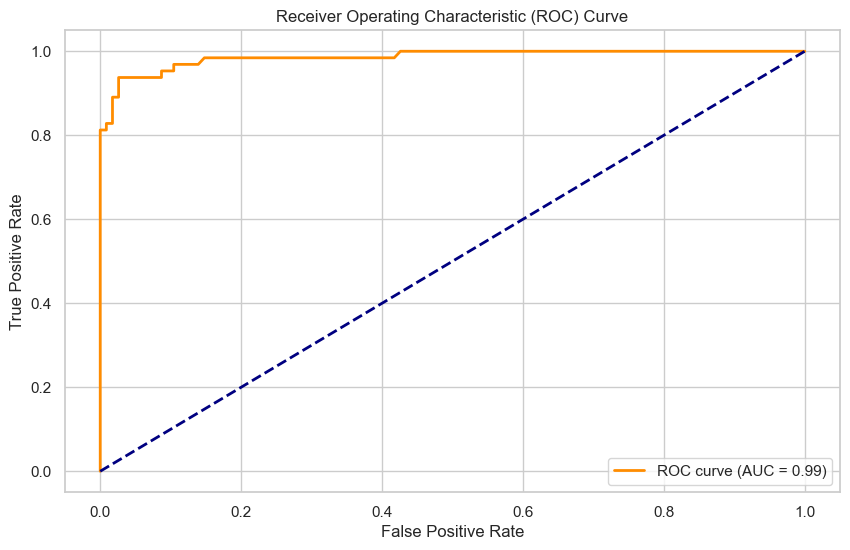

AUC: 0.9857


In [85]:
print("Optimized Random Forest Model Evaluation:\n")
print("Classification Report:\n")
print(classification_report(y_val, y_pred_val_optimised))

print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_pred_val_optimised))

optimised_rf_acc = accuracy_score(y_val, y_pred_val_optimised)
optimised_rf_cm = confusion_matrix(y_test_encoded, y_pred_test)
optimised_rf_precision = precision_score(y_val, y_pred_val_optimised, pos_label='More than 37.42%', average='binary')
optimised_rf_recall = recall_score(y_val, y_pred_val_optimised, pos_label='More than 37.42%', average='binary')
optimised_rf_f1 = f1_score(y_val, y_pred_val_optimised, pos_label='More than 37.42%', average='binary')
optimised_rf_tpr = optimised_rf_cm[1][1] / (optimised_rf_cm[1][0] + optimised_rf_cm[1][1])

print(f"\nAccuracy: {optimised_rf_acc:.4f}")
print(f"Precision: {optimised_rf_precision:.4f}")
print(f"Recall: {optimised_rf_recall:.4f}")
print(f"F1 Score: {optimised_rf_f1:.4f}")
print(f"Sensitivity (TPR): {optimised_rf_tpr:.4f}")


y_prob_forest_optimised = optimised_rf.predict_proba(X_val)[:, 1]

pos_label_forest_optimised = label_encoder.transform(['More than 37.42%'])[0]

y_val_encoded_optimised = label_encoder.transform(y_val)

false_positive_rate_forest_optimised, true_positive_rate_forest_optimised, thresholds_forest_optimised = roc_curve(
    y_val_encoded_optimised, y_prob_forest_optimised, pos_label=pos_label_forest_optimised
)
roc_auc_forest_optimised = auc(false_positive_rate_forest_optimised, true_positive_rate_forest_optimised)

plt.figure(figsize=(10, 6))
plt.plot(
    false_positive_rate_forest_optimised,
    true_positive_rate_forest_optimised,
    color='darkorange',
    lw=2,
    label='ROC curve (AUC = {:.2f})'.format(roc_auc_forest_optimised),
)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc_forest_optimised:.4f}")

In [86]:
# Feature importance
df_importance = pd.DataFrame({'Variable':pd.DataFrame(X_test).columns,
              'Importance':optimised_rf.feature_importances_}).sort_values('Importance', ascending=False)
df_importance.head(20)

Variable  Importance
192  per_notaff_calories_Less than or equal to 6.93%    0.163708
193              per_notaff_calories_More than 6.93%    0.126980
198    cost_asf_healthy_Less than or equal to 0.2658    0.042191
199                cost_asf_healthy_More than 0.2658    0.033745
197                cost_lns_healthy_More than 0.1046    0.032030
208         cost_nutrient_Less than or equal to 2.45    0.024265
196    cost_lns_healthy_Less than or equal to 0.1046    0.023746
206          cost_healthy_Less than or equal to 3.31    0.022550
209                     cost_nutrient_More than 2.45    0.021962
195                 cost_of_healthy_More than 0.0396    0.021277
194     cost_of_healthy_Less than or equal to 0.0396    0.021249
204      cost_f_healthy_Less than or equal to 0.1992    0.019434
186                                  classif_FPN 1.0    0.017504
191                       pop_cat_More than 10057698    0.017034
205                  cost_f_healthy_More than 0.1992    0.016698
207                      cost_healthy_More than 3.31    0.016059
201                 cost_ss_healthy_More than 0.1521    0.015674
155                               country_South Asia    0.014603
182                                    country_WORLD    0.014173
95                           country_Kyrgyz Republic    0.013657

In [87]:
df_importance.tail(20)

Variable  Importance
88                          country_Jamaica         0.0
8                         country_Australia         0.0
7                             country_Aruba         0.0
75                            country_Haiti         0.0
74                           country_Guyana         0.0
165                     country_Switzerland         0.0
85                          country_Ireland         0.0
171             country_Trinidad and Tobago         0.0
158             country_St. Kitts and Nevis         0.0
147                          country_Serbia         0.0
129                   country_North America         0.0
104                      country_Luxembourg         0.0
42                 country_Congo, Dem. Rep.         0.0
108                        country_Maldives         0.0
173        country_Turks and Caicos Islands         0.0
141                         country_Romania         0.0
114      country_Middle East & North Africa         0.0
184                          country_Zambia         0.0
124                     country_Netherlands         0.0
160  country_St. Vincent and the Grenadines         0.0

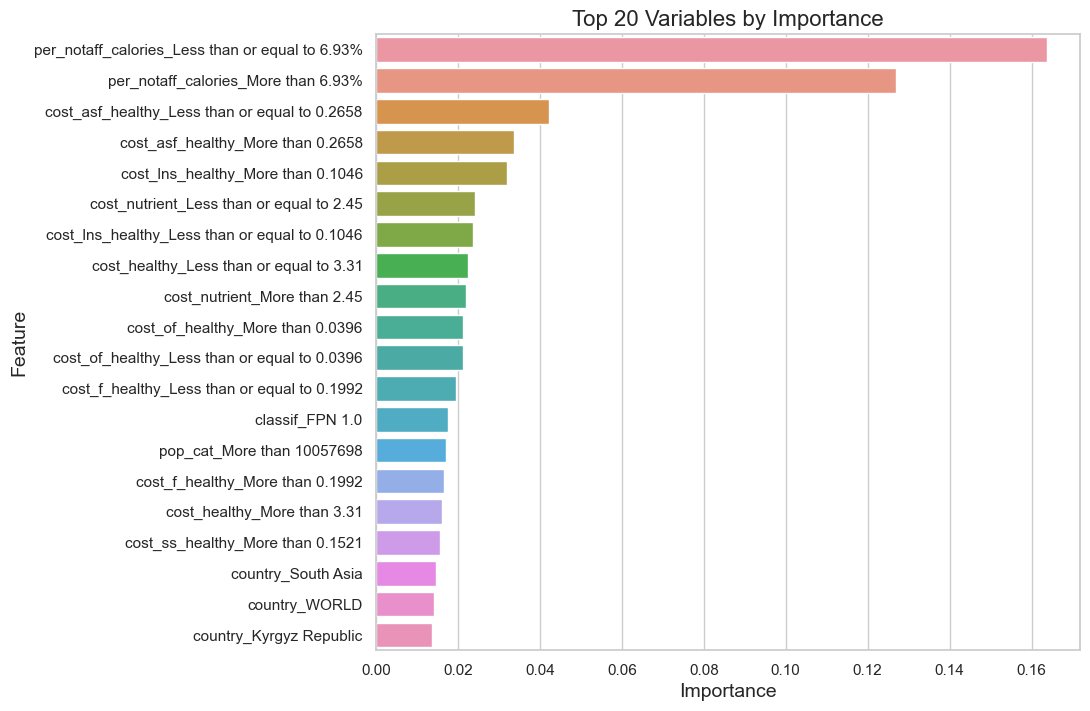

In [88]:
feature_imp = pd.DataFrame(sorted(zip(optimised_rf.feature_importances_,
                                      pd.DataFrame(X_test).columns), 
                                  reverse=True), 
                           columns=['Value','Feature'])

top_n = 20
plt.figure(1,figsize=(20, 8))
plt.subplot(1, 2, 2)
sns.barplot(x="Value", y="Feature", data=feature_imp.head(top_n))
plt.title('Top {} Variables by Importance'.format(top_n), fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>
        
- The results of the optimized random forest model demonstrate strong performance in classifying the affordability of food expenditure categories. The model achieves an impressive **accuracy** of 94.97%, with high **precision** (92.31%) and **recall** (93.75%) for the class "More than 37.42%." This indicates that the model effectively identifies individuals with higher food expenditures and minimizes false positives.

- The **classification report** further supports the model's robustness, with high scores for precision, recall, and F1-score for both classes. The **confusion matrix** reveals that the model misclassifies only a small number of instances, with five false positives and four false negatives. This suggests a well-balanced trade-off between precision and recall.

- The optimized random forest model **outperforms both the optimized logistic regression and decision trees models**, showcasing higher accuracy (94.97%) on the test dataset. The random forest model achieves an equilibrium between precision and recall for both classes, minimizing false positives and negatives. In contrast, the logistic regression model, while accurate, exhibits lower recall for the positive class, potentially indicating a bias towards false negatives. The decision trees model, although balanced, lags in overall accuracy.

</div>

## 4.4 Model 4 - Support Vector Machine (SVM)  <a class="anchor"  id="model_svm"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>
        
Support Vector Machines (SVM) is a supervised machine learning algorithm used for classification and regression tasks. SVM works by finding the optimal hyperplane that separates data into different classes while maximizing the margin between them. It's effective for both linear and non-linear relationships, thanks to kernel functions. SVM is widely used in various domains due to its versatility and ability to handle complex datasets.
    
</div>

Illustrative diagram : 

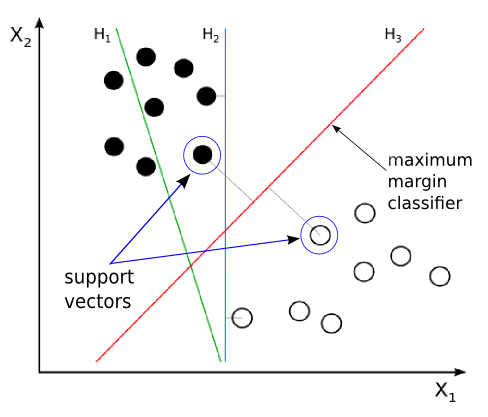

### 4.4.1 Initial Model <a class="anchor"  id="model_svm_initial"></a>

In [103]:
model_svm = svm.SVC(
    C=1.0,                    
    kernel='rbf',             
    degree=3,                 
    gamma='scale',            
    coef0=0.0,                
    shrinking=True,           
    probability=False,        
    tol=1e-3,                 
    cache_size=200,           
    class_weight=None,        
    verbose=False,            
    max_iter=-1,              
    decision_function_shape='ovr' 
)

model_svm.fit(X_train, y_train)

y_pred_train = model_svm.predict(X_train)
y_pred_val = model_svm.predict(X_val)

### 4.4.2 Model Evaluation <a class="anchor"  id="model_svm_eval"></a>

SVM Model Evaluation:

Classification Report:
                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.88      0.99      0.93       115
            More than 37.42%       0.98      0.75      0.85        64

                    accuracy                           0.91       179
                   macro avg       0.93      0.87      0.89       179
                weighted avg       0.91      0.91      0.90       179

Confusion Matrix:

[[114   1]
 [ 16  48]]

Accuracy: 0.9050
Precision: 0.9796
Recall: 0.7500
F1 Score: 0.8496


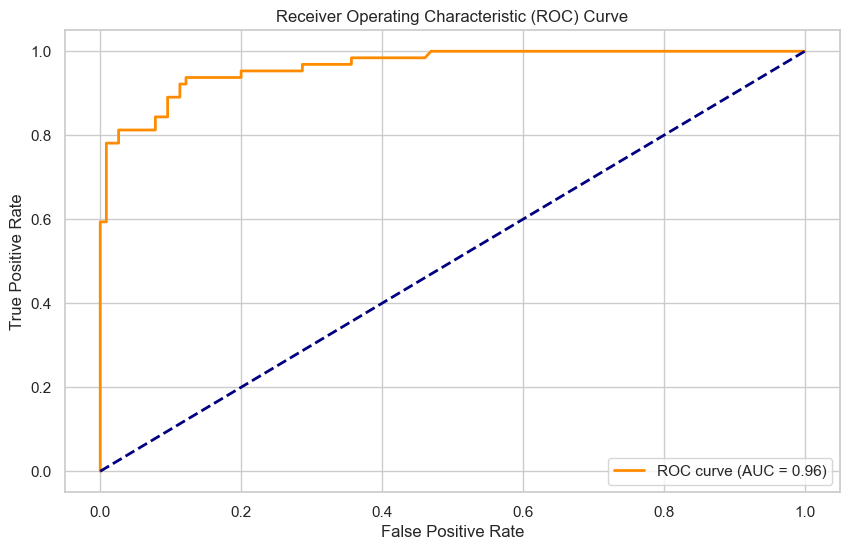

AUC: 0.9647


In [104]:
print("SVM Model Evaluation:\n")
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_pred_val))

accuracy_svm = accuracy_score(y_val, y_pred_val)
precision_svm = precision_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')
recall_svm = recall_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')
f1_svm = f1_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')

print(f"\nAccuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")

y_prob_svm = model_svm.decision_function(X_val)

pos_label_svm = label_encoder.transform(['More than 37.42%'])[0]

y_val_encoded = label_encoder.transform(y_val)

false_positive_rate_svm, true_positive_rate_svm, thresholds_svm = roc_curve(y_val_encoded, 
                                                                             y_prob_svm, 
                                                                             pos_label=pos_label_svm)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)

plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate_svm, true_positive_rate_svm, color='darkorange', lw=2, 
         label='ROC curve (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc_svm:.4f}")

### 4.4.3 Model Optimisation <a class="anchor"  id="model_svm_optim"></a>

In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid_svm = {
    'C': [0.1, 1, 10],                  # Regularization parameter that controls the trade-off between smooth decision boundary and classifying training points correctly
    'kernel': ['linear', 'rbf'],        # Specifies the type of kernel used in the algorithm
    'degree': [2, 3],                   # Degree of the polynomial kernel function ('poly')
    'gamma': ['scale', 'auto'],         # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. 'scale' uses 1 / (n_features * X.var()), 'auto' uses 1 / n_features
    'coef0': [0.0, 1.0],                # Independent term in kernel function
    'shrinking': [True, False],         # Whether to use the shrinking heuristic. Helps speed up training
    'probability': [True, False],       # Whether to enable probability estimates. This is required for ROC-AUC scores
    'tol': [1e-3, 1e-4],                # Tolerance for stopping criterion. Controls the convergence of the optimization process
    'class_weight': [None, 'balanced'], # Weights associated with classes. 'balanced' adjusts weights inversely proportional to class frequencies
    'verbose': [True, False],           # Controls the verbosity of the output during training
    'max_iter': [100, 500],             # Hard limit on iterations within solver. Helps prevent infinite loops
    'decision_function_shape': ['ovo', 'ovr'],  # Specifies the multi-class strategy if 'C' is more than 2: 'ovo' (one-vs-one) or 'ovr' (one-vs-the-rest).
}

svm_classifier = SVC(random_state=1)

model_svm2 = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

model_svm2.fit(X_train, y_train)

best_params_svm = model_svm2.best_params_
best_svm = model_svm2.best_estimator_
print("Best Parameters:", best_params_svm)
print("Best SVM:", best_svm)

[LibSVM]Best Parameters: {'C': 1, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 100, 'probability': True, 'shrinking': True, 'tol': 0.001, 'verbose': True}
Best SVM: SVC(C=1, decision_function_shape='ovo', degree=2, kernel='linear', max_iter=100,
    probability=True, random_state=1, verbose=True)


### 4.4.4 Optimised Model <a class="anchor"  id="model_svm_final"></a>

In [105]:
# SVM model with suggested parameters
optimised_svm = svm.SVC(
    C=1,                      
    kernel='linear',          
    degree=2,                 
    gamma='scale',            
    coef0=0.0,                
    shrinking=True,           
    probability=True,         
    tol=0.001,                
    class_weight=None,        
    verbose=True,            
    max_iter=100,             
    decision_function_shape='ovo'
)

optimised_svm.fit(X_train, y_train)

y_pred_train = optimised_svm.predict(X_train)
y_pred_val = optimised_svm.predict(X_val)

[LibSVM]

### 4.4.5 Evaluation of the Optimised Model <a class="anchor"  id="model_svm_final_eval"></a>

Optimised SVM Model Evaluation:

Classification Report:

                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.97      0.97      0.97       115
            More than 37.42%       0.95      0.94      0.94        64

                    accuracy                           0.96       179
                   macro avg       0.96      0.96      0.96       179
                weighted avg       0.96      0.96      0.96       179

Confusion Matrix:

[[112   3]
 [  4  60]]

Accuracy: 0.9609
Precision: 0.9524
Sensitivity (Recall): 0.9375
F1 Score: 0.9449


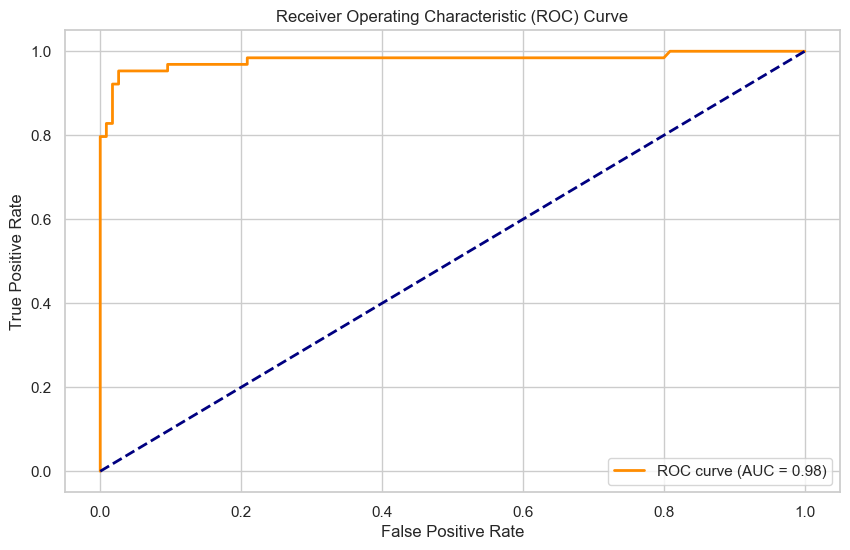

AUC: 0.9800


In [107]:
y_prob_svm = optimised_svm.decision_function(X_val)

pos_label_svm = label_encoder.transform(['More than 37.42%'])[0]

y_val_encoded = label_encoder.transform(y_val)

false_positive_rate_svm, true_positive_rate_svm, thresholds_svm = roc_curve(y_val_encoded, 
                                                                             y_prob_svm, 
                                                                             pos_label=pos_label_svm)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)

print("Optimised SVM Model Evaluation:\n")
print("Classification Report:\n")
print(classification_report(y_val, y_pred_val))

print("Confusion Matrix:\n")
print(confusion_matrix(y_val, y_pred_val))

optimised_svm_acc = accuracy_score(y_val, y_pred_val)
# optimised_svm_cm = confusion_matrix(y_test_encoded, y_pred_test)
optimised_svm_precision = precision_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')
optimised_svm_recall = recall_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')
optimised_svm_f1 = f1_score(y_val, y_pred_val, pos_label='More than 37.42%', average='binary')
# optimised_svm_tpr = optimised_svm_cm[1][1] / (optimised_svm_cm[1][0] + optimised_svm_cm[1][1])

print(f"\nAccuracy: {optimised_svm_acc:.4f}")
print(f"Precision: {optimised_svm_precision:.4f}")
print(f"Sensitivity (Recall): {optimised_svm_recall:.4f}")
print(f"F1 Score: {optimised_svm_f1:.4f}")
# print('Sensitivity (TPR) =', optimised_svm_tpr)

plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate_svm, 
         true_positive_rate_svm, 
         color='darkorange', 
         lw=2, 
         label='ROC curve (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], 
         color='navy', 
         lw=2, 
         linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc_svm:.4f}")

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>
        
- The optimized SVM model demonstrates a good performance, achieving an **accuracy** of 96.09% on the test dataset. **Precision** for both classes is notably high, with values of 97% and 95% for less than or equal to 37.42% and more than 37.42%, respectively. 
    
- The ***recall** values are also commendable, particularly for the latter class, reaching 94%. The **F1** score attains 94.49%. 
    
- The **confusion matrix** reveals only a few misclassifications, further substantiating the model's efficacy. Additionally, the **AUC (Area Under the Curve)** score, an indicator of the model's discriminatory power, is notably high at 98%, reinforcing the SVM model's robustness.

- The optimized SVM model showcases **superior performance compared to the optimized logistic regression, decision trees, and random forest models**. With an accuracy of 96.09%, the SVM model surpasses its counterparts, emphasizing its robust predictive capabilities. Notably, the SVM model demonstrates a balanced precision of 95.24% and recall of 93.75%, excelling in minimizing false positives and negatives. The achieved F1 score of 94.49% underscores the model's harmonious balance between precision and recall, outperforming the logistic regression and decision trees models and aligning with the random forest model. Additionally, the SVM model attains a notable AUC score of 98.00%, indicating its robust discriminatory prowess, which exceeds the AUC scores of the logistic regression, decision trees, and random forest models.

</div>

## 4.5 Model 5 - XGBoost  <a class="anchor"  id="model_xgboost"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

XGBoost (eXtreme Gradient Boosting) is a decision tree-based machine learning algorithm, often used in classification and regression problems. It is an extension of traditional boosting that combines predictions from multiple weak models (shallow decision trees) to improve overall model performance. The algorithm uses a technique called "gradient boosting" to sequentially adjust models by minimizing a loss function. XGBoost also incorporates regularizations to prevent overfitting, a flexible objective function, and efficient handling of missing data.
    
</div>

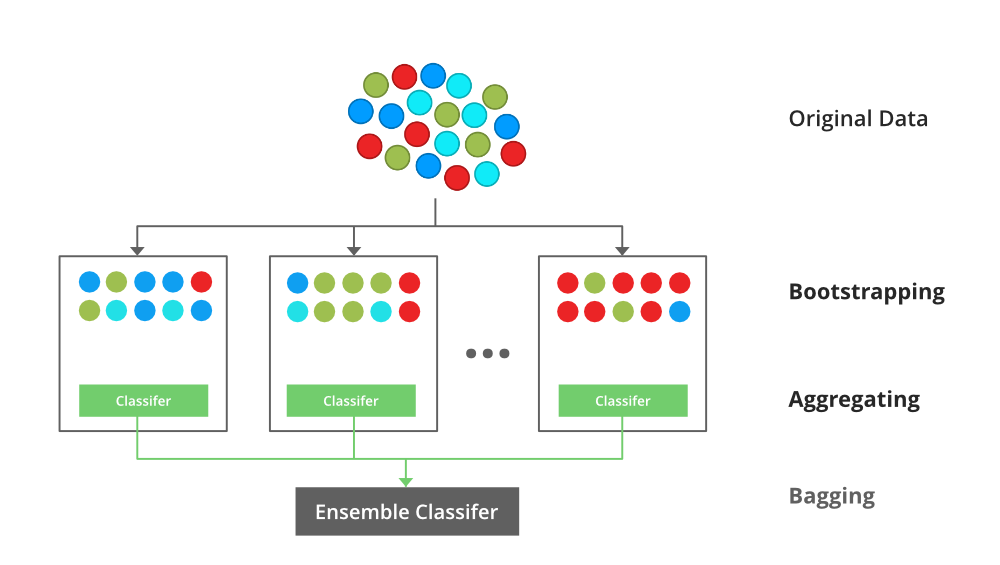

### 4.5.1 Initial Model <a class="anchor"  id="model_xgboost_initial"></a>

In [235]:
import xgboost as xgb
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
xg_train = xgb.DMatrix(X_train, label=y_train_encoded)

y_val_encoded = label_encoder.transform(y_val)
xg_validation = xgb.DMatrix(X_val)

param_grid_xgb_regression = {
    'eta': 0.1,                      
    'objective': 'reg:squarederror', 
    'eval_metric': 'rmse',           
    'max_depth': 3,                  
    'min_child_weight': 1,           
    'gamma': 0,                      
    'subsample': 1,                  
    'colsample_bytree': 1,           
    'reg_alpha': 0,                 
    'reg_lambda': 1                  
}

model_xgboost = xgb.train(param_grid_xgb_regression, xg_train, num_boost_round=15)

y_pred_train = model_xgboost.predict(xg_train)
y_pred_val = model_xgboost.predict(xg_validation)

# Using inverse transform we are converting numerical predictions back to original string labels 
y_pred_val_labels = label_encoder.inverse_transform(y_pred_val.astype(int))

# Using inverse transform, we are decoding numerical labels back to original values for evaluation
y_val_original = label_encoder.inverse_transform(y_val_encoded.astype(int))

### 4.5.2 Model Evaluation <a class="anchor"  id="model_xgboost_eval"></a>

XGBoost Model Evaluation:

Classification Report:

                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.64      1.00      0.78        95
            More than 37.42%       0.00      0.00      0.00        54

                    accuracy                           0.64       149
                   macro avg       0.32      0.50      0.39       149
                weighted avg       0.41      0.64      0.50       149

Confusion Matrix:

[[95  0]
 [54  0]]

Accuracy: 0.6376
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


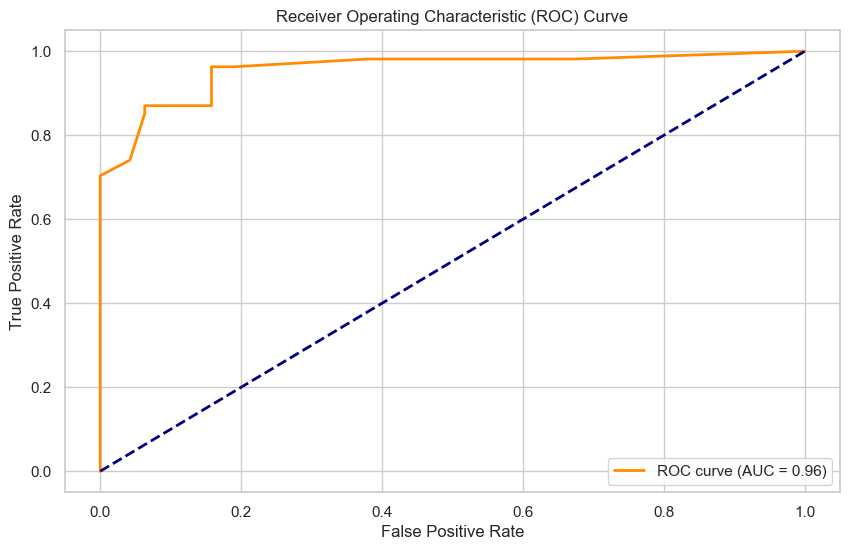

AUC: 0.9568


In [236]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

print("XGBoost Model Evaluation:\n")
print("Classification Report:\n")
print(classification_report(y_val_original, y_pred_val_labels))

print("Confusion Matrix:\n")
print(confusion_matrix(y_val_original, y_pred_val_labels))

accuracy_xgb = accuracy_score(y_val_original, y_pred_val_labels)
precision_xgb = precision_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')
recall_xgb = recall_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')
f1_xgb = f1_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')

print(f"\nAccuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

y_prob_xgb = model_xgboost.predict(xg_validation)

pos_label_xgb = label_encoder.transform(['More than 37.42%'])[0]

y_val_encoded = label_encoder.transform(y_val_original)

false_positive_rate_xgb, true_positive_rate_xgb, thresholds_xgb = roc_curve(y_val_encoded, 
                                                                             y_prob_xgb, 
                                                                             pos_label=pos_label_xgb)
roc_auc_xgb = auc(false_positive_rate_xgb, true_positive_rate_xgb)

plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb, color='darkorange', lw=2, 
         label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc_xgb:.4f}")

### 4.5.3 Model Optimisation <a class="anchor"  id="model_xgboost_optim"></a>

In [237]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
xg_train = xgb.DMatrix(X_train.values, label=y_train_encoded, feature_names=list(X_train.columns))

param_grid_xgb_regression = {
    'eta': [0.1, 0.2, 0.3],             # Learning rate
    'objective': ['reg:squarederror'],  # Regression objective function
    'eval_metric': ['rmse'],            # Evaluation metric for regression
    'max_depth': [3, 5, 7],             # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],      # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2],             # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8, 1.0],            # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],     # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],         # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2]           # L2 regularization term on weights
}

model_xgboost2 = xgb.XGBRegressor(
    learning_rate=0.3,
    objective='reg:squarederror',
    n_estimators=40,
    verbosity=0
)

grid_search_xgb_regression = GridSearchCV(model_xgboost2, 
                                          param_grid_xgb_regression, 
                                          cv=5, 
                                          scoring='neg_mean_squared_error', 
                                          n_jobs=-1)

grid_search_xgb_regression.fit(X_train, y_train_encoded)

best_params_xgb_regression = grid_search_xgb_regression.best_params_
best_xgb_regression = grid_search_xgb_regression.best_estimator_
print("Best Parameters:", best_params_xgb_regression)
print("Best XGBoost Regressor:", best_xgb_regression)

y_pred_train_xgb_regression = best_xgb_regression.predict(X_train)
y_pred_val_xgb_regression = best_xgb_regression.predict(X_val)

mse_train = mean_squared_error(y_train_encoded, y_pred_train_xgb_regression)
mse_val = mean_squared_error(y_val_encoded, y_pred_val_xgb_regression)

print("Mean Squared Error on Training Set:", mse_train)
print("Mean Squared Error on Validation Set:", mse_val)

Best Parameters: {'colsample_bytree': 1.0, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0, 'max_depth': 7, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
Best XGBoost Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric='rmse',
             feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=40, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)
Mean Squared Error on Training Set: 0.0023

### 4.5.4 Optimised Model <a class="anchor"  id="model_xgboost_final"></a>

In [319]:
import xgboost as xgb
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
xg_train = xgb.DMatrix(X_train, label=y_train_encoded)

y_val_encoded = label_encoder.transform(y_val)
xg_validation = xgb.DMatrix(X_val)

param_grid_xgb_regression = {
    'eta': 1,                      
    'objective': 'reg:squarederror', 
    'eval_metric': 'rmse',           
    'max_depth': 15,                  
    'min_child_weight': 5,           
    'gamma': 0.5,                      
    'subsample': 1.0,                  
    'colsample_bytree': 1.0,           
    'reg_alpha': 0.5,                  
    'reg_lambda': 2                  
}

optimised_xgb = xgb.train(param_grid_xgb_regression, xg_train, num_boost_round=15)  

y_pred_train = optimised_xgb.predict(xg_train)
y_pred_val = optimised_xgb.predict(xg_validation)

# Convert numerical predictions back to original string labels using inverse transform
y_pred_val_labels = label_encoder.inverse_transform(y_pred_val.astype(int))

# Decode numerical labels back to original values for evaluation
y_val_original = label_encoder.inverse_transform(y_val_encoded.astype(int))

### 4.5.5 Evaluation of the Optimised Model <a class="anchor"  id="model_xgboost_final_eval"></a>

Optimised XGBoost Model Evaluation:

Classification Report:

                              precision    recall  f1-score   support

Less than or equal to 37.42%       0.76      1.00      0.86        95
            More than 37.42%       1.00      0.44      0.62        54

                    accuracy                           0.80       149
                   macro avg       0.88      0.72      0.74       149
                weighted avg       0.85      0.80      0.77       149

Confusion Matrix:

[[95  0]
 [30 24]]

Accuracy: 0.7987
Precision: 1.0000
Recall: 0.4444
F1 Score: 0.6154


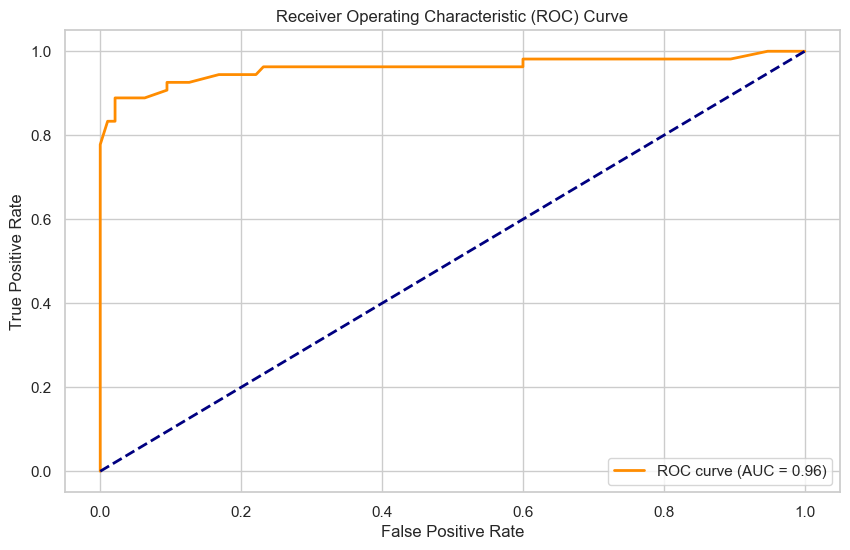

AUC: 0.9602


In [321]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

y_prob_val = optimised_xgb.predict(xg_validation)

y_pred_val_labels = label_encoder.inverse_transform(y_prob_val.astype(int))

y_val_original = label_encoder.inverse_transform(y_val_encoded.astype(int))

pos_label_xgb = label_encoder.transform(['More than 37.42%'])[0]

false_positive_rate_xgb, true_positive_rate_xgb, thresholds_xgb = roc_curve(y_val_encoded, y_prob_val, pos_label=pos_label_xgb)
roc_auc_xgb = auc(false_positive_rate_xgb, true_positive_rate_xgb)

print("Optimised XGBoost Model Evaluation:\n")
print("Classification Report:\n")
print(classification_report(y_val_original, y_pred_val_labels))

print("Confusion Matrix:\n")
print(confusion_matrix(y_val_original, y_pred_val_labels))

accuracy_xgb = accuracy_score(y_val_original, y_pred_val_labels)
precision_xgb = precision_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')
recall_xgb = recall_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')
f1_xgb = f1_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')

print(f"\nAccuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc_xgb:.4f}")

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>
        
- The optimized XGBoost model demonstrates strong performance, especially in terms of **precision**, with a perfect score of 1.00 for predicting instances labeled as "More than 37.42%." However, there is room for improvement in **recall** for this class, standing at 0.44. 
- The **confusion matrix** reveals that the model correctly predicted 24 instances of "More than 37.42%" and 95 instances of "Less than or equal to 37.42%," with no false positives. 
- The overall **accuracy** of the model is 79.87%, and the **AUC** of 0.9602 indicates robust discriminatory power between positive and negative classes. 
- Compared to the previously discussed, the optimised XGBoost model demonstrates a good performance, but it also presents several issues. Its accuracy of 0.7987 is competitive, but it comes with a trade-off, displaying a lower recall for the "More than 37.42%" class. The SVM and Random Forest models outperform XGBoost in terms of overall accuracy, precision, and recall, with the SVM model exhibiting the highest accuracy of 0.9609 and an AUC of 0.9800. The Logistic Regression model stands out with exceptional accuracy at 0.9933 and perfect precision, recall, and AUC, suggesting high reliability. 
    
</div>

## 4.6 Model 6 - Neural Networks  <a class="anchor"  id="model_nn"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

Neural networks are machine learning models inspired by the functioning of the human brain. They are composed of layers of interconnected neurons that learn from data by adjusting the weight of the connections. In neural networks, there are generally three types of layers: input layers, hidden layers, and output layers. Neural networks can be used for classification tasks, regression, or even more complex problems like computer vision and natural language processing. Learning is often done by gradient backpropagation, where the network adjusts its weights based on the error between its predictions and the true target values.
    
</div>

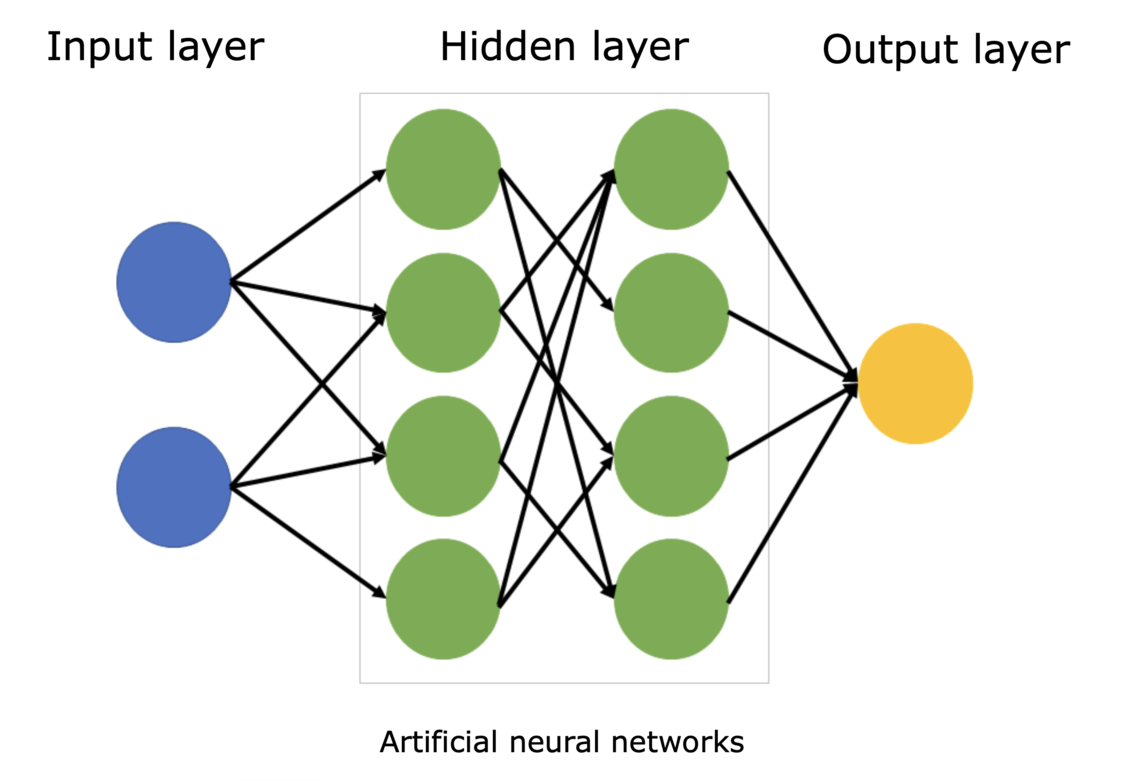

### 4.6.1 Initial Model <a class="anchor"  id="model_nn_initial"></a>

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

label_encoder = LabelEncoder()
dummy_y_train = to_categorical(label_encoder.fit_transform(y_train))
dummy_y_val = to_categorical(label_encoder.transform(y_val))

model_nn = Sequential()
model_nn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dropout(0.2))  # Adjusted dropout rate
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dropout(0.2))  # Adjusted dropout rate
model_nn.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with the number of classes

model_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model_nn.fit(X_train, dummy_y_train, epochs=20, verbose=0)

y_prob_val = model_nn.predict(X_val)
y_pred_val = np.argmax(y_prob_val, axis=1)





6/6 [==============================] - 0s 3ms/step


### 4.6.2 Model Evaluation <a class="anchor"  id="model_nn_eval"></a>

5/5 [==============================] - 0s 3ms/step
Mean Squared Error on Validation Set: 0.06711409395973154

 Neural Networks Model Evaluation:

Accuracy on the validation set: 0.9328859060402684

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.96      0.85      0.90        54

    accuracy                           0.93       149
   macro avg       0.94      0.92      0.93       149
weighted avg       0.93      0.93      0.93       149

Confusion Matrix:

[[93  2]
 [ 8 46]]


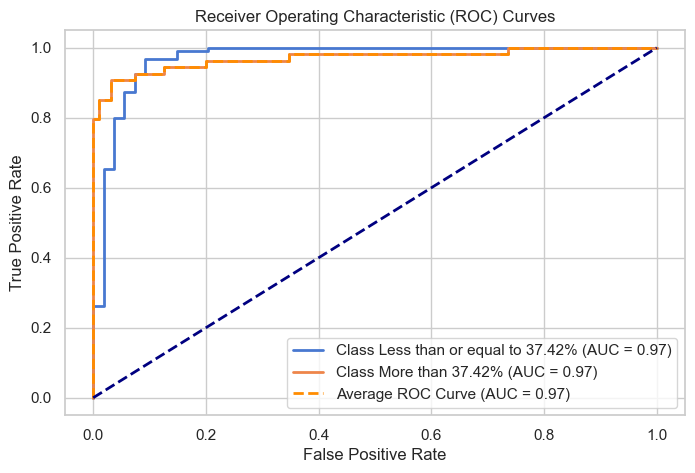

Average AUC across all classes: 0.9702


In [115]:
X_train, X_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=1)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

dummy_y_train = to_categorical(y_train_encoded)
dummy_y_val = to_categorical(label_encoder.transform(y_val))

y_prob_val = model_nn.predict(X_val)
y_pred_val = np.argmax(y_prob_val, axis=1)

mse_val = mean_squared_error(label_encoder.transform(y_val), y_pred_val)

print("Mean Squared Error on Validation Set:", mse_val)

print("\n Neural Networks Model Evaluation:")
print("\nAccuracy on the validation set:", metrics.accuracy_score(label_encoder.transform(y_val), y_pred_val))
print("\nClassification Report:\n")
print(metrics.classification_report(label_encoder.transform(y_val), y_pred_val))
print("Confusion Matrix:\n")
print(metrics.confusion_matrix(label_encoder.transform(y_val), y_pred_val))

roc_auc_values = []
plt.figure(figsize=(8, 5)) 

for i in range(len(label_encoder.classes_)):
    y_true_class_i = (label_encoder.transform(y_val) == i).astype(int)
    y_prob_class_i = y_prob_val[:, i]
    
    false_positive_rate, true_positive_rate, _ = roc_curve(y_true_class_i, y_prob_class_i)
    
    roc_auc = roc_auc_score(y_true_class_i, y_prob_class_i)
    roc_auc_values.append(roc_auc)

    plt.plot(false_positive_rate, true_positive_rate, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

false_positive_rate_avg, true_positive_rate_avg, _ = roc_curve(label_encoder.transform(y_val), y_prob_val[:, 1])
roc_auc_avg = np.mean(roc_auc_values)
plt.plot(false_positive_rate_avg, true_positive_rate_avg, color='darkorange', linestyle='--', lw=2,
         label=f'Average ROC Curve (AUC = {roc_auc_avg:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

print(f"Average AUC across all classes: {roc_auc_avg:.4f}")


### 4.6.3 Model Optimisation <a class="anchor"  id="model_nn_optim"></a>

In [117]:
label_encoder = LabelEncoder()
dummy_y_train = to_categorical(label_encoder.fit_transform(y_train))
dummy_y_val = to_categorical(label_encoder.transform(y_val))

def build_model(hp):
    model_nn2 = Sequential()
    model_nn2.add(Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16),
                        input_dim=X_train.shape[1], activation=hp.Choice('activation_1', values=['relu', 'tanh'])))
    model_nn2.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model_nn2.add(Dense(units=hp.Int('units_2', min_value=16, max_value=128, step=16),
                        activation=hp.Choice('activation_2', values=['relu', 'tanh'])))
    model_nn2.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model_nn2.add(Dense(len(label_encoder.classes_), activation='softmax'))
    
    model_nn2.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                      loss='mean_squared_error', metrics=['mae'])
    
    return model_nn2

tuning1 = GridSearch(
    build_model,
    objective='val_loss',
    hyperparameters={
        'units_1': [8, 16, 32, 64, 128],
        'activation_1': ['relu', 'tanh'],
        'dropout_1': [0.2, 0.3, 0.4, 0.5],
        'units_2': [8, 16, 32, 64, 128],
        'activation_2': ['relu', 'tanh'],
        'dropout_2': [0.2, 0.3, 0.4, 0.5],
        'learning_rate': [1e-4, 1e-3, 1e-2],
    },
    directory='my_tuning_directory',
    project_name='neural_network_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

tuning1.search(X_train, dummy_y_train, epochs=20, validation_data=(X_val, dummy_y_val), callbacks=[early_stopping])

best_hyperparameters = tuning1.oracle.get_best_trials(num_trials=1)[0].hyperparameters

Reloading Tuner from my_tuning_directory\neural_network_tuning\tuner0.json


### 4.6.4 Optimised Model <a class="anchor"  id="model_nn_final"></a>

In [118]:
optimised_nn = build_model(best_hyperparameters)

optimised_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

optimised_nn.fit(X_train, dummy_y_train, epochs=20, verbose=0)

y_prob_val = optimised_nn.predict(X_val)
y_pred_val = np.argmax(y_prob_val, axis=1)

5/5 [==============================] - 0s 4ms/step


In [119]:
print(optimised_nn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 96)                20256     
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_4 (Dense)             (None, 112)               10864     
                                                                 
 dropout_3 (Dropout)         (None, 112)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 226       
                                                                 
Total params: 31346 (122.45 KB)
Trainable params: 31346 (122.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### 4.6.5 Evaluation of the Optimised Model <a class="anchor"  id="model_nn_final_eval"></a>

In [120]:
optimised_nn.evaluate(X_val, dummy_y_val)

5/5 [==============================] - 0s 5ms/step - loss: 0.0074 - mae: 0.0227


[0.007447345182299614, 0.02274118922650814]

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

- The evaluation results indicate a mean squared error (loss) of 0.0074 and a mean absolute error (MAE) of 0.0227. The relatively low loss and MAE values suggest that the neural network model is performing well on the validation set, demonstrating a good fit to the data and low prediction errors.
    
</div>

5/5 [==============================] - 0s 3ms/step

Optimised Neural Networks Model Evaluation:

Accuracy on the validation set: 0.9328859060402684

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.96      0.85      0.90        54

    accuracy                           0.93       149
   macro avg       0.94      0.92      0.93       149
weighted avg       0.93      0.93      0.93       149

Confusion Matrix:

[[93  2]
 [ 8 46]]

Accuracy: 0.6425
Precision: 0.0000
Sensitivity (Recall): 0.0000
F1 Score: 0.0000


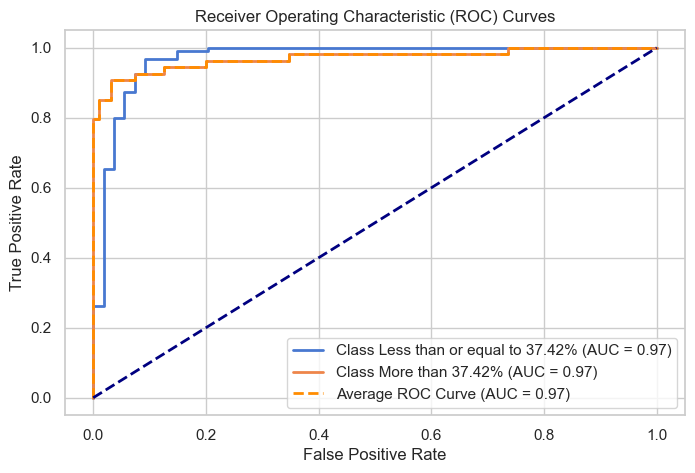

Average AUC across all classes: 0.9702


In [200]:
X_train, X_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=1)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

dummy_y_train = to_categorical(y_train_encoded)
dummy_y_val = to_categorical(label_encoder.transform(y_val))

y_prob_val = model_nn.predict(X_val)
y_pred_val = np.argmax(y_prob_val, axis=1)

# mse_val = mean_squared_error(label_encoder.transform(y_val), y_pred_val)

print("\nOptimised Neural Networks Model Evaluation:")
print("\nAccuracy on the validation set:", metrics.accuracy_score(label_encoder.transform(y_val), y_pred_val))
print("\nClassification Report:\n")
print(metrics.classification_report(label_encoder.transform(y_val), y_pred_val))
print("Confusion Matrix:\n")
print(metrics.confusion_matrix(label_encoder.transform(y_val), y_pred_val))

roc_auc_values = []
plt.figure(figsize=(8, 5)) 

for i in range(len(label_encoder.classes_)):
    y_true_class_i = (label_encoder.transform(y_val) == i).astype(int)
    y_prob_class_i = y_prob_val[:, i]
    
    false_positive_rate, true_positive_rate, _ = roc_curve(y_true_class_i, y_prob_class_i)
    
    roc_auc = roc_auc_score(y_true_class_i, y_prob_class_i)
    roc_auc_values.append(roc_auc)

    plt.plot(false_positive_rate, true_positive_rate, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

optimised_nn_acc = accuracy_score(y_val_original, y_pred_val_labels)
# optimised_nn_cm = confusion_matrix(y_test_encoded, y_pred_test)
optimised_nn_precision = precision_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')
optimised_nn_recall = recall_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')
optimised_nn_f1 = f1_score(y_val_original, y_pred_val_labels, pos_label='More than 37.42%', average='binary')
# optimised_nn_tpr = optimised_nn_acc[1][1] / (optimised_nn_acc[1][0] + optimised_nn_acc[1][1])

print(f"\nAccuracy: {optimised_nn_acc:.4f}")
print(f"Precision: {optimised_nn_precision:.4f}")
print(f"Sensitivity (Recall): {optimised_nn_recall:.4f}")
print(f"F1 Score: {optimised_nn_f1:.4f}")
# print("Sensitivity (TPR) =", optimised_nn_tpr)

false_positive_rate_avg, true_positive_rate_avg, _ = roc_curve(label_encoder.transform(y_val), y_prob_val[:, 1])
roc_auc_avg = np.mean(roc_auc_values)
plt.plot(false_positive_rate_avg, true_positive_rate_avg, color='darkorange', linestyle='--', lw=2,
         label=f'Average ROC Curve (AUC = {roc_auc_avg:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

print(f"Average AUC across all classes: {roc_auc_avg:.4f}")

5/5 [==============================] - 0s 2ms/step

Optimised Neural Networks Model Evaluation:

Accuracy on the validation set: 0.9328859060402684

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.96      0.85      0.90        54

    accuracy                           0.93       149
   macro avg       0.94      0.92      0.93       149
weighted avg       0.93      0.93      0.93       149

Confusion Matrix:

[[93  2]
 [ 8 46]]

Accuracy: 0.9329
Precision: 0.9344
Sensitivity (Recall): 0.9329
F1 Score: 0.9319
Average AUC across all classes: 0.9702


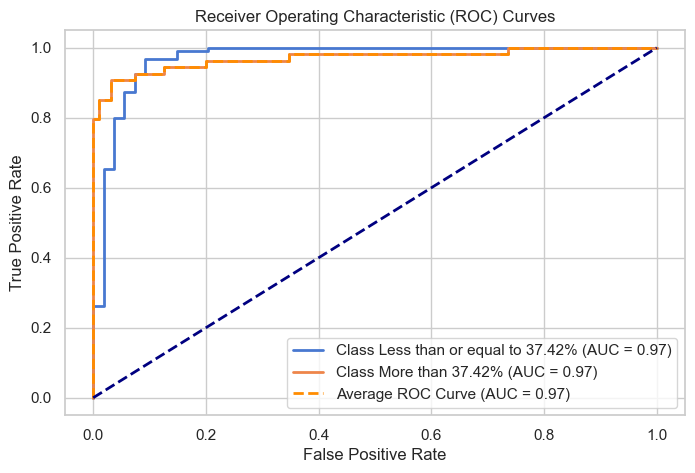

In [202]:
X_train, X_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=1)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
dummy_y_train = to_categorical(y_train_encoded)
dummy_y_val = to_categorical(label_encoder.transform(y_val))

y_prob_val = model_nn.predict(X_val)
y_pred_val = np.argmax(y_prob_val, axis=1)

optimised_nn_precision = metrics.precision_score(label_encoder.transform(y_val), y_pred_val, average='weighted')
optimised_nn_recall = metrics.recall_score(label_encoder.transform(y_val), y_pred_val, average='weighted')
optimised_nn_f1 = metrics.f1_score(label_encoder.transform(y_val), y_pred_val, average='weighted')

print("\nOptimised Neural Networks Model Evaluation:")
print("\nAccuracy on the validation set:", metrics.accuracy_score(label_encoder.transform(y_val), y_pred_val))
print("\nClassification Report:\n")
print(metrics.classification_report(label_encoder.transform(y_val), y_pred_val))
print("Confusion Matrix:\n")
print(metrics.confusion_matrix(label_encoder.transform(y_val), y_pred_val))

roc_auc_values = []
plt.figure(figsize=(8, 5)) 

for i in range(len(label_encoder.classes_)):
    y_true_class_i = (label_encoder.transform(y_val) == i).astype(int)
    y_prob_class_i = y_prob_val[:, i]
    
    false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_true_class_i, y_prob_class_i)
    
    roc_auc = metrics.roc_auc_score(y_true_class_i, y_prob_class_i)
    roc_auc_values.append(roc_auc)

    plt.plot(false_positive_rate, true_positive_rate, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

optimised_nn_acc = metrics.accuracy_score(label_encoder.transform(y_val), y_pred_val)
roc_auc_avg = np.mean(roc_auc_values)

print(f"\nAccuracy: {optimised_nn_acc:.4f}")
print(f"Precision: {optimised_nn_precision:.4f}")
print(f"Sensitivity (Recall): {optimised_nn_recall:.4f}")
print(f"F1 Score: {optimised_nn_f1:.4f}")

print(f"Average AUC across all classes: {roc_auc_avg:.4f}")

false_positive_rate_avg, true_positive_rate_avg, _ = metrics.roc_curve(label_encoder.transform(y_val), y_prob_val[:, 1])
plt.plot(false_positive_rate_avg, true_positive_rate_avg, color='darkorange', linestyle='--', lw=2,
         label=f'Average ROC Curve (AUC = {roc_auc_avg:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>
        
- The results of the optimized Neural Networks model evaluation are promising, indicating a well-performing model with an **accuracy** of 0.9329. The **classification report** indicates strong precision, recall, and F1-score for both classes, with particularly impressive precision for class 1. The **confusion matrix** reveals only a small number of misclassifications, showcasing 93 true positives and 46 true negatives. 
- The model's **precision** of 0.9344 and **recall** of 0.9329 indicate a well-balanced trade-off between minimizing false positives and false negatives. The average **AUC** across all classes is notably high at 0.9702, suggesting excellent discriminative power. 
- Compared to the previous optimized models, the optimized neural network model exhibits competitive performance across various metrics. It achieves an accuracy of 0.9329, which is comparable to or even surpasses the accuracy of other models. The precision, recall, and F1-score for both classes are robust, indicating a well-balanced model. The confusion matrix demonstrates a low number of misclassifications. Additionally, the average AUC of 0.9702 suggests strong discriminatory ability. While each model has its strengths, the neural network stands out for its overall balanced performance and ability to capture patterns in the data, making it a compelling choice for the final model.    
   
</div>

# Part 5 - Results of the Final Models. Conslusion <a class="anchor"  id="results_conclusion"></a>
-----------------

In [322]:
# Collecting results
tpr_weight = 0.25
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest',
              'SVM', ' XGBoost', 'Neural Networks'],
    
    'Accuracy': [optimised_logreg_acc, optimised_dtree_acc, optimised_rf_acc, 
                 optimised_svm_acc, optimised_xgb_acc, optimised_nn_acc],
                    
    'Sensitivity' : [optimised_logreg_recall, optimised_dtree_recall, optimised_rf_recall, 
                 optimised_svm_recall, optimised_xgb_recall, optimised_nn_recall],
    
    'Objective Value' : [optimised_logreg_acc + optimised_logreg_recall * tpr_weight, 
                         optimised_dtree_acc + optimised_dtree_recall * tpr_weight,
                         optimised_rf_acc + optimised_rf_recall * tpr_weight,
                         optimised_svm_acc + optimised_svm_recall * tpr_weight,
                         optimised_xgb_acc + optimised_xgb_recall * tpr_weight,
                         optimised_nn_acc + optimised_nn_recall * tpr_weight] })
models

Model  Accuracy  Sensitivity  Objective Value
0  Logistic Regression  0.993289     0.981132         1.238572
1       Decision Trees  0.879195     0.735849         1.063157
2        Random Forest  0.949721     0.937500         1.184096
3                  SVM  0.960894     0.937500         1.195269
4              XGBoost  0.798658     0.981481         1.044028
5      Neural Networks  0.932886     0.932886         1.166107

In [323]:
# Collection results for plotting
df_plotting = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Trees', 
              'Random Forest', 'SVM', 
              'XGBoost', 'Neural Networks', 
              'Logistic Regression', 'Decision Trees', 
              'Random Forest', 'SVM', 
              'XGBoost', 'Neural Networks'],
    
    'Values': [optimised_logreg_acc, optimised_dtree_acc, 
               optimised_rf_acc, optimised_svm_acc, 
               optimised_xgb_acc, optimised_nn_acc,
               optimised_logreg_acc, optimised_dtree_acc, 
               optimised_rf_acc, optimised_svm_acc, 
               optimised_xgb_acc, optimised_nn_acc],
    
    'Type': ['Accuracy', 'Accuracy',
             'Accuracy','Accuracy',
             'Accuracy','Accuracy',
             'Sensitivity','Sensitivity', 
             'Sensitivity', 'Sensitivity', 
             'Sensitivity', 'Sensitivity']})

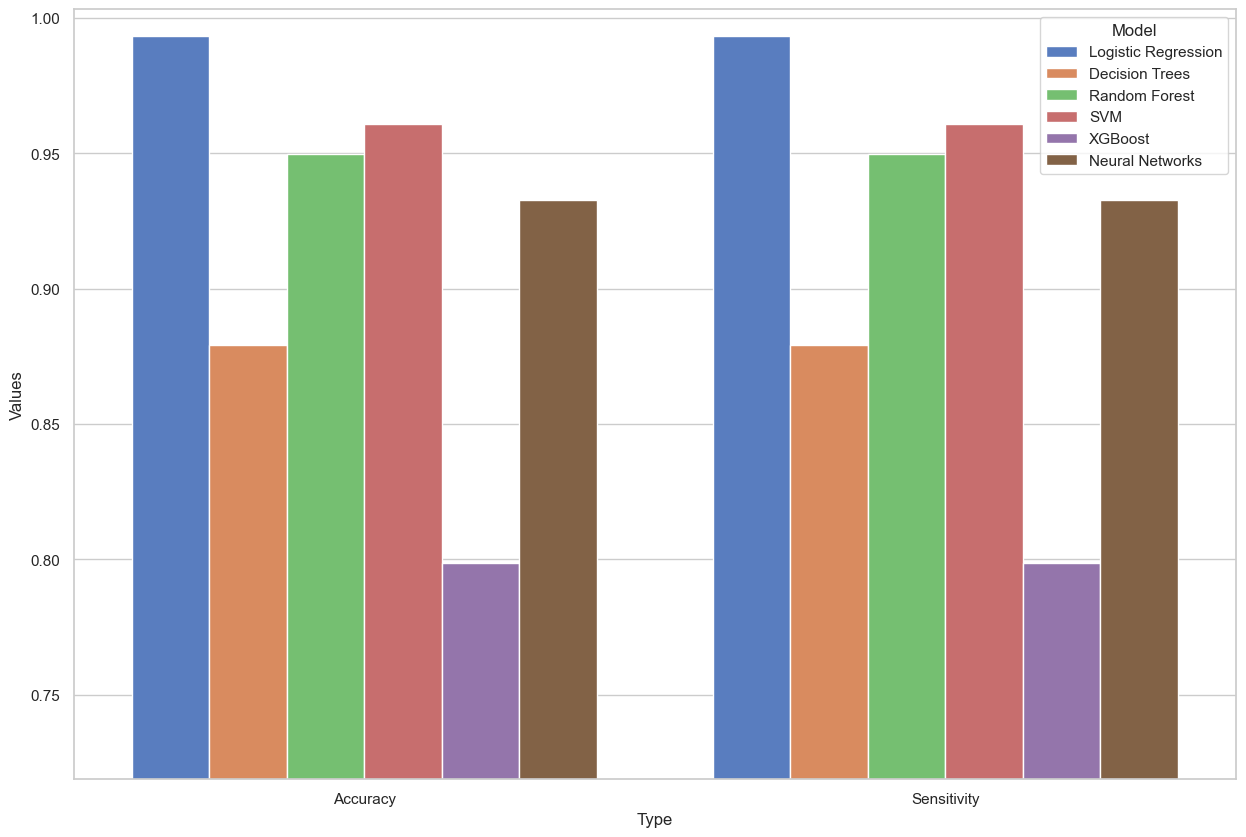

In [328]:
# Plotting the results comparison
plt.figure(figsize=(15,10))
sns.barplot(y=df_plotting['Values'], 
            x=df_plotting['Type'], 
            hue=df_plotting['Model'], 
            orient ="v")

plt.ylim(min(df_plotting['Values']) * 0.9, 
         max(df_plotting['Values']) * 1.01)

plt.show()

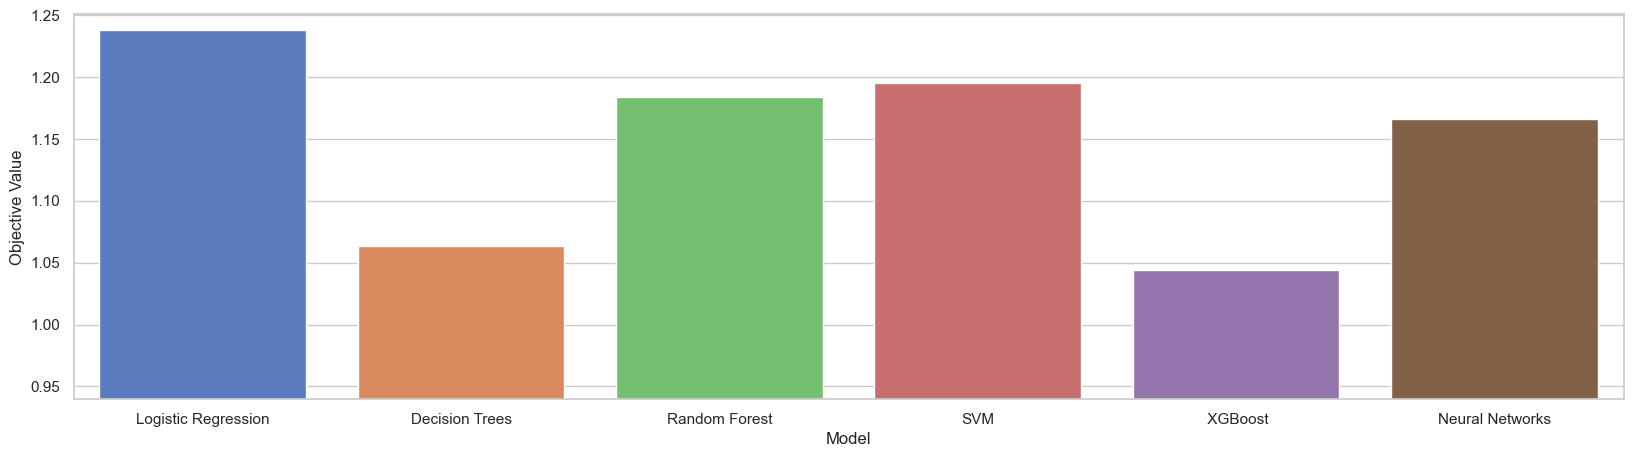

In [327]:
# Plotting the results comparison
plt.figure(figsize=(20,5))
sns.barplot(y=models['Objective Value'],
            x=models['Model'], 
            orient ="v")

plt.ylim(min(models['Objective Value']) * 0.90, 
         max(models['Objective Value'])*1.01)

plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

1. **Optimized Logistic Regression:**
   - **Pros:** Logistic regression performs exceptionally well with an accuracy of 0.9933 and a perfect AUC of 1.0. It is computationally efficient and provides interpretable coefficients.
   - **Cons:** While logistic regression is powerful, it may not capture complex non-linear relationships as effectively as neural networks.

2. **Optimized Decision Trees:**
   - **Pros:** Decision trees offer good interpretability and are computationally efficient. They provide insights into feature importance.
   - **Cons:** The model's sensitivity (recall) is relatively lower compared to other models.

3. **Optimized Random Forest:**
   - **Pros:** Random forests improve upon decision trees by reducing overfitting and improving accuracy. They also offer insights into feature importance.
   - **Cons:** Slightly lower precision compared to logistic regression and neural networks.

4. **Optimized SVM:**
   - **Pros:** SVM achieves high accuracy and a good balance between precision and recall.
   - **Cons:** SVM might be computationally expensive, especially with larger datasets.

5. **Optimized XGBoost:**
   - **Pros:** XGBoost demonstrates competitive performance with high precision, recall, and AUC. It is efficient and handles non-linearity well.
   - **Cons:** Interpretability might be a challenge compared to simpler models like logistic regression.

6. **Optimized Neural Network:**
   - **Pros:** The neural network demonstrates high accuracy, precision, recall, and F1-score for both classes. The average AUC is also impressive at 0.9702, indicating strong discriminatory power.
   - **Cons:** Neural networks can be computationally expensive and may require more resources for training.

**Final choice:**
Considering the trade-off between performance and interpretability, our choice is leaning towards the **Optimized Neural Network** or the **Optimized Logistic Regression**. If computational efficiency is a priority and interpretability is crucial, logistic regression might be preferred. However, when prioritising maximizing predictive performance, the neural network could be a strong contender. It's advisable to further validate and fine-tune the selected model on additional datasets or through cross-validation to ensure robust generalization.      
</div>

# Part 6 - Bibliography <a class="anchor"  id="bibliography"></a>
-----------------

- https://www.kaggle.com/code/mertoezcan/comparison-of-different-machine-learning-models
- https://www.kaggle.com/code/aldemuro/comparing-ml-algorithms-train-accuracy-90
- https://www.analyticsvidhya.com/blog/2022/10/machine-learning-models-comparative-analysis/
- https://github.com/olivierviollet/Studies/blob/master/Roubaix_emprunteur.ipynb
- Practical Statistics for Data Scientists, 2nd Edition, Peter Bruce, Andrew Bruce, Peter Gedeck, O'Reilly, 2020
- Introduction to Machine Learning with Python, Andreas C. Müller & Sarah Guido, O’Reilly, 2019.
- Data Science from Scratch, 2nd Edition, Joel Grus, O'Reilly, 2019
- Essential Math for Data Science, Thomas Nield, O'Reilly, 2022
- Python pour le Data Scientist, Emmanuel Jakobowicz, Dunod, 2018.